**The goal** of this notebook is to explore the relationship between a company's headcount changes on LinkedIn with their stock price _[for publicly traded names]_. I plan on using this research for my next article.

In [1]:
#So you don't need to run the FMP api call below below the import library cell
load_10_20_20_csv = True

In [2]:
#Import libs
import numpy as np
import pandas as pd
from IPython.display import display, IFrame, Image
import requests
import re
import time 
import lxml.html as lh
from datetime import date, datetime
import datetime as dt
import json
import pandas_datareader as pdr
from pandas.io.json import json_normalize
import urllib.request
from urllib.request import urlopen
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import joypy
from matplotlib import cm
import matplotlib 
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator

In [3]:
#Upload the data
if load_10_20_20_csv:

    #load upwork data entry of headcount growth
    file_path =\
    '/Users/adrianlechter/Lechter Ventures/Supplementary Files/Stock Tickers and Company Names.csv'
    df_upwork = pd.read_csv(file_path)
    df_upwork.drop(columns=['Company Name'], inplace=True)
    df_upwork.rename(columns={'USA-Based Stock Ticker':'symbol'}, inplace=True)
    
    #load original data scrape
    file_path =\
    '/Users/adrianlechter/Lechter Ventures/Supplementary Files/LinkedIn Data Scrape (2020-10-20).csv'
    df_lnkd_scrape = pd.read_csv(file_path)
    df_lnkd_scrape.drop(columns=['Unnamed: 0'], inplace=True)
    
    #merge dataframes and preview
    df_main = pd.merge(df_upwork,df_lnkd_scrape,on='symbol')
    display(df_main.head())
    display(df_main.info())
    


else:
    #global variables
    api_key = '' #you will need an API key to run this scrape job with financialmodelingprep.com
    sector_list = ['Consumer_Cyclical','Energy','Technology','Industrials','Financial_Services',
                   'Basic_Materials','Communication_Services','Consumer_Defensive','Healthcare',
                   'Real_Estate','Utilities','Industrial_Goods','Financial_Services','Conglomerates']
    df_main = pd.DataFrame()

    for sector in sector_list:
        url_address =\
        'https://financialmodelingprep.com/api/v3/stock-screener?marketCapMoreThan=500000000&volumeMoreThan=10000&sector={}&apikey={}'.\
            format(sector,api_key)

        #Get tech companies from FMP API
        try:
            url = urllib.request.urlopen(url_address)
            data = json.loads(url.read().decode())


        except:
            if not url:
                try:
                    time.sleep(2) #wait for another try
                    url = urllib.request.urlopen(url_address)
                    data = json.loads(url.read().decode())
                except:
                    display('Second attempt didnt work')
                    raise SystemExit() #you probably should get some type of error to be raised here
            else:
                display('Youre not catching this type of error')
                raise SystemExit() #you probably should get some type of error to be raised here

        if df_main.empty:
            df_main = pd.DataFrame(data) #Summary Stats for Stonks

        else:
            df = pd.DataFrame(data)
            df_main = pd.concat([df_main,df])

    display(df_main.head())
    display(df_main.info())


,symbol,6m Growth,1y Growth,companyName,marketCap,sector,industry,beta,price,lastAnnualDividend,volume,exchange,exchangeShortName
0,AMZN,24%,42%,Amazon.com Inc,1.627176e+12,Consumer Cyclical,Internet Retail,1.29194,3248.570,0.00,4950092,Nasdaq Global Select,NASDAQ
1,BABA,7%,15%,Alibaba Group Holding Ltd,8.450908e+11,Consumer Cyclical,Internet Retail,1.29093,310.830,0.00,13617560,New York Stock Exchange,NYSE
2,TSLA,10%,23%,Tesla Inc,3.963589e+11,Consumer Cyclical,Auto Manufacturers,1.90564,425.365,0.00,70929440,Nasdaq Global Select,NASDAQ
3,HD,6%,11%,Home Depot Inc,3.107633e+11,Consumer Cyclical,Home Improvement Retail,1.10391,288.690,5.72,3324815,New York Stock Exchange,NYSE
4,DIS,6%,8%,Walt Disney Co,2.263343e+11,Consumer Cyclical,Entertainment,1.07591,125.250,0.88,10198464,New York Stock Exchange,NYSE


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5869 entries, 0 to 5868
Data columns (total 13 columns):
symbol                5869 non-null object
6m Growth             5234 non-null object
1y Growth             5199 non-null object
companyName           5869 non-null object
marketCap             5869 non-null float64
sector                5869 non-null object
industry              5868 non-null object
beta                  5869 non-null float64
price                 5869 non-null float64
lastAnnualDividend    5869 non-null float64
volume                5869 non-null int64
exchange              5868 non-null object
exchangeShortName     5869 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 641.9+ KB


None

In [4]:
#Upload historical stock data
with open('stonks_dict_save_test_10_30.pickle', 'rb') as handle:
    pickle_dict_test = pickle.load(handle)
    
pickle_dict_test['AMZN'].head()

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,,
2020-10-23,2020-10-23,3191.000000,3205.330078,3140.000000,3204.399902,3204.399902,3466700.0,3466700.0,13.39990,0.420,3183.24333,"October 23, 20",0.00420
2020-10-22,2020-10-22,3189.870117,3198.750000,3121.939941,3176.399902,3176.399902,4212000.0,4212000.0,-13.47021,-0.422,3165.69661,"October 22, 20",-0.00422
2020-10-21,2020-10-21,3212.500000,3233.879883,3160.000000,3184.939941,3184.939941,4592700.0,4592700.0,-27.56006,-0.858,3192.93994,"October 21, 20",-0.00858
2020-10-20,2020-10-20,3222.280029,3266.000000,3192.010010,3217.010010,3217.010010,4509700.0,4509700.0,-5.27002,-0.164,3225.00667,"October 20, 20",-0.00164
2020-10-19,2020-10-19,3299.610107,3329.000000,3192.739990,3207.209961,3207.209961,5223600.0,5223600.0,-92.40015,-2.800,3242.98332,"October 19, 20",-0.02800


In [5]:
#Combine LinkedIn and stock returns data here
#Assuming LinkedIn HC data was collected 2020-10-23
one_year_ago = '2019-10-23'
six_months_ago = '2020-04-27'
end = '2020-10-23'

df_main['Open 1yr Ago'] = ""
df_main['Open 6m Ago'] = ""
df_main['Most Recent Close'] = ""
df_main['Most Recent Close Date'] = ""
df_main['Earliest Price Date'] = ""
df_main['Date used six months ago'] = ""
missing_stonks_list = []

for i in range(len(df_main)):
    if df_main.at[i,'6m Growth'] in [0, 1, -12, 20, 4, 2, 12, -3, -1, -2, 5, '0', '1', '12', '2', 
                                    '20', '-3', '4', '5', '-12', '-1', '-2']:
        df_main.at[i,'6m Growth'] += '%'
        
    elif df_main.at[i,'6m Growth'] == 'no compeny':
        df_main.at[i,'6m Growth'] = ''
        
    elif df_main.at[i,'6m Growth'] == 'no com':
        df_main.at[i,'6m Growth'] = ''
        
    elif df_main.at[i,'6m Growth'] == 'no compeny':
        df_main.at[i,'6m Growth'] = ''
        
    elif df_main.at[i,'6m Growth'] == 'b':
        df_main.at[i,'6m Growth'] = ''
        
    elif df_main.at[i,'6m Growth'] == 'no':
        df_main.at[i,'6m Growth'] = ''
        
    elif df_main.at[i,'1y Growth'] in [2, 1, -1, 0, '2', '1', '-1', '0', 12, 
                                      5, -5, 10, '12', '5', '-5', '10']:
        df_main.at[i,'1y Growth'] += '%'
        
    try:
        symbol = df_main.at[i,'symbol']
        df_pdr = pickle_dict_test[symbol] #Stock time series dataframe

        if one_year_ago in df_pdr.index:
            df_main.at[i,'Open 1yr Ago'] = df_pdr.loc[one_year_ago]['open']
            df_main.at[i,'Open 6m Ago'] = df_pdr.loc[six_months_ago]['open']
            df_main['Earliest Price Date'] = one_year_ago
            df_main['Date used six months ago'] = six_months_ago

            if end in df_pdr.index:
                df_main.at[i,'Most Recent Close'] = df_pdr.loc[end]['close']
                df_main.at[i,'Most Recent Close Date'] = end

            else:
                df_main.at[i,'Most Recent Close'] = df_pdr.iloc[len(df_pdr)-1]['close']
                df_main.at[i,'Most Recent Close Date'] = df_pdf_test.index[len(df_pdf_test)-1]


        elif one_year_ago not in df_pdr.index:
            if six_months_ago in df_pdr.index:
                df_main.at[i,'Open 1yr Ago'] = df_pdr.loc[six_months_ago]['open']
                df_main.at[i,'Open 6m Ago'] = df_pdr.loc[six_months_ago]['open']
                df_main['Earliest Price Date'] = df_pdr.index[0]
                df_main['Date used six months ago'] = six_months_ago

                if end in df_pdr.index:
                    df_main.at[i,'Most Recent Close'] = df_pdr.loc[end]['close']
                    df_main.at[i,'Most Recent Close Date'] = end

                else:
                    df_main.at[i,'Most Recent Close'] = df_pdr.iloc[len(df_pdr)-1]['close']
                    df_main.at[i,'Most Recent Close Date'] = df_pdr.index[len(df_pdr)-1]

            else:
                df_main.at[i,'Open 1yr Ago'] = df_pdr.iloc[0]['open']
                df_main.at[i,'Open 6m Ago'] = df_pdr.iloc[0]['open']
                df_main['Earliest Price Date'] = df_pdr.index[0]
                df_main['Date used six months ago'] = df_pdr.index[0]

                if end in df_pdr.index:
                    df_main.at[i,'Most Recent Close'] = df_pdr.loc[end]['close']
                    df_main.at[i,'Most Recent Close Date'] = end

                else:
                    df_main.at[i,'Most Recent Close'] = df_pdr.iloc[len(df_pdr)-1]['close']
                    df_main.at[i,'Most Recent Close Date'] = df_pdr.index[len(df_pdr)-1]
    except:
        df_main.at[i,'Open 1yr Ago'] = ""
        df_main.at[i,'Open 6m Ago'] = ""
        df_main.at[i,'Most Recent Close'] = ""
        df_main.at[i,'Most Recent Close Date'] = ""
        df_main.at[i,'Earliest Price Date'] = ""
        df_main.at[i,'Date used six months ago'] = ""
        missing_stonks_list.append(symbol)
        display('Youre missing {} stonks from iteration {}'.format(len(missing_stonks_list),i))
        pass
    
    display('You made it here from iteration {}'.format(i))
    

#Need to clean up 6m/1yr growth columns
df_main['6m Growth'] =\
    df_main['6m Growth'].apply(lambda x: '' if x in ['no compny', 'no company', 'no compeny'
                                                     'no com', 'no comnpany', 'no compaNY',
                                                     'no sights', 'no sight', 'no cmpeny'] else x)

df_main.at[3601,'1y Growth'] = '2%'
df_main.at[3602,'1y Growth'] = '2%'
    
    
#Filter out rows with empty 6m, 1yr growth values
df_main = df_main[(df_main['6m Growth'] != '') | (df_main['1y Growth'] != '')]


for i in range(len(df_main)):
    try:
    #Convert percentages into decimal
        df_main.at[i,'6m Growth'] =\
            float(df_main.at[i,'6m Growth'][:-1]) / 100
        
    except:
        pass 
    
    try:
        df_main.at[i,'1y Growth'] =\
                float(df_main.at[i,'1y Growth'][:-1]) / 100

    except:
        pass
    
#Filter out rows with empty 6m growth values and nonfloat values
#For whatever reason this wasnt working in a single command with | operators

df_main = df_main[(df_main['6m Growth'] != '')]
df_main = df_main[(df_main['1y Growth'] != '')]
df_main = df_main[(df_main['Open 6m Ago'] != '')]
df_main = df_main[(df_main['Open 1yr Ago'] != '')]
df_main = df_main[(df_main['Most Recent Close'] != '')]
df_main = df_main[(df_main['Open 1yr Ago'] != 0)]
df_main = df_main[(df_main['Open 6m Ago'] != 0)]

df_main = df_main[df_main['6m Growth'].apply(lambda x: isinstance(x, float))]
df_main = df_main[df_main['1y Growth'].apply(lambda x: isinstance(x, float))]
df_main.reset_index(inplace=True)



#Add roi calcs (every value returned from this scrape had up to 1yr out data)
df_main['one_yr_roi'] = (df_main['Most Recent Close'] - df_main['Open 1yr Ago'])/df_main['Open 1yr Ago']
df_main['six_month_roi'] = (df_main['Most Recent Close'] - df_main['Open 6m Ago'])/df_main['Open 6m Ago']

#Make sure all these values are floats
df_main[['6m Growth', '1y Growth', 'one_yr_roi', 'six_month_roi']] =\
            df_main[['6m Growth', '1y Growth', 
                     'one_yr_roi', 'six_month_roi']].astype(float)




'You made it here from iteration 0'

'You made it here from iteration 1'

'You made it here from iteration 2'

'You made it here from iteration 3'

'You made it here from iteration 4'

'You made it here from iteration 5'

'You made it here from iteration 6'

'You made it here from iteration 7'

'You made it here from iteration 8'

'You made it here from iteration 9'

'You made it here from iteration 10'

'You made it here from iteration 11'

'You made it here from iteration 12'

'You made it here from iteration 13'

'Youre missing 1 stonks from iteration 14'

'You made it here from iteration 14'

'You made it here from iteration 15'

'You made it here from iteration 16'

'You made it here from iteration 17'

'You made it here from iteration 18'

'You made it here from iteration 19'

'You made it here from iteration 20'

'You made it here from iteration 21'

'You made it here from iteration 22'

'You made it here from iteration 23'

'You made it here from iteration 24'

'You made it here from iteration 25'

'You made it here from iteration 26'

'You made it here from iteration 27'

'You made it here from iteration 28'

'You made it here from iteration 29'

'You made it here from iteration 30'

'You made it here from iteration 31'

'You made it here from iteration 32'

'You made it here from iteration 33'

'You made it here from iteration 34'

'You made it here from iteration 35'

'You made it here from iteration 36'

'You made it here from iteration 37'

'You made it here from iteration 38'

'You made it here from iteration 39'

'You made it here from iteration 40'

'You made it here from iteration 41'

'You made it here from iteration 42'

'You made it here from iteration 43'

'You made it here from iteration 44'

'You made it here from iteration 45'

'You made it here from iteration 46'

'You made it here from iteration 47'

'You made it here from iteration 48'

'You made it here from iteration 49'

'You made it here from iteration 50'

'You made it here from iteration 51'

'You made it here from iteration 52'

'You made it here from iteration 53'

'You made it here from iteration 54'

'You made it here from iteration 55'

'You made it here from iteration 56'

'You made it here from iteration 57'

'You made it here from iteration 58'

'You made it here from iteration 59'

'You made it here from iteration 60'

'You made it here from iteration 61'

'You made it here from iteration 62'

'You made it here from iteration 63'

'You made it here from iteration 64'

'You made it here from iteration 65'

'You made it here from iteration 66'

'You made it here from iteration 67'

'You made it here from iteration 68'

'You made it here from iteration 69'

'You made it here from iteration 70'

'You made it here from iteration 71'

'You made it here from iteration 72'

'You made it here from iteration 73'

'You made it here from iteration 74'

'You made it here from iteration 75'

'You made it here from iteration 76'

'You made it here from iteration 77'

'You made it here from iteration 78'

'You made it here from iteration 79'

'You made it here from iteration 80'

'You made it here from iteration 81'

'You made it here from iteration 82'

'You made it here from iteration 83'

'You made it here from iteration 84'

'You made it here from iteration 85'

'You made it here from iteration 86'

'Youre missing 2 stonks from iteration 87'

'You made it here from iteration 87'

'Youre missing 3 stonks from iteration 88'

'You made it here from iteration 88'

'You made it here from iteration 89'

'You made it here from iteration 90'

'You made it here from iteration 91'

'You made it here from iteration 92'

'You made it here from iteration 93'

'You made it here from iteration 94'

'You made it here from iteration 95'

'You made it here from iteration 96'

'You made it here from iteration 97'

'You made it here from iteration 98'

'You made it here from iteration 99'

'You made it here from iteration 100'

'You made it here from iteration 101'

'You made it here from iteration 102'

'You made it here from iteration 103'

'You made it here from iteration 104'

'You made it here from iteration 105'

'You made it here from iteration 106'

'You made it here from iteration 107'

'You made it here from iteration 108'

'You made it here from iteration 109'

'You made it here from iteration 110'

'You made it here from iteration 111'

'You made it here from iteration 112'

'You made it here from iteration 113'

'You made it here from iteration 114'

'You made it here from iteration 115'

'You made it here from iteration 116'

'You made it here from iteration 117'

'You made it here from iteration 118'

'You made it here from iteration 119'

'You made it here from iteration 120'

'You made it here from iteration 121'

'You made it here from iteration 122'

'You made it here from iteration 123'

'You made it here from iteration 124'

'You made it here from iteration 125'

'You made it here from iteration 126'

'You made it here from iteration 127'

'You made it here from iteration 128'

'You made it here from iteration 129'

'You made it here from iteration 130'

'You made it here from iteration 131'

'You made it here from iteration 132'

'You made it here from iteration 133'

'You made it here from iteration 134'

'You made it here from iteration 135'

'Youre missing 4 stonks from iteration 136'

'You made it here from iteration 136'

'You made it here from iteration 137'

'You made it here from iteration 138'

'You made it here from iteration 139'

'You made it here from iteration 140'

'Youre missing 5 stonks from iteration 141'

'You made it here from iteration 141'

'You made it here from iteration 142'

'You made it here from iteration 143'

'You made it here from iteration 144'

'You made it here from iteration 145'

'You made it here from iteration 146'

'You made it here from iteration 147'

'You made it here from iteration 148'

'You made it here from iteration 149'

'You made it here from iteration 150'

'You made it here from iteration 151'

'You made it here from iteration 152'

'Youre missing 6 stonks from iteration 153'

'You made it here from iteration 153'

'You made it here from iteration 154'

'You made it here from iteration 155'

'You made it here from iteration 156'

'You made it here from iteration 157'

'You made it here from iteration 158'

'You made it here from iteration 159'

'You made it here from iteration 160'

'You made it here from iteration 161'

'You made it here from iteration 162'

'You made it here from iteration 163'

'You made it here from iteration 164'

'You made it here from iteration 165'

'You made it here from iteration 166'

'You made it here from iteration 167'

'You made it here from iteration 168'

'Youre missing 7 stonks from iteration 169'

'You made it here from iteration 169'

'You made it here from iteration 170'

'You made it here from iteration 171'

'You made it here from iteration 172'

'Youre missing 8 stonks from iteration 173'

'You made it here from iteration 173'

'You made it here from iteration 174'

'You made it here from iteration 175'

'You made it here from iteration 176'

'You made it here from iteration 177'

'You made it here from iteration 178'

'You made it here from iteration 179'

'You made it here from iteration 180'

'You made it here from iteration 181'

'You made it here from iteration 182'

'You made it here from iteration 183'

'You made it here from iteration 184'

'You made it here from iteration 185'

'You made it here from iteration 186'

'You made it here from iteration 187'

'You made it here from iteration 188'

'You made it here from iteration 189'

'You made it here from iteration 190'

'You made it here from iteration 191'

'You made it here from iteration 192'

'Youre missing 9 stonks from iteration 193'

'You made it here from iteration 193'

'You made it here from iteration 194'

'You made it here from iteration 195'

'You made it here from iteration 196'

'You made it here from iteration 197'

'You made it here from iteration 198'

'You made it here from iteration 199'

'You made it here from iteration 200'

'You made it here from iteration 201'

'Youre missing 10 stonks from iteration 202'

'You made it here from iteration 202'

'You made it here from iteration 203'

'You made it here from iteration 204'

'You made it here from iteration 205'

'You made it here from iteration 206'

'You made it here from iteration 207'

'You made it here from iteration 208'

'You made it here from iteration 209'

'You made it here from iteration 210'

'You made it here from iteration 211'

'You made it here from iteration 212'

'You made it here from iteration 213'

'You made it here from iteration 214'

'You made it here from iteration 215'

'You made it here from iteration 216'

'You made it here from iteration 217'

'Youre missing 11 stonks from iteration 218'

'You made it here from iteration 218'

'You made it here from iteration 219'

'You made it here from iteration 220'

'Youre missing 12 stonks from iteration 221'

'You made it here from iteration 221'

'You made it here from iteration 222'

'You made it here from iteration 223'

'You made it here from iteration 224'

'You made it here from iteration 225'

'You made it here from iteration 226'

'You made it here from iteration 227'

'You made it here from iteration 228'

'You made it here from iteration 229'

'You made it here from iteration 230'

'You made it here from iteration 231'

'You made it here from iteration 232'

'Youre missing 13 stonks from iteration 233'

'You made it here from iteration 233'

'You made it here from iteration 234'

'You made it here from iteration 235'

'You made it here from iteration 236'

'You made it here from iteration 237'

'Youre missing 14 stonks from iteration 238'

'You made it here from iteration 238'

'You made it here from iteration 239'

'You made it here from iteration 240'

'You made it here from iteration 241'

'You made it here from iteration 242'

'You made it here from iteration 243'

'You made it here from iteration 244'

'Youre missing 15 stonks from iteration 245'

'You made it here from iteration 245'

'You made it here from iteration 246'

'Youre missing 16 stonks from iteration 247'

'You made it here from iteration 247'

'You made it here from iteration 248'

'You made it here from iteration 249'

'You made it here from iteration 250'

'You made it here from iteration 251'

'You made it here from iteration 252'

'You made it here from iteration 253'

'You made it here from iteration 254'

'You made it here from iteration 255'

'You made it here from iteration 256'

'You made it here from iteration 257'

'You made it here from iteration 258'

'You made it here from iteration 259'

'You made it here from iteration 260'

'You made it here from iteration 261'

'Youre missing 17 stonks from iteration 262'

'You made it here from iteration 262'

'You made it here from iteration 263'

'You made it here from iteration 264'

'You made it here from iteration 265'

'You made it here from iteration 266'

'You made it here from iteration 267'

'You made it here from iteration 268'

'You made it here from iteration 269'

'You made it here from iteration 270'

'You made it here from iteration 271'

'You made it here from iteration 272'

'You made it here from iteration 273'

'You made it here from iteration 274'

'You made it here from iteration 275'

'Youre missing 18 stonks from iteration 276'

'You made it here from iteration 276'

'You made it here from iteration 277'

'You made it here from iteration 278'

'You made it here from iteration 279'

'Youre missing 19 stonks from iteration 280'

'You made it here from iteration 280'

'You made it here from iteration 281'

'You made it here from iteration 282'

'You made it here from iteration 283'

'You made it here from iteration 284'

'You made it here from iteration 285'

'Youre missing 20 stonks from iteration 286'

'You made it here from iteration 286'

'You made it here from iteration 287'

'You made it here from iteration 288'

'You made it here from iteration 289'

'You made it here from iteration 290'

'You made it here from iteration 291'

'You made it here from iteration 292'

'You made it here from iteration 293'

'You made it here from iteration 294'

'You made it here from iteration 295'

'Youre missing 21 stonks from iteration 296'

'You made it here from iteration 296'

'Youre missing 22 stonks from iteration 297'

'You made it here from iteration 297'

'You made it here from iteration 298'

'You made it here from iteration 299'

'You made it here from iteration 300'

'You made it here from iteration 301'

'Youre missing 23 stonks from iteration 302'

'You made it here from iteration 302'

'You made it here from iteration 303'

'You made it here from iteration 304'

'You made it here from iteration 305'

'You made it here from iteration 306'

'You made it here from iteration 307'

'You made it here from iteration 308'

'You made it here from iteration 309'

'You made it here from iteration 310'

'You made it here from iteration 311'

'You made it here from iteration 312'

'You made it here from iteration 313'

'You made it here from iteration 314'

'Youre missing 24 stonks from iteration 315'

'You made it here from iteration 315'

'You made it here from iteration 316'

'You made it here from iteration 317'

'You made it here from iteration 318'

'You made it here from iteration 319'

'You made it here from iteration 320'

'Youre missing 25 stonks from iteration 321'

'You made it here from iteration 321'

'You made it here from iteration 322'

'You made it here from iteration 323'

'You made it here from iteration 324'

'You made it here from iteration 325'

'You made it here from iteration 326'

'Youre missing 26 stonks from iteration 327'

'You made it here from iteration 327'

'You made it here from iteration 328'

'You made it here from iteration 329'

'You made it here from iteration 330'

'You made it here from iteration 331'

'You made it here from iteration 332'

'You made it here from iteration 333'

'You made it here from iteration 334'

'You made it here from iteration 335'

'You made it here from iteration 336'

'You made it here from iteration 337'

'You made it here from iteration 338'

'You made it here from iteration 339'

'You made it here from iteration 340'

'You made it here from iteration 341'

'You made it here from iteration 342'

'You made it here from iteration 343'

'You made it here from iteration 344'

'You made it here from iteration 345'

'You made it here from iteration 346'

'You made it here from iteration 347'

'You made it here from iteration 348'

'You made it here from iteration 349'

'You made it here from iteration 350'

'You made it here from iteration 351'

'You made it here from iteration 352'

'You made it here from iteration 353'

'You made it here from iteration 354'

'You made it here from iteration 355'

'You made it here from iteration 356'

'You made it here from iteration 357'

'You made it here from iteration 358'

'You made it here from iteration 359'

'You made it here from iteration 360'

'You made it here from iteration 361'

'You made it here from iteration 362'

'Youre missing 27 stonks from iteration 363'

'You made it here from iteration 363'

'You made it here from iteration 364'

'You made it here from iteration 365'

'You made it here from iteration 366'

'You made it here from iteration 367'

'You made it here from iteration 368'

'You made it here from iteration 369'

'Youre missing 28 stonks from iteration 370'

'You made it here from iteration 370'

'Youre missing 29 stonks from iteration 371'

'You made it here from iteration 371'

'Youre missing 30 stonks from iteration 372'

'You made it here from iteration 372'

'You made it here from iteration 373'

'You made it here from iteration 374'

'You made it here from iteration 375'

'You made it here from iteration 376'

'You made it here from iteration 377'

'You made it here from iteration 378'

'You made it here from iteration 379'

'You made it here from iteration 380'

'You made it here from iteration 381'

'You made it here from iteration 382'

'You made it here from iteration 383'

'You made it here from iteration 384'

'Youre missing 31 stonks from iteration 385'

'You made it here from iteration 385'

'You made it here from iteration 386'

'You made it here from iteration 387'

'You made it here from iteration 388'

'You made it here from iteration 389'

'You made it here from iteration 390'

'You made it here from iteration 391'

'Youre missing 32 stonks from iteration 392'

'You made it here from iteration 392'

'You made it here from iteration 393'

'You made it here from iteration 394'

'You made it here from iteration 395'

'You made it here from iteration 396'

'You made it here from iteration 397'

'You made it here from iteration 398'

'You made it here from iteration 399'

'You made it here from iteration 400'

'You made it here from iteration 401'

'Youre missing 33 stonks from iteration 402'

'You made it here from iteration 402'

'Youre missing 34 stonks from iteration 403'

'You made it here from iteration 403'

'You made it here from iteration 404'

'You made it here from iteration 405'

'You made it here from iteration 406'

'You made it here from iteration 407'

'Youre missing 35 stonks from iteration 408'

'You made it here from iteration 408'

'Youre missing 36 stonks from iteration 409'

'You made it here from iteration 409'

'You made it here from iteration 410'

'You made it here from iteration 411'

'You made it here from iteration 412'

'You made it here from iteration 413'

'Youre missing 37 stonks from iteration 414'

'You made it here from iteration 414'

'You made it here from iteration 415'

'You made it here from iteration 416'

'You made it here from iteration 417'

'Youre missing 38 stonks from iteration 418'

'You made it here from iteration 418'

'You made it here from iteration 419'

'You made it here from iteration 420'

'You made it here from iteration 421'

'You made it here from iteration 422'

'You made it here from iteration 423'

'You made it here from iteration 424'

'You made it here from iteration 425'

'You made it here from iteration 426'

'You made it here from iteration 427'

'You made it here from iteration 428'

'You made it here from iteration 429'

'You made it here from iteration 430'

'You made it here from iteration 431'

'You made it here from iteration 432'

'You made it here from iteration 433'

'You made it here from iteration 434'

'Youre missing 39 stonks from iteration 435'

'You made it here from iteration 435'

'You made it here from iteration 436'

'You made it here from iteration 437'

'You made it here from iteration 438'

'Youre missing 40 stonks from iteration 439'

'You made it here from iteration 439'

'You made it here from iteration 440'

'Youre missing 41 stonks from iteration 441'

'You made it here from iteration 441'

'You made it here from iteration 442'

'Youre missing 42 stonks from iteration 443'

'You made it here from iteration 443'

'Youre missing 43 stonks from iteration 444'

'You made it here from iteration 444'

'Youre missing 44 stonks from iteration 445'

'You made it here from iteration 445'

'Youre missing 45 stonks from iteration 446'

'You made it here from iteration 446'

'You made it here from iteration 447'

'Youre missing 46 stonks from iteration 448'

'You made it here from iteration 448'

'You made it here from iteration 449'

'You made it here from iteration 450'

'You made it here from iteration 451'

'You made it here from iteration 452'

'You made it here from iteration 453'

'You made it here from iteration 454'

'Youre missing 47 stonks from iteration 455'

'You made it here from iteration 455'

'Youre missing 48 stonks from iteration 456'

'You made it here from iteration 456'

'You made it here from iteration 457'

'You made it here from iteration 458'

'You made it here from iteration 459'

'You made it here from iteration 460'

'You made it here from iteration 461'

'You made it here from iteration 462'

'You made it here from iteration 463'

'You made it here from iteration 464'

'You made it here from iteration 465'

'Youre missing 49 stonks from iteration 466'

'You made it here from iteration 466'

'Youre missing 50 stonks from iteration 467'

'You made it here from iteration 467'

'You made it here from iteration 468'

'You made it here from iteration 469'

'You made it here from iteration 470'

'You made it here from iteration 471'

'You made it here from iteration 472'

'You made it here from iteration 473'

'You made it here from iteration 474'

'You made it here from iteration 475'

'You made it here from iteration 476'

'You made it here from iteration 477'

'You made it here from iteration 478'

'You made it here from iteration 479'

'You made it here from iteration 480'

'Youre missing 51 stonks from iteration 481'

'You made it here from iteration 481'

'You made it here from iteration 482'

'Youre missing 52 stonks from iteration 483'

'You made it here from iteration 483'

'You made it here from iteration 484'

'You made it here from iteration 485'

'You made it here from iteration 486'

'Youre missing 53 stonks from iteration 487'

'You made it here from iteration 487'

'You made it here from iteration 488'

'You made it here from iteration 489'

'You made it here from iteration 490'

'You made it here from iteration 491'

'You made it here from iteration 492'

'You made it here from iteration 493'

'Youre missing 54 stonks from iteration 494'

'You made it here from iteration 494'

'You made it here from iteration 495'

'You made it here from iteration 496'

'You made it here from iteration 497'

'You made it here from iteration 498'

'You made it here from iteration 499'

'Youre missing 55 stonks from iteration 500'

'You made it here from iteration 500'

'You made it here from iteration 501'

'You made it here from iteration 502'

'Youre missing 56 stonks from iteration 503'

'You made it here from iteration 503'

'You made it here from iteration 504'

'You made it here from iteration 505'

'You made it here from iteration 506'

'You made it here from iteration 507'

'You made it here from iteration 508'

'You made it here from iteration 509'

'Youre missing 57 stonks from iteration 510'

'You made it here from iteration 510'

'You made it here from iteration 511'

'You made it here from iteration 512'

'You made it here from iteration 513'

'Youre missing 58 stonks from iteration 514'

'You made it here from iteration 514'

'You made it here from iteration 515'

'You made it here from iteration 516'

'You made it here from iteration 517'

'You made it here from iteration 518'

'You made it here from iteration 519'

'Youre missing 59 stonks from iteration 520'

'You made it here from iteration 520'

'You made it here from iteration 521'

'You made it here from iteration 522'

'You made it here from iteration 523'

'You made it here from iteration 524'

'Youre missing 60 stonks from iteration 525'

'You made it here from iteration 525'

'Youre missing 61 stonks from iteration 526'

'You made it here from iteration 526'

'You made it here from iteration 527'

'You made it here from iteration 528'

'You made it here from iteration 529'

'You made it here from iteration 530'

'You made it here from iteration 531'

'You made it here from iteration 532'

'You made it here from iteration 533'

'You made it here from iteration 534'

'You made it here from iteration 535'

'You made it here from iteration 536'

'You made it here from iteration 537'

'Youre missing 62 stonks from iteration 538'

'You made it here from iteration 538'

'You made it here from iteration 539'

'You made it here from iteration 540'

'Youre missing 63 stonks from iteration 541'

'You made it here from iteration 541'

'You made it here from iteration 542'

'You made it here from iteration 543'

'Youre missing 64 stonks from iteration 544'

'You made it here from iteration 544'

'Youre missing 65 stonks from iteration 545'

'You made it here from iteration 545'

'You made it here from iteration 546'

'You made it here from iteration 547'

'You made it here from iteration 548'

'You made it here from iteration 549'

'You made it here from iteration 550'

'You made it here from iteration 551'

'You made it here from iteration 552'

'You made it here from iteration 553'

'Youre missing 66 stonks from iteration 554'

'You made it here from iteration 554'

'Youre missing 67 stonks from iteration 555'

'You made it here from iteration 555'

'Youre missing 68 stonks from iteration 556'

'You made it here from iteration 556'

'Youre missing 69 stonks from iteration 557'

'You made it here from iteration 557'

'You made it here from iteration 558'

'You made it here from iteration 559'

'Youre missing 70 stonks from iteration 560'

'You made it here from iteration 560'

'You made it here from iteration 561'

'Youre missing 71 stonks from iteration 562'

'You made it here from iteration 562'

'Youre missing 72 stonks from iteration 563'

'You made it here from iteration 563'

'You made it here from iteration 564'

'Youre missing 73 stonks from iteration 565'

'You made it here from iteration 565'

'Youre missing 74 stonks from iteration 566'

'You made it here from iteration 566'

'You made it here from iteration 567'

'You made it here from iteration 568'

'You made it here from iteration 569'

'You made it here from iteration 570'

'You made it here from iteration 571'

'Youre missing 75 stonks from iteration 572'

'You made it here from iteration 572'

'You made it here from iteration 573'

'You made it here from iteration 574'

'Youre missing 76 stonks from iteration 575'

'You made it here from iteration 575'

'You made it here from iteration 576'

'You made it here from iteration 577'

'Youre missing 77 stonks from iteration 578'

'You made it here from iteration 578'

'You made it here from iteration 579'

'You made it here from iteration 580'

'You made it here from iteration 581'

'You made it here from iteration 582'

'You made it here from iteration 583'

'You made it here from iteration 584'

'You made it here from iteration 585'

'You made it here from iteration 586'

'You made it here from iteration 587'

'You made it here from iteration 588'

'You made it here from iteration 589'

'You made it here from iteration 590'

'You made it here from iteration 591'

'You made it here from iteration 592'

'You made it here from iteration 593'

'You made it here from iteration 594'

'You made it here from iteration 595'

'You made it here from iteration 596'

'You made it here from iteration 597'

'You made it here from iteration 598'

'You made it here from iteration 599'

'You made it here from iteration 600'

'You made it here from iteration 601'

'You made it here from iteration 602'

'You made it here from iteration 603'

'You made it here from iteration 604'

'You made it here from iteration 605'

'You made it here from iteration 606'

'You made it here from iteration 607'

'You made it here from iteration 608'

'You made it here from iteration 609'

'You made it here from iteration 610'

'You made it here from iteration 611'

'You made it here from iteration 612'

'You made it here from iteration 613'

'You made it here from iteration 614'

'You made it here from iteration 615'

'You made it here from iteration 616'

'You made it here from iteration 617'

'You made it here from iteration 618'

'You made it here from iteration 619'

'You made it here from iteration 620'

'You made it here from iteration 621'

'You made it here from iteration 622'

'You made it here from iteration 623'

'You made it here from iteration 624'

'You made it here from iteration 625'

'You made it here from iteration 626'

'You made it here from iteration 627'

'You made it here from iteration 628'

'You made it here from iteration 629'

'You made it here from iteration 630'

'You made it here from iteration 631'

'You made it here from iteration 632'

'You made it here from iteration 633'

'You made it here from iteration 634'

'You made it here from iteration 635'

'You made it here from iteration 636'

'You made it here from iteration 637'

'You made it here from iteration 638'

'Youre missing 78 stonks from iteration 639'

'You made it here from iteration 639'

'You made it here from iteration 640'

'You made it here from iteration 641'

'You made it here from iteration 642'

'You made it here from iteration 643'

'You made it here from iteration 644'

'You made it here from iteration 645'

'You made it here from iteration 646'

'You made it here from iteration 647'

'Youre missing 79 stonks from iteration 648'

'You made it here from iteration 648'

'You made it here from iteration 649'

'You made it here from iteration 650'

'You made it here from iteration 651'

'You made it here from iteration 652'

'You made it here from iteration 653'

'You made it here from iteration 654'

'You made it here from iteration 655'

'You made it here from iteration 656'

'You made it here from iteration 657'

'You made it here from iteration 658'

'You made it here from iteration 659'

'You made it here from iteration 660'

'You made it here from iteration 661'

'You made it here from iteration 662'

'You made it here from iteration 663'

'You made it here from iteration 664'

'You made it here from iteration 665'

'Youre missing 80 stonks from iteration 666'

'You made it here from iteration 666'

'You made it here from iteration 667'

'You made it here from iteration 668'

'You made it here from iteration 669'

'You made it here from iteration 670'

'You made it here from iteration 671'

'You made it here from iteration 672'

'You made it here from iteration 673'

'You made it here from iteration 674'

'Youre missing 81 stonks from iteration 675'

'You made it here from iteration 675'

'You made it here from iteration 676'

'You made it here from iteration 677'

'You made it here from iteration 678'

'You made it here from iteration 679'

'You made it here from iteration 680'

'You made it here from iteration 681'

'You made it here from iteration 682'

'You made it here from iteration 683'

'You made it here from iteration 684'

'Youre missing 82 stonks from iteration 685'

'You made it here from iteration 685'

'You made it here from iteration 686'

'You made it here from iteration 687'

'You made it here from iteration 688'

'You made it here from iteration 689'

'You made it here from iteration 690'

'You made it here from iteration 691'

'You made it here from iteration 692'

'You made it here from iteration 693'

'You made it here from iteration 694'

'You made it here from iteration 695'

'You made it here from iteration 696'

'You made it here from iteration 697'

'Youre missing 83 stonks from iteration 698'

'You made it here from iteration 698'

'You made it here from iteration 699'

'You made it here from iteration 700'

'You made it here from iteration 701'

'You made it here from iteration 702'

'You made it here from iteration 703'

'You made it here from iteration 704'

'Youre missing 84 stonks from iteration 705'

'You made it here from iteration 705'

'You made it here from iteration 706'

'You made it here from iteration 707'

'You made it here from iteration 708'

'You made it here from iteration 709'

'You made it here from iteration 710'

'You made it here from iteration 711'

'You made it here from iteration 712'

'You made it here from iteration 713'

'You made it here from iteration 714'

'Youre missing 85 stonks from iteration 715'

'You made it here from iteration 715'

'You made it here from iteration 716'

'You made it here from iteration 717'

'You made it here from iteration 718'

'You made it here from iteration 719'

'You made it here from iteration 720'

'You made it here from iteration 721'

'You made it here from iteration 722'

'You made it here from iteration 723'

'You made it here from iteration 724'

'You made it here from iteration 725'

'You made it here from iteration 726'

'You made it here from iteration 727'

'You made it here from iteration 728'

'You made it here from iteration 729'

'You made it here from iteration 730'

'You made it here from iteration 731'

'You made it here from iteration 732'

'You made it here from iteration 733'

'You made it here from iteration 734'

'You made it here from iteration 735'

'You made it here from iteration 736'

'You made it here from iteration 737'

'You made it here from iteration 738'

'Youre missing 86 stonks from iteration 739'

'You made it here from iteration 739'

'You made it here from iteration 740'

'You made it here from iteration 741'

'You made it here from iteration 742'

'You made it here from iteration 743'

'You made it here from iteration 744'

'You made it here from iteration 745'

'Youre missing 87 stonks from iteration 746'

'You made it here from iteration 746'

'You made it here from iteration 747'

'Youre missing 88 stonks from iteration 748'

'You made it here from iteration 748'

'You made it here from iteration 749'

'You made it here from iteration 750'

'You made it here from iteration 751'

'You made it here from iteration 752'

'You made it here from iteration 753'

'You made it here from iteration 754'

'You made it here from iteration 755'

'You made it here from iteration 756'

'You made it here from iteration 757'

'You made it here from iteration 758'

'You made it here from iteration 759'

'You made it here from iteration 760'

'You made it here from iteration 761'

'Youre missing 89 stonks from iteration 762'

'You made it here from iteration 762'

'You made it here from iteration 763'

'You made it here from iteration 764'

'You made it here from iteration 765'

'You made it here from iteration 766'

'You made it here from iteration 767'

'You made it here from iteration 768'

'You made it here from iteration 769'

'You made it here from iteration 770'

'You made it here from iteration 771'

'You made it here from iteration 772'

'You made it here from iteration 773'

'You made it here from iteration 774'

'You made it here from iteration 775'

'Youre missing 90 stonks from iteration 776'

'You made it here from iteration 776'

'Youre missing 91 stonks from iteration 777'

'You made it here from iteration 777'

'You made it here from iteration 778'

'You made it here from iteration 779'

'You made it here from iteration 780'

'You made it here from iteration 781'

'Youre missing 92 stonks from iteration 782'

'You made it here from iteration 782'

'You made it here from iteration 783'

'You made it here from iteration 784'

'You made it here from iteration 785'

'You made it here from iteration 786'

'You made it here from iteration 787'

'You made it here from iteration 788'

'You made it here from iteration 789'

'You made it here from iteration 790'

'You made it here from iteration 791'

'Youre missing 93 stonks from iteration 792'

'You made it here from iteration 792'

'Youre missing 94 stonks from iteration 793'

'You made it here from iteration 793'

'You made it here from iteration 794'

'Youre missing 95 stonks from iteration 795'

'You made it here from iteration 795'

'You made it here from iteration 796'

'Youre missing 96 stonks from iteration 797'

'You made it here from iteration 797'

'You made it here from iteration 798'

'You made it here from iteration 799'

'You made it here from iteration 800'

'You made it here from iteration 801'

'Youre missing 97 stonks from iteration 802'

'You made it here from iteration 802'

'You made it here from iteration 803'

'Youre missing 98 stonks from iteration 804'

'You made it here from iteration 804'

'You made it here from iteration 805'

'You made it here from iteration 806'

'You made it here from iteration 807'

'You made it here from iteration 808'

'You made it here from iteration 809'

'You made it here from iteration 810'

'You made it here from iteration 811'

'You made it here from iteration 812'

'You made it here from iteration 813'

'Youre missing 99 stonks from iteration 814'

'You made it here from iteration 814'

'You made it here from iteration 815'

'You made it here from iteration 816'

'You made it here from iteration 817'

'You made it here from iteration 818'

'You made it here from iteration 819'

'You made it here from iteration 820'

'You made it here from iteration 821'

'You made it here from iteration 822'

'You made it here from iteration 823'

'You made it here from iteration 824'

'You made it here from iteration 825'

'You made it here from iteration 826'

'You made it here from iteration 827'

'You made it here from iteration 828'

'You made it here from iteration 829'

'Youre missing 100 stonks from iteration 830'

'You made it here from iteration 830'

'Youre missing 101 stonks from iteration 831'

'You made it here from iteration 831'

'You made it here from iteration 832'

'You made it here from iteration 833'

'You made it here from iteration 834'

'You made it here from iteration 835'

'You made it here from iteration 836'

'You made it here from iteration 837'

'You made it here from iteration 838'

'You made it here from iteration 839'

'You made it here from iteration 840'

'Youre missing 102 stonks from iteration 841'

'You made it here from iteration 841'

'You made it here from iteration 842'

'You made it here from iteration 843'

'You made it here from iteration 844'

'You made it here from iteration 845'

'You made it here from iteration 846'

'You made it here from iteration 847'

'You made it here from iteration 848'

'You made it here from iteration 849'

'You made it here from iteration 850'

'You made it here from iteration 851'

'Youre missing 103 stonks from iteration 852'

'You made it here from iteration 852'

'You made it here from iteration 853'

'Youre missing 104 stonks from iteration 854'

'You made it here from iteration 854'

'You made it here from iteration 855'

'Youre missing 105 stonks from iteration 856'

'You made it here from iteration 856'

'You made it here from iteration 857'

'You made it here from iteration 858'

'You made it here from iteration 859'

'You made it here from iteration 860'

'You made it here from iteration 861'

'You made it here from iteration 862'

'You made it here from iteration 863'

'Youre missing 106 stonks from iteration 864'

'You made it here from iteration 864'

'You made it here from iteration 865'

'You made it here from iteration 866'

'You made it here from iteration 867'

'You made it here from iteration 868'

'You made it here from iteration 869'

'You made it here from iteration 870'

'You made it here from iteration 871'

'You made it here from iteration 872'

'You made it here from iteration 873'

'You made it here from iteration 874'

'You made it here from iteration 875'

'You made it here from iteration 876'

'You made it here from iteration 877'

'You made it here from iteration 878'

'You made it here from iteration 879'

'You made it here from iteration 880'

'You made it here from iteration 881'

'You made it here from iteration 882'

'You made it here from iteration 883'

'You made it here from iteration 884'

'You made it here from iteration 885'

'You made it here from iteration 886'

'You made it here from iteration 887'

'You made it here from iteration 888'

'You made it here from iteration 889'

'You made it here from iteration 890'

'You made it here from iteration 891'

'You made it here from iteration 892'

'You made it here from iteration 893'

'You made it here from iteration 894'

'You made it here from iteration 895'

'You made it here from iteration 896'

'Youre missing 107 stonks from iteration 897'

'You made it here from iteration 897'

'You made it here from iteration 898'

'You made it here from iteration 899'

'You made it here from iteration 900'

'You made it here from iteration 901'

'Youre missing 108 stonks from iteration 902'

'You made it here from iteration 902'

'You made it here from iteration 903'

'You made it here from iteration 904'

'You made it here from iteration 905'

'You made it here from iteration 906'

'Youre missing 109 stonks from iteration 907'

'You made it here from iteration 907'

'You made it here from iteration 908'

'You made it here from iteration 909'

'You made it here from iteration 910'

'You made it here from iteration 911'

'You made it here from iteration 912'

'You made it here from iteration 913'

'You made it here from iteration 914'

'You made it here from iteration 915'

'You made it here from iteration 916'

'You made it here from iteration 917'

'You made it here from iteration 918'

'Youre missing 110 stonks from iteration 919'

'You made it here from iteration 919'

'Youre missing 111 stonks from iteration 920'

'You made it here from iteration 920'

'You made it here from iteration 921'

'You made it here from iteration 922'

'Youre missing 112 stonks from iteration 923'

'You made it here from iteration 923'

'You made it here from iteration 924'

'You made it here from iteration 925'

'You made it here from iteration 926'

'You made it here from iteration 927'

'You made it here from iteration 928'

'Youre missing 113 stonks from iteration 929'

'You made it here from iteration 929'

'You made it here from iteration 930'

'Youre missing 114 stonks from iteration 931'

'You made it here from iteration 931'

'You made it here from iteration 932'

'You made it here from iteration 933'

'You made it here from iteration 934'

'Youre missing 115 stonks from iteration 935'

'You made it here from iteration 935'

'You made it here from iteration 936'

'You made it here from iteration 937'

'You made it here from iteration 938'

'You made it here from iteration 939'

'You made it here from iteration 940'

'You made it here from iteration 941'

'You made it here from iteration 942'

'You made it here from iteration 943'

'You made it here from iteration 944'

'Youre missing 116 stonks from iteration 945'

'You made it here from iteration 945'

'Youre missing 117 stonks from iteration 946'

'You made it here from iteration 946'

'You made it here from iteration 947'

'You made it here from iteration 948'

'You made it here from iteration 949'

'You made it here from iteration 950'

'You made it here from iteration 951'

'Youre missing 118 stonks from iteration 952'

'You made it here from iteration 952'

'You made it here from iteration 953'

'You made it here from iteration 954'

'You made it here from iteration 955'

'You made it here from iteration 956'

'You made it here from iteration 957'

'You made it here from iteration 958'

'Youre missing 119 stonks from iteration 959'

'You made it here from iteration 959'

'Youre missing 120 stonks from iteration 960'

'You made it here from iteration 960'

'Youre missing 121 stonks from iteration 961'

'You made it here from iteration 961'

'You made it here from iteration 962'

'Youre missing 122 stonks from iteration 963'

'You made it here from iteration 963'

'You made it here from iteration 964'

'You made it here from iteration 965'

'You made it here from iteration 966'

'You made it here from iteration 967'

'You made it here from iteration 968'

'You made it here from iteration 969'

'You made it here from iteration 970'

'Youre missing 123 stonks from iteration 971'

'You made it here from iteration 971'

'You made it here from iteration 972'

'You made it here from iteration 973'

'You made it here from iteration 974'

'You made it here from iteration 975'

'You made it here from iteration 976'

'You made it here from iteration 977'

'You made it here from iteration 978'

'You made it here from iteration 979'

'You made it here from iteration 980'

'You made it here from iteration 981'

'You made it here from iteration 982'

'You made it here from iteration 983'

'You made it here from iteration 984'

'You made it here from iteration 985'

'You made it here from iteration 986'

'You made it here from iteration 987'

'You made it here from iteration 988'

'You made it here from iteration 989'

'You made it here from iteration 990'

'You made it here from iteration 991'

'You made it here from iteration 992'

'You made it here from iteration 993'

'You made it here from iteration 994'

'Youre missing 124 stonks from iteration 995'

'You made it here from iteration 995'

'Youre missing 125 stonks from iteration 996'

'You made it here from iteration 996'

'You made it here from iteration 997'

'You made it here from iteration 998'

'You made it here from iteration 999'

'Youre missing 126 stonks from iteration 1000'

'You made it here from iteration 1000'

'You made it here from iteration 1001'

'You made it here from iteration 1002'

'Youre missing 127 stonks from iteration 1003'

'You made it here from iteration 1003'

'You made it here from iteration 1004'

'You made it here from iteration 1005'

'You made it here from iteration 1006'

'Youre missing 128 stonks from iteration 1007'

'You made it here from iteration 1007'

'You made it here from iteration 1008'

'You made it here from iteration 1009'

'Youre missing 129 stonks from iteration 1010'

'You made it here from iteration 1010'

'You made it here from iteration 1011'

'You made it here from iteration 1012'

'You made it here from iteration 1013'

'You made it here from iteration 1014'

'You made it here from iteration 1015'

'You made it here from iteration 1016'

'You made it here from iteration 1017'

'Youre missing 130 stonks from iteration 1018'

'You made it here from iteration 1018'

'You made it here from iteration 1019'

'You made it here from iteration 1020'

'You made it here from iteration 1021'

'You made it here from iteration 1022'

'You made it here from iteration 1023'

'You made it here from iteration 1024'

'You made it here from iteration 1025'

'You made it here from iteration 1026'

'Youre missing 131 stonks from iteration 1027'

'You made it here from iteration 1027'

'You made it here from iteration 1028'

'You made it here from iteration 1029'

'You made it here from iteration 1030'

'Youre missing 132 stonks from iteration 1031'

'You made it here from iteration 1031'

'You made it here from iteration 1032'

'You made it here from iteration 1033'

'You made it here from iteration 1034'

'Youre missing 133 stonks from iteration 1035'

'You made it here from iteration 1035'

'You made it here from iteration 1036'

'You made it here from iteration 1037'

'You made it here from iteration 1038'

'You made it here from iteration 1039'

'You made it here from iteration 1040'

'You made it here from iteration 1041'

'Youre missing 134 stonks from iteration 1042'

'You made it here from iteration 1042'

'You made it here from iteration 1043'

'You made it here from iteration 1044'

'You made it here from iteration 1045'

'You made it here from iteration 1046'

'You made it here from iteration 1047'

'You made it here from iteration 1048'

'Youre missing 135 stonks from iteration 1049'

'You made it here from iteration 1049'

'You made it here from iteration 1050'

'You made it here from iteration 1051'

'You made it here from iteration 1052'

'You made it here from iteration 1053'

'You made it here from iteration 1054'

'You made it here from iteration 1055'

'You made it here from iteration 1056'

'You made it here from iteration 1057'

'You made it here from iteration 1058'

'You made it here from iteration 1059'

'You made it here from iteration 1060'

'You made it here from iteration 1061'

'Youre missing 136 stonks from iteration 1062'

'You made it here from iteration 1062'

'You made it here from iteration 1063'

'You made it here from iteration 1064'

'You made it here from iteration 1065'

'You made it here from iteration 1066'

'You made it here from iteration 1067'

'Youre missing 137 stonks from iteration 1068'

'You made it here from iteration 1068'

'You made it here from iteration 1069'

'You made it here from iteration 1070'

'You made it here from iteration 1071'

'You made it here from iteration 1072'

'You made it here from iteration 1073'

'Youre missing 138 stonks from iteration 1074'

'You made it here from iteration 1074'

'Youre missing 139 stonks from iteration 1075'

'You made it here from iteration 1075'

'You made it here from iteration 1076'

'You made it here from iteration 1077'

'You made it here from iteration 1078'

'You made it here from iteration 1079'

'Youre missing 140 stonks from iteration 1080'

'You made it here from iteration 1080'

'You made it here from iteration 1081'

'You made it here from iteration 1082'

'You made it here from iteration 1083'

'You made it here from iteration 1084'

'You made it here from iteration 1085'

'You made it here from iteration 1086'

'You made it here from iteration 1087'

'You made it here from iteration 1088'

'You made it here from iteration 1089'

'You made it here from iteration 1090'

'You made it here from iteration 1091'

'You made it here from iteration 1092'

'You made it here from iteration 1093'

'You made it here from iteration 1094'

'You made it here from iteration 1095'

'You made it here from iteration 1096'

'You made it here from iteration 1097'

'You made it here from iteration 1098'

'You made it here from iteration 1099'

'You made it here from iteration 1100'

'You made it here from iteration 1101'

'You made it here from iteration 1102'

'You made it here from iteration 1103'

'You made it here from iteration 1104'

'You made it here from iteration 1105'

'You made it here from iteration 1106'

'You made it here from iteration 1107'

'You made it here from iteration 1108'

'You made it here from iteration 1109'

'You made it here from iteration 1110'

'You made it here from iteration 1111'

'Youre missing 141 stonks from iteration 1112'

'You made it here from iteration 1112'

'You made it here from iteration 1113'

'You made it here from iteration 1114'

'You made it here from iteration 1115'

'Youre missing 142 stonks from iteration 1116'

'You made it here from iteration 1116'

'You made it here from iteration 1117'

'You made it here from iteration 1118'

'You made it here from iteration 1119'

'You made it here from iteration 1120'

'You made it here from iteration 1121'

'You made it here from iteration 1122'

'You made it here from iteration 1123'

'You made it here from iteration 1124'

'You made it here from iteration 1125'

'You made it here from iteration 1126'

'You made it here from iteration 1127'

'You made it here from iteration 1128'

'You made it here from iteration 1129'

'Youre missing 143 stonks from iteration 1130'

'You made it here from iteration 1130'

'You made it here from iteration 1131'

'You made it here from iteration 1132'

'Youre missing 144 stonks from iteration 1133'

'You made it here from iteration 1133'

'You made it here from iteration 1134'

'You made it here from iteration 1135'

'You made it here from iteration 1136'

'Youre missing 145 stonks from iteration 1137'

'You made it here from iteration 1137'

'You made it here from iteration 1138'

'You made it here from iteration 1139'

'Youre missing 146 stonks from iteration 1140'

'You made it here from iteration 1140'

'You made it here from iteration 1141'

'You made it here from iteration 1142'

'You made it here from iteration 1143'

'You made it here from iteration 1144'

'You made it here from iteration 1145'

'Youre missing 147 stonks from iteration 1146'

'You made it here from iteration 1146'

'You made it here from iteration 1147'

'You made it here from iteration 1148'

'You made it here from iteration 1149'

'You made it here from iteration 1150'

'You made it here from iteration 1151'

'You made it here from iteration 1152'

'You made it here from iteration 1153'

'You made it here from iteration 1154'

'You made it here from iteration 1155'

'You made it here from iteration 1156'

'You made it here from iteration 1157'

'You made it here from iteration 1158'

'You made it here from iteration 1159'

'You made it here from iteration 1160'

'You made it here from iteration 1161'

'You made it here from iteration 1162'

'You made it here from iteration 1163'

'You made it here from iteration 1164'

'You made it here from iteration 1165'

'You made it here from iteration 1166'

'You made it here from iteration 1167'

'You made it here from iteration 1168'

'Youre missing 148 stonks from iteration 1169'

'You made it here from iteration 1169'

'You made it here from iteration 1170'

'You made it here from iteration 1171'

'Youre missing 149 stonks from iteration 1172'

'You made it here from iteration 1172'

'You made it here from iteration 1173'

'You made it here from iteration 1174'

'You made it here from iteration 1175'

'You made it here from iteration 1176'

'You made it here from iteration 1177'

'You made it here from iteration 1178'

'You made it here from iteration 1179'

'You made it here from iteration 1180'

'You made it here from iteration 1181'

'You made it here from iteration 1182'

'You made it here from iteration 1183'

'You made it here from iteration 1184'

'You made it here from iteration 1185'

'You made it here from iteration 1186'

'You made it here from iteration 1187'

'You made it here from iteration 1188'

'You made it here from iteration 1189'

'You made it here from iteration 1190'

'You made it here from iteration 1191'

'You made it here from iteration 1192'

'You made it here from iteration 1193'

'You made it here from iteration 1194'

'You made it here from iteration 1195'

'You made it here from iteration 1196'

'You made it here from iteration 1197'

'You made it here from iteration 1198'

'You made it here from iteration 1199'

'You made it here from iteration 1200'

'Youre missing 150 stonks from iteration 1201'

'You made it here from iteration 1201'

'You made it here from iteration 1202'

'You made it here from iteration 1203'

'You made it here from iteration 1204'

'You made it here from iteration 1205'

'You made it here from iteration 1206'

'You made it here from iteration 1207'

'You made it here from iteration 1208'

'You made it here from iteration 1209'

'You made it here from iteration 1210'

'You made it here from iteration 1211'

'You made it here from iteration 1212'

'You made it here from iteration 1213'

'You made it here from iteration 1214'

'You made it here from iteration 1215'

'You made it here from iteration 1216'

'You made it here from iteration 1217'

'Youre missing 151 stonks from iteration 1218'

'You made it here from iteration 1218'

'You made it here from iteration 1219'

'You made it here from iteration 1220'

'You made it here from iteration 1221'

'You made it here from iteration 1222'

'You made it here from iteration 1223'

'You made it here from iteration 1224'

'You made it here from iteration 1225'

'You made it here from iteration 1226'

'You made it here from iteration 1227'

'You made it here from iteration 1228'

'You made it here from iteration 1229'

'You made it here from iteration 1230'

'You made it here from iteration 1231'

'You made it here from iteration 1232'

'You made it here from iteration 1233'

'You made it here from iteration 1234'

'You made it here from iteration 1235'

'You made it here from iteration 1236'

'You made it here from iteration 1237'

'You made it here from iteration 1238'

'You made it here from iteration 1239'

'You made it here from iteration 1240'

'You made it here from iteration 1241'

'You made it here from iteration 1242'

'You made it here from iteration 1243'

'You made it here from iteration 1244'

'You made it here from iteration 1245'

'You made it here from iteration 1246'

'You made it here from iteration 1247'

'You made it here from iteration 1248'

'You made it here from iteration 1249'

'You made it here from iteration 1250'

'You made it here from iteration 1251'

'You made it here from iteration 1252'

'You made it here from iteration 1253'

'You made it here from iteration 1254'

'You made it here from iteration 1255'

'You made it here from iteration 1256'

'You made it here from iteration 1257'

'You made it here from iteration 1258'

'You made it here from iteration 1259'

'You made it here from iteration 1260'

'You made it here from iteration 1261'

'You made it here from iteration 1262'

'You made it here from iteration 1263'

'You made it here from iteration 1264'

'You made it here from iteration 1265'

'You made it here from iteration 1266'

'You made it here from iteration 1267'

'You made it here from iteration 1268'

'You made it here from iteration 1269'

'You made it here from iteration 1270'

'You made it here from iteration 1271'

'You made it here from iteration 1272'

'You made it here from iteration 1273'

'You made it here from iteration 1274'

'You made it here from iteration 1275'

'You made it here from iteration 1276'

'You made it here from iteration 1277'

'You made it here from iteration 1278'

'You made it here from iteration 1279'

'You made it here from iteration 1280'

'You made it here from iteration 1281'

'You made it here from iteration 1282'

'You made it here from iteration 1283'

'You made it here from iteration 1284'

'You made it here from iteration 1285'

'You made it here from iteration 1286'

'You made it here from iteration 1287'

'You made it here from iteration 1288'

'You made it here from iteration 1289'

'You made it here from iteration 1290'

'You made it here from iteration 1291'

'You made it here from iteration 1292'

'You made it here from iteration 1293'

'You made it here from iteration 1294'

'You made it here from iteration 1295'

'You made it here from iteration 1296'

'You made it here from iteration 1297'

'You made it here from iteration 1298'

'You made it here from iteration 1299'

'You made it here from iteration 1300'

'You made it here from iteration 1301'

'You made it here from iteration 1302'

'Youre missing 152 stonks from iteration 1303'

'You made it here from iteration 1303'

'You made it here from iteration 1304'

'You made it here from iteration 1305'

'You made it here from iteration 1306'

'You made it here from iteration 1307'

'You made it here from iteration 1308'

'You made it here from iteration 1309'

'You made it here from iteration 1310'

'You made it here from iteration 1311'

'You made it here from iteration 1312'

'You made it here from iteration 1313'

'You made it here from iteration 1314'

'You made it here from iteration 1315'

'You made it here from iteration 1316'

'You made it here from iteration 1317'

'You made it here from iteration 1318'

'You made it here from iteration 1319'

'You made it here from iteration 1320'

'You made it here from iteration 1321'

'You made it here from iteration 1322'

'You made it here from iteration 1323'

'You made it here from iteration 1324'

'You made it here from iteration 1325'

'You made it here from iteration 1326'

'You made it here from iteration 1327'

'You made it here from iteration 1328'

'You made it here from iteration 1329'

'Youre missing 153 stonks from iteration 1330'

'You made it here from iteration 1330'

'You made it here from iteration 1331'

'You made it here from iteration 1332'

'You made it here from iteration 1333'

'You made it here from iteration 1334'

'You made it here from iteration 1335'

'You made it here from iteration 1336'

'You made it here from iteration 1337'

'You made it here from iteration 1338'

'You made it here from iteration 1339'

'You made it here from iteration 1340'

'You made it here from iteration 1341'

'Youre missing 154 stonks from iteration 1342'

'You made it here from iteration 1342'

'You made it here from iteration 1343'

'You made it here from iteration 1344'

'You made it here from iteration 1345'

'Youre missing 155 stonks from iteration 1346'

'You made it here from iteration 1346'

'You made it here from iteration 1347'

'You made it here from iteration 1348'

'You made it here from iteration 1349'

'You made it here from iteration 1350'

'You made it here from iteration 1351'

'You made it here from iteration 1352'

'You made it here from iteration 1353'

'You made it here from iteration 1354'

'You made it here from iteration 1355'

'You made it here from iteration 1356'

'You made it here from iteration 1357'

'You made it here from iteration 1358'

'You made it here from iteration 1359'

'You made it here from iteration 1360'

'You made it here from iteration 1361'

'You made it here from iteration 1362'

'Youre missing 156 stonks from iteration 1363'

'You made it here from iteration 1363'

'You made it here from iteration 1364'

'You made it here from iteration 1365'

'You made it here from iteration 1366'

'You made it here from iteration 1367'

'You made it here from iteration 1368'

'You made it here from iteration 1369'

'Youre missing 157 stonks from iteration 1370'

'You made it here from iteration 1370'

'You made it here from iteration 1371'

'You made it here from iteration 1372'

'You made it here from iteration 1373'

'You made it here from iteration 1374'

'You made it here from iteration 1375'

'You made it here from iteration 1376'

'You made it here from iteration 1377'

'Youre missing 158 stonks from iteration 1378'

'You made it here from iteration 1378'

'You made it here from iteration 1379'

'You made it here from iteration 1380'

'You made it here from iteration 1381'

'You made it here from iteration 1382'

'You made it here from iteration 1383'

'You made it here from iteration 1384'

'You made it here from iteration 1385'

'Youre missing 159 stonks from iteration 1386'

'You made it here from iteration 1386'

'You made it here from iteration 1387'

'You made it here from iteration 1388'

'You made it here from iteration 1389'

'You made it here from iteration 1390'

'You made it here from iteration 1391'

'You made it here from iteration 1392'

'You made it here from iteration 1393'

'You made it here from iteration 1394'

'You made it here from iteration 1395'

'You made it here from iteration 1396'

'You made it here from iteration 1397'

'You made it here from iteration 1398'

'You made it here from iteration 1399'

'You made it here from iteration 1400'

'You made it here from iteration 1401'

'You made it here from iteration 1402'

'You made it here from iteration 1403'

'You made it here from iteration 1404'

'You made it here from iteration 1405'

'Youre missing 160 stonks from iteration 1406'

'You made it here from iteration 1406'

'You made it here from iteration 1407'

'You made it here from iteration 1408'

'You made it here from iteration 1409'

'You made it here from iteration 1410'

'You made it here from iteration 1411'

'You made it here from iteration 1412'

'Youre missing 161 stonks from iteration 1413'

'You made it here from iteration 1413'

'You made it here from iteration 1414'

'You made it here from iteration 1415'

'You made it here from iteration 1416'

'You made it here from iteration 1417'

'You made it here from iteration 1418'

'You made it here from iteration 1419'

'You made it here from iteration 1420'

'You made it here from iteration 1421'

'You made it here from iteration 1422'

'You made it here from iteration 1423'

'Youre missing 162 stonks from iteration 1424'

'You made it here from iteration 1424'

'You made it here from iteration 1425'

'You made it here from iteration 1426'

'You made it here from iteration 1427'

'You made it here from iteration 1428'

'You made it here from iteration 1429'

'You made it here from iteration 1430'

'You made it here from iteration 1431'

'You made it here from iteration 1432'

'You made it here from iteration 1433'

'You made it here from iteration 1434'

'You made it here from iteration 1435'

'Youre missing 163 stonks from iteration 1436'

'You made it here from iteration 1436'

'You made it here from iteration 1437'

'You made it here from iteration 1438'

'You made it here from iteration 1439'

'You made it here from iteration 1440'

'You made it here from iteration 1441'

'You made it here from iteration 1442'

'You made it here from iteration 1443'

'You made it here from iteration 1444'

'You made it here from iteration 1445'

'You made it here from iteration 1446'

'You made it here from iteration 1447'

'You made it here from iteration 1448'

'You made it here from iteration 1449'

'You made it here from iteration 1450'

'You made it here from iteration 1451'

'Youre missing 164 stonks from iteration 1452'

'You made it here from iteration 1452'

'You made it here from iteration 1453'

'You made it here from iteration 1454'

'You made it here from iteration 1455'

'You made it here from iteration 1456'

'You made it here from iteration 1457'

'You made it here from iteration 1458'

'Youre missing 165 stonks from iteration 1459'

'You made it here from iteration 1459'

'You made it here from iteration 1460'

'You made it here from iteration 1461'

'Youre missing 166 stonks from iteration 1462'

'You made it here from iteration 1462'

'You made it here from iteration 1463'

'You made it here from iteration 1464'

'You made it here from iteration 1465'

'You made it here from iteration 1466'

'You made it here from iteration 1467'

'Youre missing 167 stonks from iteration 1468'

'You made it here from iteration 1468'

'You made it here from iteration 1469'

'You made it here from iteration 1470'

'You made it here from iteration 1471'

'You made it here from iteration 1472'

'You made it here from iteration 1473'

'You made it here from iteration 1474'

'You made it here from iteration 1475'

'You made it here from iteration 1476'

'You made it here from iteration 1477'

'You made it here from iteration 1478'

'You made it here from iteration 1479'

'You made it here from iteration 1480'

'You made it here from iteration 1481'

'You made it here from iteration 1482'

'You made it here from iteration 1483'

'You made it here from iteration 1484'

'Youre missing 168 stonks from iteration 1485'

'You made it here from iteration 1485'

'You made it here from iteration 1486'

'You made it here from iteration 1487'

'Youre missing 169 stonks from iteration 1488'

'You made it here from iteration 1488'

'You made it here from iteration 1489'

'You made it here from iteration 1490'

'You made it here from iteration 1491'

'You made it here from iteration 1492'

'You made it here from iteration 1493'

'You made it here from iteration 1494'

'You made it here from iteration 1495'

'You made it here from iteration 1496'

'You made it here from iteration 1497'

'You made it here from iteration 1498'

'You made it here from iteration 1499'

'You made it here from iteration 1500'

'You made it here from iteration 1501'

'You made it here from iteration 1502'

'You made it here from iteration 1503'

'You made it here from iteration 1504'

'You made it here from iteration 1505'

'You made it here from iteration 1506'

'You made it here from iteration 1507'

'You made it here from iteration 1508'

'You made it here from iteration 1509'

'You made it here from iteration 1510'

'You made it here from iteration 1511'

'You made it here from iteration 1512'

'You made it here from iteration 1513'

'Youre missing 170 stonks from iteration 1514'

'You made it here from iteration 1514'

'You made it here from iteration 1515'

'You made it here from iteration 1516'

'You made it here from iteration 1517'

'You made it here from iteration 1518'

'You made it here from iteration 1519'

'You made it here from iteration 1520'

'You made it here from iteration 1521'

'You made it here from iteration 1522'

'You made it here from iteration 1523'

'You made it here from iteration 1524'

'You made it here from iteration 1525'

'Youre missing 171 stonks from iteration 1526'

'You made it here from iteration 1526'

'You made it here from iteration 1527'

'You made it here from iteration 1528'

'You made it here from iteration 1529'

'You made it here from iteration 1530'

'You made it here from iteration 1531'

'Youre missing 172 stonks from iteration 1532'

'You made it here from iteration 1532'

'You made it here from iteration 1533'

'You made it here from iteration 1534'

'You made it here from iteration 1535'

'Youre missing 173 stonks from iteration 1536'

'You made it here from iteration 1536'

'You made it here from iteration 1537'

'Youre missing 174 stonks from iteration 1538'

'You made it here from iteration 1538'

'You made it here from iteration 1539'

'You made it here from iteration 1540'

'You made it here from iteration 1541'

'You made it here from iteration 1542'

'Youre missing 175 stonks from iteration 1543'

'You made it here from iteration 1543'

'You made it here from iteration 1544'

'You made it here from iteration 1545'

'Youre missing 176 stonks from iteration 1546'

'You made it here from iteration 1546'

'You made it here from iteration 1547'

'You made it here from iteration 1548'

'You made it here from iteration 1549'

'You made it here from iteration 1550'

'You made it here from iteration 1551'

'You made it here from iteration 1552'

'You made it here from iteration 1553'

'You made it here from iteration 1554'

'You made it here from iteration 1555'

'You made it here from iteration 1556'

'You made it here from iteration 1557'

'You made it here from iteration 1558'

'You made it here from iteration 1559'

'You made it here from iteration 1560'

'You made it here from iteration 1561'

'You made it here from iteration 1562'

'You made it here from iteration 1563'

'You made it here from iteration 1564'

'You made it here from iteration 1565'

'You made it here from iteration 1566'

'You made it here from iteration 1567'

'You made it here from iteration 1568'

'You made it here from iteration 1569'

'You made it here from iteration 1570'

'You made it here from iteration 1571'

'You made it here from iteration 1572'

'You made it here from iteration 1573'

'You made it here from iteration 1574'

'You made it here from iteration 1575'

'You made it here from iteration 1576'

'You made it here from iteration 1577'

'You made it here from iteration 1578'

'You made it here from iteration 1579'

'You made it here from iteration 1580'

'Youre missing 177 stonks from iteration 1581'

'You made it here from iteration 1581'

'Youre missing 178 stonks from iteration 1582'

'You made it here from iteration 1582'

'Youre missing 179 stonks from iteration 1583'

'You made it here from iteration 1583'

'Youre missing 180 stonks from iteration 1584'

'You made it here from iteration 1584'

'You made it here from iteration 1585'

'You made it here from iteration 1586'

'You made it here from iteration 1587'

'You made it here from iteration 1588'

'You made it here from iteration 1589'

'You made it here from iteration 1590'

'You made it here from iteration 1591'

'You made it here from iteration 1592'

'You made it here from iteration 1593'

'You made it here from iteration 1594'

'You made it here from iteration 1595'

'You made it here from iteration 1596'

'You made it here from iteration 1597'

'You made it here from iteration 1598'

'You made it here from iteration 1599'

'You made it here from iteration 1600'

'You made it here from iteration 1601'

'You made it here from iteration 1602'

'You made it here from iteration 1603'

'You made it here from iteration 1604'

'You made it here from iteration 1605'

'You made it here from iteration 1606'

'You made it here from iteration 1607'

'You made it here from iteration 1608'

'You made it here from iteration 1609'

'You made it here from iteration 1610'

'You made it here from iteration 1611'

'You made it here from iteration 1612'

'You made it here from iteration 1613'

'You made it here from iteration 1614'

'You made it here from iteration 1615'

'You made it here from iteration 1616'

'You made it here from iteration 1617'

'You made it here from iteration 1618'

'You made it here from iteration 1619'

'You made it here from iteration 1620'

'You made it here from iteration 1621'

'You made it here from iteration 1622'

'You made it here from iteration 1623'

'You made it here from iteration 1624'

'You made it here from iteration 1625'

'You made it here from iteration 1626'

'You made it here from iteration 1627'

'You made it here from iteration 1628'

'You made it here from iteration 1629'

'You made it here from iteration 1630'

'You made it here from iteration 1631'

'You made it here from iteration 1632'

'Youre missing 181 stonks from iteration 1633'

'You made it here from iteration 1633'

'Youre missing 182 stonks from iteration 1634'

'You made it here from iteration 1634'

'Youre missing 183 stonks from iteration 1635'

'You made it here from iteration 1635'

'Youre missing 184 stonks from iteration 1636'

'You made it here from iteration 1636'

'You made it here from iteration 1637'

'You made it here from iteration 1638'

'You made it here from iteration 1639'

'You made it here from iteration 1640'

'You made it here from iteration 1641'

'You made it here from iteration 1642'

'You made it here from iteration 1643'

'You made it here from iteration 1644'

'You made it here from iteration 1645'

'You made it here from iteration 1646'

'You made it here from iteration 1647'

'You made it here from iteration 1648'

'You made it here from iteration 1649'

'You made it here from iteration 1650'

'You made it here from iteration 1651'

'You made it here from iteration 1652'

'You made it here from iteration 1653'

'You made it here from iteration 1654'

'You made it here from iteration 1655'

'You made it here from iteration 1656'

'You made it here from iteration 1657'

'You made it here from iteration 1658'

'You made it here from iteration 1659'

'You made it here from iteration 1660'

'You made it here from iteration 1661'

'You made it here from iteration 1662'

'You made it here from iteration 1663'

'You made it here from iteration 1664'

'You made it here from iteration 1665'

'You made it here from iteration 1666'

'You made it here from iteration 1667'

'You made it here from iteration 1668'

'You made it here from iteration 1669'

'You made it here from iteration 1670'

'You made it here from iteration 1671'

'You made it here from iteration 1672'

'You made it here from iteration 1673'

'You made it here from iteration 1674'

'You made it here from iteration 1675'

'You made it here from iteration 1676'

'You made it here from iteration 1677'

'You made it here from iteration 1678'

'You made it here from iteration 1679'

'You made it here from iteration 1680'

'You made it here from iteration 1681'

'You made it here from iteration 1682'

'You made it here from iteration 1683'

'You made it here from iteration 1684'

'You made it here from iteration 1685'

'You made it here from iteration 1686'

'You made it here from iteration 1687'

'You made it here from iteration 1688'

'Youre missing 185 stonks from iteration 1689'

'You made it here from iteration 1689'

'Youre missing 186 stonks from iteration 1690'

'You made it here from iteration 1690'

'Youre missing 187 stonks from iteration 1691'

'You made it here from iteration 1691'

'Youre missing 188 stonks from iteration 1692'

'You made it here from iteration 1692'

'You made it here from iteration 1693'

'You made it here from iteration 1694'

'You made it here from iteration 1695'

'You made it here from iteration 1696'

'You made it here from iteration 1697'

'You made it here from iteration 1698'

'You made it here from iteration 1699'

'You made it here from iteration 1700'

'You made it here from iteration 1701'

'You made it here from iteration 1702'

'You made it here from iteration 1703'

'You made it here from iteration 1704'

'You made it here from iteration 1705'

'You made it here from iteration 1706'

'You made it here from iteration 1707'

'You made it here from iteration 1708'

'You made it here from iteration 1709'

'You made it here from iteration 1710'

'You made it here from iteration 1711'

'You made it here from iteration 1712'

'You made it here from iteration 1713'

'You made it here from iteration 1714'

'You made it here from iteration 1715'

'You made it here from iteration 1716'

'You made it here from iteration 1717'

'You made it here from iteration 1718'

'You made it here from iteration 1719'

'You made it here from iteration 1720'

'You made it here from iteration 1721'

'You made it here from iteration 1722'

'You made it here from iteration 1723'

'You made it here from iteration 1724'

'You made it here from iteration 1725'

'You made it here from iteration 1726'

'You made it here from iteration 1727'

'You made it here from iteration 1728'

'You made it here from iteration 1729'

'You made it here from iteration 1730'

'You made it here from iteration 1731'

'You made it here from iteration 1732'

'You made it here from iteration 1733'

'You made it here from iteration 1734'

'You made it here from iteration 1735'

'You made it here from iteration 1736'

'You made it here from iteration 1737'

'You made it here from iteration 1738'

'You made it here from iteration 1739'

'You made it here from iteration 1740'

'You made it here from iteration 1741'

'You made it here from iteration 1742'

'You made it here from iteration 1743'

'You made it here from iteration 1744'

'You made it here from iteration 1745'

'You made it here from iteration 1746'

'You made it here from iteration 1747'

'You made it here from iteration 1748'

'You made it here from iteration 1749'

'You made it here from iteration 1750'

'You made it here from iteration 1751'

'You made it here from iteration 1752'

'You made it here from iteration 1753'

'You made it here from iteration 1754'

'You made it here from iteration 1755'

'You made it here from iteration 1756'

'You made it here from iteration 1757'

'You made it here from iteration 1758'

'You made it here from iteration 1759'

'You made it here from iteration 1760'

'You made it here from iteration 1761'

'You made it here from iteration 1762'

'You made it here from iteration 1763'

'You made it here from iteration 1764'

'You made it here from iteration 1765'

'You made it here from iteration 1766'

'You made it here from iteration 1767'

'You made it here from iteration 1768'

'You made it here from iteration 1769'

'You made it here from iteration 1770'

'You made it here from iteration 1771'

'You made it here from iteration 1772'

'You made it here from iteration 1773'

'You made it here from iteration 1774'

'You made it here from iteration 1775'

'You made it here from iteration 1776'

'You made it here from iteration 1777'

'You made it here from iteration 1778'

'You made it here from iteration 1779'

'You made it here from iteration 1780'

'You made it here from iteration 1781'

'You made it here from iteration 1782'

'You made it here from iteration 1783'

'You made it here from iteration 1784'

'You made it here from iteration 1785'

'You made it here from iteration 1786'

'You made it here from iteration 1787'

'You made it here from iteration 1788'

'You made it here from iteration 1789'

'You made it here from iteration 1790'

'You made it here from iteration 1791'

'You made it here from iteration 1792'

'You made it here from iteration 1793'

'You made it here from iteration 1794'

'You made it here from iteration 1795'

'You made it here from iteration 1796'

'You made it here from iteration 1797'

'You made it here from iteration 1798'

'You made it here from iteration 1799'

'You made it here from iteration 1800'

'You made it here from iteration 1801'

'You made it here from iteration 1802'

'You made it here from iteration 1803'

'You made it here from iteration 1804'

'You made it here from iteration 1805'

'You made it here from iteration 1806'

'You made it here from iteration 1807'

'You made it here from iteration 1808'

'Youre missing 189 stonks from iteration 1809'

'You made it here from iteration 1809'

'Youre missing 190 stonks from iteration 1810'

'You made it here from iteration 1810'

'Youre missing 191 stonks from iteration 1811'

'You made it here from iteration 1811'

'Youre missing 192 stonks from iteration 1812'

'You made it here from iteration 1812'

'You made it here from iteration 1813'

'You made it here from iteration 1814'

'You made it here from iteration 1815'

'You made it here from iteration 1816'

'You made it here from iteration 1817'

'You made it here from iteration 1818'

'You made it here from iteration 1819'

'You made it here from iteration 1820'

'You made it here from iteration 1821'

'You made it here from iteration 1822'

'You made it here from iteration 1823'

'You made it here from iteration 1824'

'You made it here from iteration 1825'

'You made it here from iteration 1826'

'You made it here from iteration 1827'

'You made it here from iteration 1828'

'You made it here from iteration 1829'

'You made it here from iteration 1830'

'You made it here from iteration 1831'

'You made it here from iteration 1832'

'You made it here from iteration 1833'

'You made it here from iteration 1834'

'You made it here from iteration 1835'

'You made it here from iteration 1836'

'You made it here from iteration 1837'

'You made it here from iteration 1838'

'You made it here from iteration 1839'

'You made it here from iteration 1840'

'You made it here from iteration 1841'

'You made it here from iteration 1842'

'You made it here from iteration 1843'

'You made it here from iteration 1844'

'You made it here from iteration 1845'

'You made it here from iteration 1846'

'You made it here from iteration 1847'

'You made it here from iteration 1848'

'You made it here from iteration 1849'

'You made it here from iteration 1850'

'You made it here from iteration 1851'

'You made it here from iteration 1852'

'You made it here from iteration 1853'

'You made it here from iteration 1854'

'You made it here from iteration 1855'

'You made it here from iteration 1856'

'You made it here from iteration 1857'

'You made it here from iteration 1858'

'You made it here from iteration 1859'

'You made it here from iteration 1860'

'You made it here from iteration 1861'

'You made it here from iteration 1862'

'You made it here from iteration 1863'

'You made it here from iteration 1864'

'You made it here from iteration 1865'

'You made it here from iteration 1866'

'You made it here from iteration 1867'

'You made it here from iteration 1868'

'You made it here from iteration 1869'

'You made it here from iteration 1870'

'You made it here from iteration 1871'

'You made it here from iteration 1872'

'Youre missing 193 stonks from iteration 1873'

'You made it here from iteration 1873'

'Youre missing 194 stonks from iteration 1874'

'You made it here from iteration 1874'

'Youre missing 195 stonks from iteration 1875'

'You made it here from iteration 1875'

'Youre missing 196 stonks from iteration 1876'

'You made it here from iteration 1876'

'You made it here from iteration 1877'

'You made it here from iteration 1878'

'You made it here from iteration 1879'

'You made it here from iteration 1880'

'You made it here from iteration 1881'

'You made it here from iteration 1882'

'You made it here from iteration 1883'

'You made it here from iteration 1884'

'You made it here from iteration 1885'

'You made it here from iteration 1886'

'You made it here from iteration 1887'

'You made it here from iteration 1888'

'You made it here from iteration 1889'

'You made it here from iteration 1890'

'You made it here from iteration 1891'

'You made it here from iteration 1892'

'Youre missing 197 stonks from iteration 1893'

'You made it here from iteration 1893'

'Youre missing 198 stonks from iteration 1894'

'You made it here from iteration 1894'

'Youre missing 199 stonks from iteration 1895'

'You made it here from iteration 1895'

'Youre missing 200 stonks from iteration 1896'

'You made it here from iteration 1896'

'You made it here from iteration 1897'

'You made it here from iteration 1898'

'You made it here from iteration 1899'

'You made it here from iteration 1900'

'You made it here from iteration 1901'

'You made it here from iteration 1902'

'You made it here from iteration 1903'

'You made it here from iteration 1904'

'You made it here from iteration 1905'

'You made it here from iteration 1906'

'You made it here from iteration 1907'

'You made it here from iteration 1908'

'You made it here from iteration 1909'

'You made it here from iteration 1910'

'You made it here from iteration 1911'

'You made it here from iteration 1912'

'You made it here from iteration 1913'

'You made it here from iteration 1914'

'You made it here from iteration 1915'

'You made it here from iteration 1916'

'You made it here from iteration 1917'

'You made it here from iteration 1918'

'You made it here from iteration 1919'

'You made it here from iteration 1920'

'You made it here from iteration 1921'

'You made it here from iteration 1922'

'You made it here from iteration 1923'

'You made it here from iteration 1924'

'You made it here from iteration 1925'

'You made it here from iteration 1926'

'You made it here from iteration 1927'

'You made it here from iteration 1928'

'You made it here from iteration 1929'

'You made it here from iteration 1930'

'You made it here from iteration 1931'

'You made it here from iteration 1932'

'You made it here from iteration 1933'

'You made it here from iteration 1934'

'You made it here from iteration 1935'

'You made it here from iteration 1936'

'You made it here from iteration 1937'

'You made it here from iteration 1938'

'You made it here from iteration 1939'

'You made it here from iteration 1940'

'You made it here from iteration 1941'

'You made it here from iteration 1942'

'You made it here from iteration 1943'

'You made it here from iteration 1944'

'You made it here from iteration 1945'

'You made it here from iteration 1946'

'You made it here from iteration 1947'

'You made it here from iteration 1948'

'You made it here from iteration 1949'

'You made it here from iteration 1950'

'You made it here from iteration 1951'

'You made it here from iteration 1952'

'You made it here from iteration 1953'

'You made it here from iteration 1954'

'You made it here from iteration 1955'

'You made it here from iteration 1956'

'You made it here from iteration 1957'

'You made it here from iteration 1958'

'You made it here from iteration 1959'

'You made it here from iteration 1960'

'You made it here from iteration 1961'

'You made it here from iteration 1962'

'You made it here from iteration 1963'

'You made it here from iteration 1964'

'You made it here from iteration 1965'

'You made it here from iteration 1966'

'You made it here from iteration 1967'

'You made it here from iteration 1968'

'You made it here from iteration 1969'

'You made it here from iteration 1970'

'You made it here from iteration 1971'

'You made it here from iteration 1972'

'You made it here from iteration 1973'

'You made it here from iteration 1974'

'You made it here from iteration 1975'

'You made it here from iteration 1976'

'You made it here from iteration 1977'

'You made it here from iteration 1978'

'You made it here from iteration 1979'

'You made it here from iteration 1980'

'Youre missing 201 stonks from iteration 1981'

'You made it here from iteration 1981'

'Youre missing 202 stonks from iteration 1982'

'You made it here from iteration 1982'

'Youre missing 203 stonks from iteration 1983'

'You made it here from iteration 1983'

'Youre missing 204 stonks from iteration 1984'

'You made it here from iteration 1984'

'You made it here from iteration 1985'

'You made it here from iteration 1986'

'You made it here from iteration 1987'

'You made it here from iteration 1988'

'You made it here from iteration 1989'

'You made it here from iteration 1990'

'You made it here from iteration 1991'

'You made it here from iteration 1992'

'You made it here from iteration 1993'

'You made it here from iteration 1994'

'You made it here from iteration 1995'

'You made it here from iteration 1996'

'You made it here from iteration 1997'

'You made it here from iteration 1998'

'You made it here from iteration 1999'

'You made it here from iteration 2000'

'You made it here from iteration 2001'

'You made it here from iteration 2002'

'You made it here from iteration 2003'

'You made it here from iteration 2004'

'You made it here from iteration 2005'

'You made it here from iteration 2006'

'You made it here from iteration 2007'

'You made it here from iteration 2008'

'You made it here from iteration 2009'

'You made it here from iteration 2010'

'You made it here from iteration 2011'

'You made it here from iteration 2012'

'You made it here from iteration 2013'

'You made it here from iteration 2014'

'You made it here from iteration 2015'

'You made it here from iteration 2016'

'You made it here from iteration 2017'

'You made it here from iteration 2018'

'You made it here from iteration 2019'

'You made it here from iteration 2020'

'You made it here from iteration 2021'

'You made it here from iteration 2022'

'You made it here from iteration 2023'

'You made it here from iteration 2024'

'You made it here from iteration 2025'

'You made it here from iteration 2026'

'You made it here from iteration 2027'

'You made it here from iteration 2028'

'You made it here from iteration 2029'

'You made it here from iteration 2030'

'You made it here from iteration 2031'

'You made it here from iteration 2032'

'You made it here from iteration 2033'

'You made it here from iteration 2034'

'You made it here from iteration 2035'

'You made it here from iteration 2036'

'You made it here from iteration 2037'

'You made it here from iteration 2038'

'You made it here from iteration 2039'

'You made it here from iteration 2040'

'You made it here from iteration 2041'

'You made it here from iteration 2042'

'You made it here from iteration 2043'

'You made it here from iteration 2044'

'You made it here from iteration 2045'

'You made it here from iteration 2046'

'You made it here from iteration 2047'

'You made it here from iteration 2048'

'You made it here from iteration 2049'

'You made it here from iteration 2050'

'You made it here from iteration 2051'

'You made it here from iteration 2052'

'You made it here from iteration 2053'

'You made it here from iteration 2054'

'You made it here from iteration 2055'

'You made it here from iteration 2056'

'You made it here from iteration 2057'

'You made it here from iteration 2058'

'You made it here from iteration 2059'

'You made it here from iteration 2060'

'You made it here from iteration 2061'

'You made it here from iteration 2062'

'You made it here from iteration 2063'

'You made it here from iteration 2064'

'You made it here from iteration 2065'

'You made it here from iteration 2066'

'You made it here from iteration 2067'

'You made it here from iteration 2068'

'You made it here from iteration 2069'

'You made it here from iteration 2070'

'You made it here from iteration 2071'

'You made it here from iteration 2072'

'You made it here from iteration 2073'

'You made it here from iteration 2074'

'You made it here from iteration 2075'

'You made it here from iteration 2076'

'You made it here from iteration 2077'

'You made it here from iteration 2078'

'You made it here from iteration 2079'

'You made it here from iteration 2080'

'Youre missing 205 stonks from iteration 2081'

'You made it here from iteration 2081'

'Youre missing 206 stonks from iteration 2082'

'You made it here from iteration 2082'

'Youre missing 207 stonks from iteration 2083'

'You made it here from iteration 2083'

'Youre missing 208 stonks from iteration 2084'

'You made it here from iteration 2084'

'You made it here from iteration 2085'

'You made it here from iteration 2086'

'You made it here from iteration 2087'

'You made it here from iteration 2088'

'Youre missing 209 stonks from iteration 2089'

'You made it here from iteration 2089'

'Youre missing 210 stonks from iteration 2090'

'You made it here from iteration 2090'

'Youre missing 211 stonks from iteration 2091'

'You made it here from iteration 2091'

'Youre missing 212 stonks from iteration 2092'

'You made it here from iteration 2092'

'Youre missing 213 stonks from iteration 2093'

'You made it here from iteration 2093'

'Youre missing 214 stonks from iteration 2094'

'You made it here from iteration 2094'

'Youre missing 215 stonks from iteration 2095'

'You made it here from iteration 2095'

'Youre missing 216 stonks from iteration 2096'

'You made it here from iteration 2096'

'You made it here from iteration 2097'

'You made it here from iteration 2098'

'You made it here from iteration 2099'

'You made it here from iteration 2100'

'You made it here from iteration 2101'

'You made it here from iteration 2102'

'You made it here from iteration 2103'

'You made it here from iteration 2104'

'You made it here from iteration 2105'

'You made it here from iteration 2106'

'You made it here from iteration 2107'

'You made it here from iteration 2108'

'You made it here from iteration 2109'

'You made it here from iteration 2110'

'You made it here from iteration 2111'

'You made it here from iteration 2112'

'Youre missing 217 stonks from iteration 2113'

'You made it here from iteration 2113'

'Youre missing 218 stonks from iteration 2114'

'You made it here from iteration 2114'

'Youre missing 219 stonks from iteration 2115'

'You made it here from iteration 2115'

'Youre missing 220 stonks from iteration 2116'

'You made it here from iteration 2116'

'You made it here from iteration 2117'

'You made it here from iteration 2118'

'You made it here from iteration 2119'

'You made it here from iteration 2120'

'You made it here from iteration 2121'

'You made it here from iteration 2122'

'You made it here from iteration 2123'

'You made it here from iteration 2124'

'You made it here from iteration 2125'

'You made it here from iteration 2126'

'You made it here from iteration 2127'

'You made it here from iteration 2128'

'You made it here from iteration 2129'

'You made it here from iteration 2130'

'You made it here from iteration 2131'

'You made it here from iteration 2132'

'You made it here from iteration 2133'

'You made it here from iteration 2134'

'You made it here from iteration 2135'

'You made it here from iteration 2136'

'You made it here from iteration 2137'

'You made it here from iteration 2138'

'You made it here from iteration 2139'

'You made it here from iteration 2140'

'You made it here from iteration 2141'

'You made it here from iteration 2142'

'You made it here from iteration 2143'

'You made it here from iteration 2144'

'You made it here from iteration 2145'

'You made it here from iteration 2146'

'You made it here from iteration 2147'

'You made it here from iteration 2148'

'You made it here from iteration 2149'

'You made it here from iteration 2150'

'You made it here from iteration 2151'

'You made it here from iteration 2152'

'You made it here from iteration 2153'

'You made it here from iteration 2154'

'You made it here from iteration 2155'

'You made it here from iteration 2156'

'You made it here from iteration 2157'

'You made it here from iteration 2158'

'You made it here from iteration 2159'

'You made it here from iteration 2160'

'You made it here from iteration 2161'

'You made it here from iteration 2162'

'You made it here from iteration 2163'

'You made it here from iteration 2164'

'You made it here from iteration 2165'

'You made it here from iteration 2166'

'You made it here from iteration 2167'

'You made it here from iteration 2168'

'You made it here from iteration 2169'

'You made it here from iteration 2170'

'You made it here from iteration 2171'

'You made it here from iteration 2172'

'You made it here from iteration 2173'

'You made it here from iteration 2174'

'You made it here from iteration 2175'

'You made it here from iteration 2176'

'You made it here from iteration 2177'

'You made it here from iteration 2178'

'You made it here from iteration 2179'

'You made it here from iteration 2180'

'You made it here from iteration 2181'

'You made it here from iteration 2182'

'You made it here from iteration 2183'

'You made it here from iteration 2184'

'You made it here from iteration 2185'

'You made it here from iteration 2186'

'You made it here from iteration 2187'

'You made it here from iteration 2188'

'You made it here from iteration 2189'

'You made it here from iteration 2190'

'You made it here from iteration 2191'

'You made it here from iteration 2192'

'You made it here from iteration 2193'

'You made it here from iteration 2194'

'You made it here from iteration 2195'

'You made it here from iteration 2196'

'You made it here from iteration 2197'

'You made it here from iteration 2198'

'You made it here from iteration 2199'

'You made it here from iteration 2200'

'Youre missing 221 stonks from iteration 2201'

'You made it here from iteration 2201'

'Youre missing 222 stonks from iteration 2202'

'You made it here from iteration 2202'

'Youre missing 223 stonks from iteration 2203'

'You made it here from iteration 2203'

'Youre missing 224 stonks from iteration 2204'

'You made it here from iteration 2204'

'You made it here from iteration 2205'

'You made it here from iteration 2206'

'You made it here from iteration 2207'

'You made it here from iteration 2208'

'Youre missing 225 stonks from iteration 2209'

'You made it here from iteration 2209'

'Youre missing 226 stonks from iteration 2210'

'You made it here from iteration 2210'

'Youre missing 227 stonks from iteration 2211'

'You made it here from iteration 2211'

'Youre missing 228 stonks from iteration 2212'

'You made it here from iteration 2212'

'You made it here from iteration 2213'

'You made it here from iteration 2214'

'You made it here from iteration 2215'

'You made it here from iteration 2216'

'You made it here from iteration 2217'

'You made it here from iteration 2218'

'You made it here from iteration 2219'

'You made it here from iteration 2220'

'You made it here from iteration 2221'

'You made it here from iteration 2222'

'You made it here from iteration 2223'

'You made it here from iteration 2224'

'You made it here from iteration 2225'

'You made it here from iteration 2226'

'You made it here from iteration 2227'

'You made it here from iteration 2228'

'You made it here from iteration 2229'

'You made it here from iteration 2230'

'You made it here from iteration 2231'

'You made it here from iteration 2232'

'You made it here from iteration 2233'

'You made it here from iteration 2234'

'You made it here from iteration 2235'

'You made it here from iteration 2236'

'You made it here from iteration 2237'

'You made it here from iteration 2238'

'You made it here from iteration 2239'

'You made it here from iteration 2240'

'You made it here from iteration 2241'

'You made it here from iteration 2242'

'You made it here from iteration 2243'

'You made it here from iteration 2244'

'You made it here from iteration 2245'

'You made it here from iteration 2246'

'You made it here from iteration 2247'

'You made it here from iteration 2248'

'You made it here from iteration 2249'

'You made it here from iteration 2250'

'You made it here from iteration 2251'

'You made it here from iteration 2252'

'You made it here from iteration 2253'

'You made it here from iteration 2254'

'You made it here from iteration 2255'

'You made it here from iteration 2256'

'You made it here from iteration 2257'

'You made it here from iteration 2258'

'You made it here from iteration 2259'

'You made it here from iteration 2260'

'You made it here from iteration 2261'

'You made it here from iteration 2262'

'You made it here from iteration 2263'

'You made it here from iteration 2264'

'You made it here from iteration 2265'

'You made it here from iteration 2266'

'You made it here from iteration 2267'

'You made it here from iteration 2268'

'You made it here from iteration 2269'

'You made it here from iteration 2270'

'You made it here from iteration 2271'

'You made it here from iteration 2272'

'You made it here from iteration 2273'

'You made it here from iteration 2274'

'You made it here from iteration 2275'

'You made it here from iteration 2276'

'You made it here from iteration 2277'

'You made it here from iteration 2278'

'You made it here from iteration 2279'

'You made it here from iteration 2280'

'You made it here from iteration 2281'

'You made it here from iteration 2282'

'You made it here from iteration 2283'

'You made it here from iteration 2284'

'You made it here from iteration 2285'

'You made it here from iteration 2286'

'You made it here from iteration 2287'

'You made it here from iteration 2288'

'Youre missing 229 stonks from iteration 2289'

'You made it here from iteration 2289'

'Youre missing 230 stonks from iteration 2290'

'You made it here from iteration 2290'

'Youre missing 231 stonks from iteration 2291'

'You made it here from iteration 2291'

'Youre missing 232 stonks from iteration 2292'

'You made it here from iteration 2292'

'You made it here from iteration 2293'

'You made it here from iteration 2294'

'You made it here from iteration 2295'

'You made it here from iteration 2296'

'You made it here from iteration 2297'

'You made it here from iteration 2298'

'You made it here from iteration 2299'

'You made it here from iteration 2300'

'You made it here from iteration 2301'

'You made it here from iteration 2302'

'You made it here from iteration 2303'

'You made it here from iteration 2304'

'You made it here from iteration 2305'

'You made it here from iteration 2306'

'You made it here from iteration 2307'

'You made it here from iteration 2308'

'You made it here from iteration 2309'

'You made it here from iteration 2310'

'You made it here from iteration 2311'

'You made it here from iteration 2312'

'You made it here from iteration 2313'

'You made it here from iteration 2314'

'You made it here from iteration 2315'

'You made it here from iteration 2316'

'You made it here from iteration 2317'

'You made it here from iteration 2318'

'You made it here from iteration 2319'

'You made it here from iteration 2320'

'You made it here from iteration 2321'

'You made it here from iteration 2322'

'You made it here from iteration 2323'

'You made it here from iteration 2324'

'You made it here from iteration 2325'

'You made it here from iteration 2326'

'You made it here from iteration 2327'

'You made it here from iteration 2328'

'You made it here from iteration 2329'

'You made it here from iteration 2330'

'You made it here from iteration 2331'

'You made it here from iteration 2332'

'You made it here from iteration 2333'

'You made it here from iteration 2334'

'You made it here from iteration 2335'

'You made it here from iteration 2336'

'Youre missing 233 stonks from iteration 2337'

'You made it here from iteration 2337'

'Youre missing 234 stonks from iteration 2338'

'You made it here from iteration 2338'

'Youre missing 235 stonks from iteration 2339'

'You made it here from iteration 2339'

'Youre missing 236 stonks from iteration 2340'

'You made it here from iteration 2340'

'You made it here from iteration 2341'

'You made it here from iteration 2342'

'You made it here from iteration 2343'

'You made it here from iteration 2344'

'Youre missing 237 stonks from iteration 2345'

'You made it here from iteration 2345'

'Youre missing 238 stonks from iteration 2346'

'You made it here from iteration 2346'

'Youre missing 239 stonks from iteration 2347'

'You made it here from iteration 2347'

'Youre missing 240 stonks from iteration 2348'

'You made it here from iteration 2348'

'You made it here from iteration 2349'

'You made it here from iteration 2350'

'You made it here from iteration 2351'

'You made it here from iteration 2352'

'You made it here from iteration 2353'

'You made it here from iteration 2354'

'You made it here from iteration 2355'

'You made it here from iteration 2356'

'You made it here from iteration 2357'

'You made it here from iteration 2358'

'You made it here from iteration 2359'

'You made it here from iteration 2360'

'You made it here from iteration 2361'

'You made it here from iteration 2362'

'You made it here from iteration 2363'

'You made it here from iteration 2364'

'You made it here from iteration 2365'

'You made it here from iteration 2366'

'You made it here from iteration 2367'

'You made it here from iteration 2368'

'You made it here from iteration 2369'

'You made it here from iteration 2370'

'You made it here from iteration 2371'

'You made it here from iteration 2372'

'You made it here from iteration 2373'

'You made it here from iteration 2374'

'You made it here from iteration 2375'

'You made it here from iteration 2376'

'You made it here from iteration 2377'

'You made it here from iteration 2378'

'You made it here from iteration 2379'

'You made it here from iteration 2380'

'You made it here from iteration 2381'

'You made it here from iteration 2382'

'You made it here from iteration 2383'

'You made it here from iteration 2384'

'You made it here from iteration 2385'

'You made it here from iteration 2386'

'You made it here from iteration 2387'

'You made it here from iteration 2388'

'You made it here from iteration 2389'

'You made it here from iteration 2390'

'You made it here from iteration 2391'

'You made it here from iteration 2392'

'You made it here from iteration 2393'

'You made it here from iteration 2394'

'You made it here from iteration 2395'

'You made it here from iteration 2396'

'You made it here from iteration 2397'

'You made it here from iteration 2398'

'You made it here from iteration 2399'

'You made it here from iteration 2400'

'You made it here from iteration 2401'

'You made it here from iteration 2402'

'You made it here from iteration 2403'

'You made it here from iteration 2404'

'You made it here from iteration 2405'

'You made it here from iteration 2406'

'You made it here from iteration 2407'

'You made it here from iteration 2408'

'You made it here from iteration 2409'

'You made it here from iteration 2410'

'You made it here from iteration 2411'

'You made it here from iteration 2412'

'You made it here from iteration 2413'

'You made it here from iteration 2414'

'You made it here from iteration 2415'

'You made it here from iteration 2416'

'Youre missing 241 stonks from iteration 2417'

'You made it here from iteration 2417'

'Youre missing 242 stonks from iteration 2418'

'You made it here from iteration 2418'

'Youre missing 243 stonks from iteration 2419'

'You made it here from iteration 2419'

'Youre missing 244 stonks from iteration 2420'

'You made it here from iteration 2420'

'You made it here from iteration 2421'

'You made it here from iteration 2422'

'You made it here from iteration 2423'

'You made it here from iteration 2424'

'You made it here from iteration 2425'

'You made it here from iteration 2426'

'You made it here from iteration 2427'

'You made it here from iteration 2428'

'You made it here from iteration 2429'

'You made it here from iteration 2430'

'You made it here from iteration 2431'

'You made it here from iteration 2432'

'You made it here from iteration 2433'

'You made it here from iteration 2434'

'You made it here from iteration 2435'

'You made it here from iteration 2436'

'You made it here from iteration 2437'

'You made it here from iteration 2438'

'You made it here from iteration 2439'

'You made it here from iteration 2440'

'Youre missing 245 stonks from iteration 2441'

'You made it here from iteration 2441'

'Youre missing 246 stonks from iteration 2442'

'You made it here from iteration 2442'

'Youre missing 247 stonks from iteration 2443'

'You made it here from iteration 2443'

'Youre missing 248 stonks from iteration 2444'

'You made it here from iteration 2444'

'You made it here from iteration 2445'

'You made it here from iteration 2446'

'You made it here from iteration 2447'

'You made it here from iteration 2448'

'You made it here from iteration 2449'

'You made it here from iteration 2450'

'You made it here from iteration 2451'

'You made it here from iteration 2452'

'You made it here from iteration 2453'

'You made it here from iteration 2454'

'You made it here from iteration 2455'

'You made it here from iteration 2456'

'Youre missing 249 stonks from iteration 2457'

'You made it here from iteration 2457'

'Youre missing 250 stonks from iteration 2458'

'You made it here from iteration 2458'

'Youre missing 251 stonks from iteration 2459'

'You made it here from iteration 2459'

'Youre missing 252 stonks from iteration 2460'

'You made it here from iteration 2460'

'Youre missing 253 stonks from iteration 2461'

'You made it here from iteration 2461'

'Youre missing 254 stonks from iteration 2462'

'You made it here from iteration 2462'

'Youre missing 255 stonks from iteration 2463'

'You made it here from iteration 2463'

'Youre missing 256 stonks from iteration 2464'

'You made it here from iteration 2464'

'You made it here from iteration 2465'

'You made it here from iteration 2466'

'You made it here from iteration 2467'

'You made it here from iteration 2468'

'You made it here from iteration 2469'

'You made it here from iteration 2470'

'You made it here from iteration 2471'

'You made it here from iteration 2472'

'You made it here from iteration 2473'

'You made it here from iteration 2474'

'You made it here from iteration 2475'

'You made it here from iteration 2476'

'You made it here from iteration 2477'

'You made it here from iteration 2478'

'You made it here from iteration 2479'

'You made it here from iteration 2480'

'You made it here from iteration 2481'

'You made it here from iteration 2482'

'You made it here from iteration 2483'

'You made it here from iteration 2484'

'You made it here from iteration 2485'

'You made it here from iteration 2486'

'You made it here from iteration 2487'

'You made it here from iteration 2488'

'You made it here from iteration 2489'

'You made it here from iteration 2490'

'You made it here from iteration 2491'

'You made it here from iteration 2492'

'You made it here from iteration 2493'

'You made it here from iteration 2494'

'You made it here from iteration 2495'

'You made it here from iteration 2496'

'You made it here from iteration 2497'

'You made it here from iteration 2498'

'You made it here from iteration 2499'

'You made it here from iteration 2500'

'You made it here from iteration 2501'

'You made it here from iteration 2502'

'You made it here from iteration 2503'

'You made it here from iteration 2504'

'You made it here from iteration 2505'

'You made it here from iteration 2506'

'You made it here from iteration 2507'

'You made it here from iteration 2508'

'You made it here from iteration 2509'

'You made it here from iteration 2510'

'You made it here from iteration 2511'

'You made it here from iteration 2512'

'You made it here from iteration 2513'

'You made it here from iteration 2514'

'You made it here from iteration 2515'

'You made it here from iteration 2516'

'You made it here from iteration 2517'

'You made it here from iteration 2518'

'You made it here from iteration 2519'

'You made it here from iteration 2520'

'You made it here from iteration 2521'

'You made it here from iteration 2522'

'You made it here from iteration 2523'

'You made it here from iteration 2524'

'You made it here from iteration 2525'

'You made it here from iteration 2526'

'You made it here from iteration 2527'

'You made it here from iteration 2528'

'You made it here from iteration 2529'

'You made it here from iteration 2530'

'You made it here from iteration 2531'

'You made it here from iteration 2532'

'Youre missing 257 stonks from iteration 2533'

'You made it here from iteration 2533'

'Youre missing 258 stonks from iteration 2534'

'You made it here from iteration 2534'

'Youre missing 259 stonks from iteration 2535'

'You made it here from iteration 2535'

'Youre missing 260 stonks from iteration 2536'

'You made it here from iteration 2536'

'You made it here from iteration 2537'

'You made it here from iteration 2538'

'You made it here from iteration 2539'

'You made it here from iteration 2540'

'You made it here from iteration 2541'

'You made it here from iteration 2542'

'You made it here from iteration 2543'

'You made it here from iteration 2544'

'You made it here from iteration 2545'

'You made it here from iteration 2546'

'You made it here from iteration 2547'

'You made it here from iteration 2548'

'You made it here from iteration 2549'

'You made it here from iteration 2550'

'You made it here from iteration 2551'

'You made it here from iteration 2552'

'You made it here from iteration 2553'

'You made it here from iteration 2554'

'You made it here from iteration 2555'

'You made it here from iteration 2556'

'You made it here from iteration 2557'

'You made it here from iteration 2558'

'You made it here from iteration 2559'

'You made it here from iteration 2560'

'You made it here from iteration 2561'

'You made it here from iteration 2562'

'You made it here from iteration 2563'

'You made it here from iteration 2564'

'You made it here from iteration 2565'

'You made it here from iteration 2566'

'You made it here from iteration 2567'

'You made it here from iteration 2568'

'You made it here from iteration 2569'

'You made it here from iteration 2570'

'You made it here from iteration 2571'

'You made it here from iteration 2572'

'You made it here from iteration 2573'

'You made it here from iteration 2574'

'You made it here from iteration 2575'

'You made it here from iteration 2576'

'You made it here from iteration 2577'

'You made it here from iteration 2578'

'You made it here from iteration 2579'

'You made it here from iteration 2580'

'You made it here from iteration 2581'

'You made it here from iteration 2582'

'You made it here from iteration 2583'

'You made it here from iteration 2584'

'You made it here from iteration 2585'

'You made it here from iteration 2586'

'You made it here from iteration 2587'

'You made it here from iteration 2588'

'Youre missing 261 stonks from iteration 2589'

'You made it here from iteration 2589'

'Youre missing 262 stonks from iteration 2590'

'You made it here from iteration 2590'

'Youre missing 263 stonks from iteration 2591'

'You made it here from iteration 2591'

'Youre missing 264 stonks from iteration 2592'

'You made it here from iteration 2592'

'You made it here from iteration 2593'

'You made it here from iteration 2594'

'You made it here from iteration 2595'

'You made it here from iteration 2596'

'You made it here from iteration 2597'

'You made it here from iteration 2598'

'You made it here from iteration 2599'

'You made it here from iteration 2600'

'You made it here from iteration 2601'

'You made it here from iteration 2602'

'You made it here from iteration 2603'

'You made it here from iteration 2604'

'Youre missing 265 stonks from iteration 2605'

'You made it here from iteration 2605'

'Youre missing 266 stonks from iteration 2606'

'You made it here from iteration 2606'

'Youre missing 267 stonks from iteration 2607'

'You made it here from iteration 2607'

'Youre missing 268 stonks from iteration 2608'

'You made it here from iteration 2608'

'You made it here from iteration 2609'

'You made it here from iteration 2610'

'You made it here from iteration 2611'

'You made it here from iteration 2612'

'You made it here from iteration 2613'

'You made it here from iteration 2614'

'You made it here from iteration 2615'

'You made it here from iteration 2616'

'You made it here from iteration 2617'

'You made it here from iteration 2618'

'You made it here from iteration 2619'

'You made it here from iteration 2620'

'You made it here from iteration 2621'

'You made it here from iteration 2622'

'You made it here from iteration 2623'

'You made it here from iteration 2624'

'You made it here from iteration 2625'

'You made it here from iteration 2626'

'You made it here from iteration 2627'

'You made it here from iteration 2628'

'You made it here from iteration 2629'

'You made it here from iteration 2630'

'You made it here from iteration 2631'

'You made it here from iteration 2632'

'You made it here from iteration 2633'

'You made it here from iteration 2634'

'You made it here from iteration 2635'

'You made it here from iteration 2636'

'You made it here from iteration 2637'

'You made it here from iteration 2638'

'You made it here from iteration 2639'

'You made it here from iteration 2640'

'You made it here from iteration 2641'

'You made it here from iteration 2642'

'You made it here from iteration 2643'

'You made it here from iteration 2644'

'You made it here from iteration 2645'

'You made it here from iteration 2646'

'You made it here from iteration 2647'

'You made it here from iteration 2648'

'Youre missing 269 stonks from iteration 2649'

'You made it here from iteration 2649'

'Youre missing 270 stonks from iteration 2650'

'You made it here from iteration 2650'

'Youre missing 271 stonks from iteration 2651'

'You made it here from iteration 2651'

'Youre missing 272 stonks from iteration 2652'

'You made it here from iteration 2652'

'You made it here from iteration 2653'

'You made it here from iteration 2654'

'You made it here from iteration 2655'

'You made it here from iteration 2656'

'You made it here from iteration 2657'

'You made it here from iteration 2658'

'You made it here from iteration 2659'

'You made it here from iteration 2660'

'You made it here from iteration 2661'

'You made it here from iteration 2662'

'You made it here from iteration 2663'

'You made it here from iteration 2664'

'You made it here from iteration 2665'

'You made it here from iteration 2666'

'You made it here from iteration 2667'

'You made it here from iteration 2668'

'You made it here from iteration 2669'

'You made it here from iteration 2670'

'You made it here from iteration 2671'

'You made it here from iteration 2672'

'You made it here from iteration 2673'

'You made it here from iteration 2674'

'You made it here from iteration 2675'

'You made it here from iteration 2676'

'You made it here from iteration 2677'

'You made it here from iteration 2678'

'You made it here from iteration 2679'

'You made it here from iteration 2680'

'You made it here from iteration 2681'

'You made it here from iteration 2682'

'You made it here from iteration 2683'

'You made it here from iteration 2684'

'You made it here from iteration 2685'

'You made it here from iteration 2686'

'You made it here from iteration 2687'

'You made it here from iteration 2688'

'You made it here from iteration 2689'

'You made it here from iteration 2690'

'You made it here from iteration 2691'

'You made it here from iteration 2692'

'You made it here from iteration 2693'

'You made it here from iteration 2694'

'You made it here from iteration 2695'

'You made it here from iteration 2696'

'You made it here from iteration 2697'

'You made it here from iteration 2698'

'You made it here from iteration 2699'

'You made it here from iteration 2700'

'Youre missing 273 stonks from iteration 2701'

'You made it here from iteration 2701'

'Youre missing 274 stonks from iteration 2702'

'You made it here from iteration 2702'

'Youre missing 275 stonks from iteration 2703'

'You made it here from iteration 2703'

'Youre missing 276 stonks from iteration 2704'

'You made it here from iteration 2704'

'Youre missing 277 stonks from iteration 2705'

'You made it here from iteration 2705'

'Youre missing 278 stonks from iteration 2706'

'You made it here from iteration 2706'

'Youre missing 279 stonks from iteration 2707'

'You made it here from iteration 2707'

'Youre missing 280 stonks from iteration 2708'

'You made it here from iteration 2708'

'You made it here from iteration 2709'

'You made it here from iteration 2710'

'You made it here from iteration 2711'

'You made it here from iteration 2712'

'You made it here from iteration 2713'

'You made it here from iteration 2714'

'You made it here from iteration 2715'

'You made it here from iteration 2716'

'You made it here from iteration 2717'

'You made it here from iteration 2718'

'You made it here from iteration 2719'

'You made it here from iteration 2720'

'You made it here from iteration 2721'

'You made it here from iteration 2722'

'You made it here from iteration 2723'

'You made it here from iteration 2724'

'Youre missing 281 stonks from iteration 2725'

'You made it here from iteration 2725'

'Youre missing 282 stonks from iteration 2726'

'You made it here from iteration 2726'

'Youre missing 283 stonks from iteration 2727'

'You made it here from iteration 2727'

'Youre missing 284 stonks from iteration 2728'

'You made it here from iteration 2728'

'You made it here from iteration 2729'

'You made it here from iteration 2730'

'You made it here from iteration 2731'

'You made it here from iteration 2732'

'You made it here from iteration 2733'

'You made it here from iteration 2734'

'You made it here from iteration 2735'

'You made it here from iteration 2736'

'You made it here from iteration 2737'

'You made it here from iteration 2738'

'You made it here from iteration 2739'

'You made it here from iteration 2740'

'You made it here from iteration 2741'

'You made it here from iteration 2742'

'You made it here from iteration 2743'

'You made it here from iteration 2744'

'You made it here from iteration 2745'

'You made it here from iteration 2746'

'You made it here from iteration 2747'

'You made it here from iteration 2748'

'You made it here from iteration 2749'

'You made it here from iteration 2750'

'You made it here from iteration 2751'

'You made it here from iteration 2752'

'You made it here from iteration 2753'

'You made it here from iteration 2754'

'You made it here from iteration 2755'

'You made it here from iteration 2756'

'You made it here from iteration 2757'

'You made it here from iteration 2758'

'You made it here from iteration 2759'

'You made it here from iteration 2760'

'You made it here from iteration 2761'

'You made it here from iteration 2762'

'You made it here from iteration 2763'

'You made it here from iteration 2764'

'You made it here from iteration 2765'

'You made it here from iteration 2766'

'You made it here from iteration 2767'

'You made it here from iteration 2768'

'You made it here from iteration 2769'

'You made it here from iteration 2770'

'You made it here from iteration 2771'

'You made it here from iteration 2772'

'You made it here from iteration 2773'

'You made it here from iteration 2774'

'You made it here from iteration 2775'

'You made it here from iteration 2776'

'You made it here from iteration 2777'

'You made it here from iteration 2778'

'You made it here from iteration 2779'

'You made it here from iteration 2780'

'You made it here from iteration 2781'

'You made it here from iteration 2782'

'You made it here from iteration 2783'

'You made it here from iteration 2784'

'You made it here from iteration 2785'

'You made it here from iteration 2786'

'You made it here from iteration 2787'

'You made it here from iteration 2788'

'You made it here from iteration 2789'

'You made it here from iteration 2790'

'You made it here from iteration 2791'

'You made it here from iteration 2792'

'You made it here from iteration 2793'

'You made it here from iteration 2794'

'You made it here from iteration 2795'

'You made it here from iteration 2796'

'You made it here from iteration 2797'

'You made it here from iteration 2798'

'You made it here from iteration 2799'

'You made it here from iteration 2800'

'Youre missing 285 stonks from iteration 2801'

'You made it here from iteration 2801'

'Youre missing 286 stonks from iteration 2802'

'You made it here from iteration 2802'

'Youre missing 287 stonks from iteration 2803'

'You made it here from iteration 2803'

'Youre missing 288 stonks from iteration 2804'

'You made it here from iteration 2804'

'You made it here from iteration 2805'

'You made it here from iteration 2806'

'You made it here from iteration 2807'

'You made it here from iteration 2808'

'You made it here from iteration 2809'

'You made it here from iteration 2810'

'You made it here from iteration 2811'

'You made it here from iteration 2812'

'Youre missing 289 stonks from iteration 2813'

'You made it here from iteration 2813'

'Youre missing 290 stonks from iteration 2814'

'You made it here from iteration 2814'

'Youre missing 291 stonks from iteration 2815'

'You made it here from iteration 2815'

'Youre missing 292 stonks from iteration 2816'

'You made it here from iteration 2816'

'You made it here from iteration 2817'

'You made it here from iteration 2818'

'You made it here from iteration 2819'

'You made it here from iteration 2820'

'You made it here from iteration 2821'

'You made it here from iteration 2822'

'You made it here from iteration 2823'

'You made it here from iteration 2824'

'You made it here from iteration 2825'

'You made it here from iteration 2826'

'You made it here from iteration 2827'

'You made it here from iteration 2828'

'You made it here from iteration 2829'

'You made it here from iteration 2830'

'You made it here from iteration 2831'

'You made it here from iteration 2832'

'You made it here from iteration 2833'

'You made it here from iteration 2834'

'You made it here from iteration 2835'

'You made it here from iteration 2836'

'You made it here from iteration 2837'

'You made it here from iteration 2838'

'You made it here from iteration 2839'

'You made it here from iteration 2840'

'You made it here from iteration 2841'

'You made it here from iteration 2842'

'You made it here from iteration 2843'

'You made it here from iteration 2844'

'You made it here from iteration 2845'

'You made it here from iteration 2846'

'You made it here from iteration 2847'

'You made it here from iteration 2848'

'You made it here from iteration 2849'

'You made it here from iteration 2850'

'You made it here from iteration 2851'

'You made it here from iteration 2852'

'Youre missing 293 stonks from iteration 2853'

'You made it here from iteration 2853'

'Youre missing 294 stonks from iteration 2854'

'You made it here from iteration 2854'

'Youre missing 295 stonks from iteration 2855'

'You made it here from iteration 2855'

'Youre missing 296 stonks from iteration 2856'

'You made it here from iteration 2856'

'You made it here from iteration 2857'

'You made it here from iteration 2858'

'You made it here from iteration 2859'

'You made it here from iteration 2860'

'You made it here from iteration 2861'

'You made it here from iteration 2862'

'You made it here from iteration 2863'

'You made it here from iteration 2864'

'You made it here from iteration 2865'

'You made it here from iteration 2866'

'You made it here from iteration 2867'

'You made it here from iteration 2868'

'You made it here from iteration 2869'

'You made it here from iteration 2870'

'You made it here from iteration 2871'

'You made it here from iteration 2872'

'You made it here from iteration 2873'

'You made it here from iteration 2874'

'You made it here from iteration 2875'

'You made it here from iteration 2876'

'You made it here from iteration 2877'

'You made it here from iteration 2878'

'You made it here from iteration 2879'

'You made it here from iteration 2880'

'You made it here from iteration 2881'

'You made it here from iteration 2882'

'You made it here from iteration 2883'

'You made it here from iteration 2884'

'Youre missing 297 stonks from iteration 2885'

'You made it here from iteration 2885'

'Youre missing 298 stonks from iteration 2886'

'You made it here from iteration 2886'

'Youre missing 299 stonks from iteration 2887'

'You made it here from iteration 2887'

'Youre missing 300 stonks from iteration 2888'

'You made it here from iteration 2888'

'You made it here from iteration 2889'

'You made it here from iteration 2890'

'You made it here from iteration 2891'

'You made it here from iteration 2892'

'You made it here from iteration 2893'

'You made it here from iteration 2894'

'You made it here from iteration 2895'

'You made it here from iteration 2896'

'You made it here from iteration 2897'

'You made it here from iteration 2898'

'You made it here from iteration 2899'

'You made it here from iteration 2900'

'You made it here from iteration 2901'

'You made it here from iteration 2902'

'You made it here from iteration 2903'

'You made it here from iteration 2904'

'You made it here from iteration 2905'

'You made it here from iteration 2906'

'You made it here from iteration 2907'

'You made it here from iteration 2908'

'You made it here from iteration 2909'

'You made it here from iteration 2910'

'You made it here from iteration 2911'

'You made it here from iteration 2912'

'You made it here from iteration 2913'

'You made it here from iteration 2914'

'You made it here from iteration 2915'

'You made it here from iteration 2916'

'You made it here from iteration 2917'

'You made it here from iteration 2918'

'You made it here from iteration 2919'

'You made it here from iteration 2920'

'You made it here from iteration 2921'

'You made it here from iteration 2922'

'You made it here from iteration 2923'

'You made it here from iteration 2924'

'You made it here from iteration 2925'

'You made it here from iteration 2926'

'You made it here from iteration 2927'

'You made it here from iteration 2928'

'Youre missing 301 stonks from iteration 2929'

'You made it here from iteration 2929'

'Youre missing 302 stonks from iteration 2930'

'You made it here from iteration 2930'

'Youre missing 303 stonks from iteration 2931'

'You made it here from iteration 2931'

'Youre missing 304 stonks from iteration 2932'

'You made it here from iteration 2932'

'You made it here from iteration 2933'

'You made it here from iteration 2934'

'You made it here from iteration 2935'

'You made it here from iteration 2936'

'You made it here from iteration 2937'

'You made it here from iteration 2938'

'You made it here from iteration 2939'

'You made it here from iteration 2940'

'Youre missing 305 stonks from iteration 2941'

'You made it here from iteration 2941'

'Youre missing 306 stonks from iteration 2942'

'You made it here from iteration 2942'

'Youre missing 307 stonks from iteration 2943'

'You made it here from iteration 2943'

'Youre missing 308 stonks from iteration 2944'

'You made it here from iteration 2944'

'You made it here from iteration 2945'

'You made it here from iteration 2946'

'You made it here from iteration 2947'

'You made it here from iteration 2948'

'You made it here from iteration 2949'

'You made it here from iteration 2950'

'You made it here from iteration 2951'

'You made it here from iteration 2952'

'You made it here from iteration 2953'

'You made it here from iteration 2954'

'You made it here from iteration 2955'

'You made it here from iteration 2956'

'Youre missing 309 stonks from iteration 2957'

'You made it here from iteration 2957'

'Youre missing 310 stonks from iteration 2958'

'You made it here from iteration 2958'

'Youre missing 311 stonks from iteration 2959'

'You made it here from iteration 2959'

'Youre missing 312 stonks from iteration 2960'

'You made it here from iteration 2960'

'You made it here from iteration 2961'

'You made it here from iteration 2962'

'You made it here from iteration 2963'

'You made it here from iteration 2964'

'You made it here from iteration 2965'

'You made it here from iteration 2966'

'You made it here from iteration 2967'

'You made it here from iteration 2968'

'You made it here from iteration 2969'

'You made it here from iteration 2970'

'You made it here from iteration 2971'

'You made it here from iteration 2972'

'You made it here from iteration 2973'

'You made it here from iteration 2974'

'You made it here from iteration 2975'

'You made it here from iteration 2976'

'You made it here from iteration 2977'

'You made it here from iteration 2978'

'You made it here from iteration 2979'

'You made it here from iteration 2980'

'You made it here from iteration 2981'

'You made it here from iteration 2982'

'You made it here from iteration 2983'

'You made it here from iteration 2984'

'You made it here from iteration 2985'

'You made it here from iteration 2986'

'You made it here from iteration 2987'

'You made it here from iteration 2988'

'You made it here from iteration 2989'

'You made it here from iteration 2990'

'You made it here from iteration 2991'

'You made it here from iteration 2992'

'You made it here from iteration 2993'

'You made it here from iteration 2994'

'You made it here from iteration 2995'

'You made it here from iteration 2996'

'You made it here from iteration 2997'

'You made it here from iteration 2998'

'You made it here from iteration 2999'

'You made it here from iteration 3000'

'You made it here from iteration 3001'

'You made it here from iteration 3002'

'You made it here from iteration 3003'

'You made it here from iteration 3004'

'You made it here from iteration 3005'

'You made it here from iteration 3006'

'You made it here from iteration 3007'

'You made it here from iteration 3008'

'You made it here from iteration 3009'

'You made it here from iteration 3010'

'You made it here from iteration 3011'

'You made it here from iteration 3012'

'You made it here from iteration 3013'

'You made it here from iteration 3014'

'You made it here from iteration 3015'

'You made it here from iteration 3016'

'You made it here from iteration 3017'

'You made it here from iteration 3018'

'You made it here from iteration 3019'

'You made it here from iteration 3020'

'You made it here from iteration 3021'

'You made it here from iteration 3022'

'You made it here from iteration 3023'

'You made it here from iteration 3024'

'You made it here from iteration 3025'

'You made it here from iteration 3026'

'You made it here from iteration 3027'

'You made it here from iteration 3028'

'You made it here from iteration 3029'

'You made it here from iteration 3030'

'You made it here from iteration 3031'

'You made it here from iteration 3032'

'You made it here from iteration 3033'

'You made it here from iteration 3034'

'You made it here from iteration 3035'

'You made it here from iteration 3036'

'You made it here from iteration 3037'

'You made it here from iteration 3038'

'You made it here from iteration 3039'

'You made it here from iteration 3040'

'Youre missing 313 stonks from iteration 3041'

'You made it here from iteration 3041'

'Youre missing 314 stonks from iteration 3042'

'You made it here from iteration 3042'

'Youre missing 315 stonks from iteration 3043'

'You made it here from iteration 3043'

'Youre missing 316 stonks from iteration 3044'

'You made it here from iteration 3044'

'You made it here from iteration 3045'

'You made it here from iteration 3046'

'You made it here from iteration 3047'

'You made it here from iteration 3048'

'Youre missing 317 stonks from iteration 3049'

'You made it here from iteration 3049'

'Youre missing 318 stonks from iteration 3050'

'You made it here from iteration 3050'

'Youre missing 319 stonks from iteration 3051'

'You made it here from iteration 3051'

'Youre missing 320 stonks from iteration 3052'

'You made it here from iteration 3052'

'You made it here from iteration 3053'

'You made it here from iteration 3054'

'You made it here from iteration 3055'

'You made it here from iteration 3056'

'You made it here from iteration 3057'

'You made it here from iteration 3058'

'You made it here from iteration 3059'

'You made it here from iteration 3060'

'You made it here from iteration 3061'

'You made it here from iteration 3062'

'You made it here from iteration 3063'

'You made it here from iteration 3064'

'You made it here from iteration 3065'

'You made it here from iteration 3066'

'You made it here from iteration 3067'

'You made it here from iteration 3068'

'You made it here from iteration 3069'

'You made it here from iteration 3070'

'You made it here from iteration 3071'

'You made it here from iteration 3072'

'You made it here from iteration 3073'

'You made it here from iteration 3074'

'You made it here from iteration 3075'

'You made it here from iteration 3076'

'You made it here from iteration 3077'

'You made it here from iteration 3078'

'You made it here from iteration 3079'

'You made it here from iteration 3080'

'You made it here from iteration 3081'

'You made it here from iteration 3082'

'You made it here from iteration 3083'

'You made it here from iteration 3084'

'You made it here from iteration 3085'

'You made it here from iteration 3086'

'You made it here from iteration 3087'

'You made it here from iteration 3088'

'You made it here from iteration 3089'

'You made it here from iteration 3090'

'You made it here from iteration 3091'

'You made it here from iteration 3092'

'You made it here from iteration 3093'

'You made it here from iteration 3094'

'You made it here from iteration 3095'

'You made it here from iteration 3096'

'Youre missing 321 stonks from iteration 3097'

'You made it here from iteration 3097'

'Youre missing 322 stonks from iteration 3098'

'You made it here from iteration 3098'

'Youre missing 323 stonks from iteration 3099'

'You made it here from iteration 3099'

'Youre missing 324 stonks from iteration 3100'

'You made it here from iteration 3100'

'You made it here from iteration 3101'

'You made it here from iteration 3102'

'You made it here from iteration 3103'

'You made it here from iteration 3104'

'You made it here from iteration 3105'

'You made it here from iteration 3106'

'You made it here from iteration 3107'

'You made it here from iteration 3108'

'You made it here from iteration 3109'

'You made it here from iteration 3110'

'You made it here from iteration 3111'

'You made it here from iteration 3112'

'You made it here from iteration 3113'

'You made it here from iteration 3114'

'You made it here from iteration 3115'

'You made it here from iteration 3116'

'You made it here from iteration 3117'

'You made it here from iteration 3118'

'You made it here from iteration 3119'

'You made it here from iteration 3120'

'You made it here from iteration 3121'

'You made it here from iteration 3122'

'You made it here from iteration 3123'

'You made it here from iteration 3124'

'You made it here from iteration 3125'

'You made it here from iteration 3126'

'You made it here from iteration 3127'

'You made it here from iteration 3128'

'You made it here from iteration 3129'

'You made it here from iteration 3130'

'You made it here from iteration 3131'

'You made it here from iteration 3132'

'You made it here from iteration 3133'

'You made it here from iteration 3134'

'You made it here from iteration 3135'

'You made it here from iteration 3136'

'You made it here from iteration 3137'

'You made it here from iteration 3138'

'You made it here from iteration 3139'

'You made it here from iteration 3140'

'You made it here from iteration 3141'

'You made it here from iteration 3142'

'You made it here from iteration 3143'

'You made it here from iteration 3144'

'You made it here from iteration 3145'

'You made it here from iteration 3146'

'You made it here from iteration 3147'

'You made it here from iteration 3148'

'Youre missing 325 stonks from iteration 3149'

'You made it here from iteration 3149'

'Youre missing 326 stonks from iteration 3150'

'You made it here from iteration 3150'

'Youre missing 327 stonks from iteration 3151'

'You made it here from iteration 3151'

'Youre missing 328 stonks from iteration 3152'

'You made it here from iteration 3152'

'You made it here from iteration 3153'

'You made it here from iteration 3154'

'You made it here from iteration 3155'

'You made it here from iteration 3156'

'You made it here from iteration 3157'

'You made it here from iteration 3158'

'You made it here from iteration 3159'

'You made it here from iteration 3160'

'You made it here from iteration 3161'

'You made it here from iteration 3162'

'You made it here from iteration 3163'

'You made it here from iteration 3164'

'You made it here from iteration 3165'

'You made it here from iteration 3166'

'You made it here from iteration 3167'

'You made it here from iteration 3168'

'You made it here from iteration 3169'

'You made it here from iteration 3170'

'You made it here from iteration 3171'

'You made it here from iteration 3172'

'You made it here from iteration 3173'

'You made it here from iteration 3174'

'You made it here from iteration 3175'

'You made it here from iteration 3176'

'You made it here from iteration 3177'

'You made it here from iteration 3178'

'You made it here from iteration 3179'

'You made it here from iteration 3180'

'You made it here from iteration 3181'

'You made it here from iteration 3182'

'You made it here from iteration 3183'

'You made it here from iteration 3184'

'You made it here from iteration 3185'

'You made it here from iteration 3186'

'You made it here from iteration 3187'

'You made it here from iteration 3188'

'You made it here from iteration 3189'

'You made it here from iteration 3190'

'You made it here from iteration 3191'

'You made it here from iteration 3192'

'You made it here from iteration 3193'

'You made it here from iteration 3194'

'You made it here from iteration 3195'

'You made it here from iteration 3196'

'You made it here from iteration 3197'

'You made it here from iteration 3198'

'You made it here from iteration 3199'

'You made it here from iteration 3200'

'You made it here from iteration 3201'

'You made it here from iteration 3202'

'You made it here from iteration 3203'

'You made it here from iteration 3204'

'You made it here from iteration 3205'

'You made it here from iteration 3206'

'You made it here from iteration 3207'

'You made it here from iteration 3208'

'You made it here from iteration 3209'

'You made it here from iteration 3210'

'You made it here from iteration 3211'

'You made it here from iteration 3212'

'You made it here from iteration 3213'

'You made it here from iteration 3214'

'You made it here from iteration 3215'

'You made it here from iteration 3216'

'You made it here from iteration 3217'

'You made it here from iteration 3218'

'You made it here from iteration 3219'

'You made it here from iteration 3220'

'You made it here from iteration 3221'

'You made it here from iteration 3222'

'You made it here from iteration 3223'

'You made it here from iteration 3224'

'Youre missing 329 stonks from iteration 3225'

'You made it here from iteration 3225'

'Youre missing 330 stonks from iteration 3226'

'You made it here from iteration 3226'

'Youre missing 331 stonks from iteration 3227'

'You made it here from iteration 3227'

'Youre missing 332 stonks from iteration 3228'

'You made it here from iteration 3228'

'You made it here from iteration 3229'

'You made it here from iteration 3230'

'You made it here from iteration 3231'

'You made it here from iteration 3232'

'You made it here from iteration 3233'

'You made it here from iteration 3234'

'You made it here from iteration 3235'

'You made it here from iteration 3236'

'You made it here from iteration 3237'

'You made it here from iteration 3238'

'You made it here from iteration 3239'

'You made it here from iteration 3240'

'You made it here from iteration 3241'

'You made it here from iteration 3242'

'You made it here from iteration 3243'

'You made it here from iteration 3244'

'You made it here from iteration 3245'

'You made it here from iteration 3246'

'You made it here from iteration 3247'

'You made it here from iteration 3248'

'You made it here from iteration 3249'

'You made it here from iteration 3250'

'You made it here from iteration 3251'

'You made it here from iteration 3252'

'You made it here from iteration 3253'

'You made it here from iteration 3254'

'You made it here from iteration 3255'

'You made it here from iteration 3256'

'You made it here from iteration 3257'

'You made it here from iteration 3258'

'You made it here from iteration 3259'

'You made it here from iteration 3260'

'You made it here from iteration 3261'

'You made it here from iteration 3262'

'You made it here from iteration 3263'

'You made it here from iteration 3264'

'You made it here from iteration 3265'

'You made it here from iteration 3266'

'You made it here from iteration 3267'

'You made it here from iteration 3268'

'You made it here from iteration 3269'

'You made it here from iteration 3270'

'You made it here from iteration 3271'

'You made it here from iteration 3272'

'You made it here from iteration 3273'

'You made it here from iteration 3274'

'You made it here from iteration 3275'

'You made it here from iteration 3276'

'You made it here from iteration 3277'

'You made it here from iteration 3278'

'You made it here from iteration 3279'

'You made it here from iteration 3280'

'You made it here from iteration 3281'

'You made it here from iteration 3282'

'You made it here from iteration 3283'

'You made it here from iteration 3284'

'You made it here from iteration 3285'

'You made it here from iteration 3286'

'You made it here from iteration 3287'

'You made it here from iteration 3288'

'You made it here from iteration 3289'

'You made it here from iteration 3290'

'You made it here from iteration 3291'

'You made it here from iteration 3292'

'You made it here from iteration 3293'

'You made it here from iteration 3294'

'You made it here from iteration 3295'

'You made it here from iteration 3296'

'You made it here from iteration 3297'

'You made it here from iteration 3298'

'You made it here from iteration 3299'

'You made it here from iteration 3300'

'Youre missing 333 stonks from iteration 3301'

'You made it here from iteration 3301'

'Youre missing 334 stonks from iteration 3302'

'You made it here from iteration 3302'

'Youre missing 335 stonks from iteration 3303'

'You made it here from iteration 3303'

'Youre missing 336 stonks from iteration 3304'

'You made it here from iteration 3304'

'You made it here from iteration 3305'

'You made it here from iteration 3306'

'You made it here from iteration 3307'

'You made it here from iteration 3308'

'You made it here from iteration 3309'

'You made it here from iteration 3310'

'You made it here from iteration 3311'

'You made it here from iteration 3312'

'Youre missing 337 stonks from iteration 3313'

'You made it here from iteration 3313'

'Youre missing 338 stonks from iteration 3314'

'You made it here from iteration 3314'

'Youre missing 339 stonks from iteration 3315'

'You made it here from iteration 3315'

'Youre missing 340 stonks from iteration 3316'

'You made it here from iteration 3316'

'You made it here from iteration 3317'

'You made it here from iteration 3318'

'You made it here from iteration 3319'

'You made it here from iteration 3320'

'You made it here from iteration 3321'

'You made it here from iteration 3322'

'You made it here from iteration 3323'

'You made it here from iteration 3324'

'Youre missing 341 stonks from iteration 3325'

'You made it here from iteration 3325'

'Youre missing 342 stonks from iteration 3326'

'You made it here from iteration 3326'

'Youre missing 343 stonks from iteration 3327'

'You made it here from iteration 3327'

'Youre missing 344 stonks from iteration 3328'

'You made it here from iteration 3328'

'You made it here from iteration 3329'

'You made it here from iteration 3330'

'You made it here from iteration 3331'

'You made it here from iteration 3332'

'You made it here from iteration 3333'

'You made it here from iteration 3334'

'You made it here from iteration 3335'

'You made it here from iteration 3336'

'You made it here from iteration 3337'

'You made it here from iteration 3338'

'You made it here from iteration 3339'

'You made it here from iteration 3340'

'You made it here from iteration 3341'

'You made it here from iteration 3342'

'You made it here from iteration 3343'

'You made it here from iteration 3344'

'You made it here from iteration 3345'

'You made it here from iteration 3346'

'You made it here from iteration 3347'

'You made it here from iteration 3348'

'You made it here from iteration 3349'

'You made it here from iteration 3350'

'You made it here from iteration 3351'

'You made it here from iteration 3352'

'You made it here from iteration 3353'

'You made it here from iteration 3354'

'You made it here from iteration 3355'

'You made it here from iteration 3356'

'You made it here from iteration 3357'

'You made it here from iteration 3358'

'You made it here from iteration 3359'

'You made it here from iteration 3360'

'You made it here from iteration 3361'

'You made it here from iteration 3362'

'You made it here from iteration 3363'

'You made it here from iteration 3364'

'You made it here from iteration 3365'

'You made it here from iteration 3366'

'You made it here from iteration 3367'

'You made it here from iteration 3368'

'You made it here from iteration 3369'

'You made it here from iteration 3370'

'You made it here from iteration 3371'

'You made it here from iteration 3372'

'You made it here from iteration 3373'

'You made it here from iteration 3374'

'You made it here from iteration 3375'

'You made it here from iteration 3376'

'You made it here from iteration 3377'

'You made it here from iteration 3378'

'You made it here from iteration 3379'

'You made it here from iteration 3380'

'You made it here from iteration 3381'

'You made it here from iteration 3382'

'You made it here from iteration 3383'

'You made it here from iteration 3384'

'You made it here from iteration 3385'

'You made it here from iteration 3386'

'You made it here from iteration 3387'

'You made it here from iteration 3388'

'You made it here from iteration 3389'

'You made it here from iteration 3390'

'You made it here from iteration 3391'

'You made it here from iteration 3392'

'You made it here from iteration 3393'

'You made it here from iteration 3394'

'You made it here from iteration 3395'

'You made it here from iteration 3396'

'Youre missing 345 stonks from iteration 3397'

'You made it here from iteration 3397'

'Youre missing 346 stonks from iteration 3398'

'You made it here from iteration 3398'

'Youre missing 347 stonks from iteration 3399'

'You made it here from iteration 3399'

'Youre missing 348 stonks from iteration 3400'

'You made it here from iteration 3400'

'You made it here from iteration 3401'

'You made it here from iteration 3402'

'You made it here from iteration 3403'

'You made it here from iteration 3404'

'You made it here from iteration 3405'

'You made it here from iteration 3406'

'You made it here from iteration 3407'

'You made it here from iteration 3408'

'You made it here from iteration 3409'

'You made it here from iteration 3410'

'You made it here from iteration 3411'

'You made it here from iteration 3412'

'You made it here from iteration 3413'

'You made it here from iteration 3414'

'You made it here from iteration 3415'

'You made it here from iteration 3416'

'You made it here from iteration 3417'

'You made it here from iteration 3418'

'You made it here from iteration 3419'

'You made it here from iteration 3420'

'You made it here from iteration 3421'

'You made it here from iteration 3422'

'You made it here from iteration 3423'

'You made it here from iteration 3424'

'You made it here from iteration 3425'

'You made it here from iteration 3426'

'You made it here from iteration 3427'

'You made it here from iteration 3428'

'You made it here from iteration 3429'

'You made it here from iteration 3430'

'You made it here from iteration 3431'

'You made it here from iteration 3432'

'Youre missing 349 stonks from iteration 3433'

'You made it here from iteration 3433'

'Youre missing 350 stonks from iteration 3434'

'You made it here from iteration 3434'

'Youre missing 351 stonks from iteration 3435'

'You made it here from iteration 3435'

'Youre missing 352 stonks from iteration 3436'

'You made it here from iteration 3436'

'You made it here from iteration 3437'

'You made it here from iteration 3438'

'You made it here from iteration 3439'

'You made it here from iteration 3440'

'Youre missing 353 stonks from iteration 3441'

'You made it here from iteration 3441'

'Youre missing 354 stonks from iteration 3442'

'You made it here from iteration 3442'

'Youre missing 355 stonks from iteration 3443'

'You made it here from iteration 3443'

'Youre missing 356 stonks from iteration 3444'

'You made it here from iteration 3444'

'You made it here from iteration 3445'

'You made it here from iteration 3446'

'You made it here from iteration 3447'

'You made it here from iteration 3448'

'You made it here from iteration 3449'

'You made it here from iteration 3450'

'You made it here from iteration 3451'

'You made it here from iteration 3452'

'You made it here from iteration 3453'

'You made it here from iteration 3454'

'You made it here from iteration 3455'

'You made it here from iteration 3456'

'You made it here from iteration 3457'

'You made it here from iteration 3458'

'You made it here from iteration 3459'

'You made it here from iteration 3460'

'You made it here from iteration 3461'

'You made it here from iteration 3462'

'You made it here from iteration 3463'

'You made it here from iteration 3464'

'You made it here from iteration 3465'

'You made it here from iteration 3466'

'You made it here from iteration 3467'

'You made it here from iteration 3468'

'You made it here from iteration 3469'

'You made it here from iteration 3470'

'You made it here from iteration 3471'

'You made it here from iteration 3472'

'You made it here from iteration 3473'

'You made it here from iteration 3474'

'You made it here from iteration 3475'

'You made it here from iteration 3476'

'You made it here from iteration 3477'

'You made it here from iteration 3478'

'You made it here from iteration 3479'

'You made it here from iteration 3480'

'You made it here from iteration 3481'

'You made it here from iteration 3482'

'You made it here from iteration 3483'

'You made it here from iteration 3484'

'Youre missing 357 stonks from iteration 3485'

'You made it here from iteration 3485'

'Youre missing 358 stonks from iteration 3486'

'You made it here from iteration 3486'

'Youre missing 359 stonks from iteration 3487'

'You made it here from iteration 3487'

'Youre missing 360 stonks from iteration 3488'

'You made it here from iteration 3488'

'You made it here from iteration 3489'

'You made it here from iteration 3490'

'You made it here from iteration 3491'

'You made it here from iteration 3492'

'You made it here from iteration 3493'

'You made it here from iteration 3494'

'You made it here from iteration 3495'

'You made it here from iteration 3496'

'You made it here from iteration 3497'

'You made it here from iteration 3498'

'You made it here from iteration 3499'

'You made it here from iteration 3500'

'Youre missing 361 stonks from iteration 3501'

'You made it here from iteration 3501'

'Youre missing 362 stonks from iteration 3502'

'You made it here from iteration 3502'

'Youre missing 363 stonks from iteration 3503'

'You made it here from iteration 3503'

'Youre missing 364 stonks from iteration 3504'

'You made it here from iteration 3504'

'You made it here from iteration 3505'

'You made it here from iteration 3506'

'You made it here from iteration 3507'

'You made it here from iteration 3508'

'You made it here from iteration 3509'

'You made it here from iteration 3510'

'You made it here from iteration 3511'

'You made it here from iteration 3512'

'You made it here from iteration 3513'

'You made it here from iteration 3514'

'You made it here from iteration 3515'

'You made it here from iteration 3516'

'You made it here from iteration 3517'

'You made it here from iteration 3518'

'You made it here from iteration 3519'

'You made it here from iteration 3520'

'Youre missing 365 stonks from iteration 3521'

'You made it here from iteration 3521'

'Youre missing 366 stonks from iteration 3522'

'You made it here from iteration 3522'

'Youre missing 367 stonks from iteration 3523'

'You made it here from iteration 3523'

'Youre missing 368 stonks from iteration 3524'

'You made it here from iteration 3524'

'You made it here from iteration 3525'

'You made it here from iteration 3526'

'You made it here from iteration 3527'

'You made it here from iteration 3528'

'You made it here from iteration 3529'

'You made it here from iteration 3530'

'You made it here from iteration 3531'

'You made it here from iteration 3532'

'You made it here from iteration 3533'

'You made it here from iteration 3534'

'You made it here from iteration 3535'

'You made it here from iteration 3536'

'You made it here from iteration 3537'

'You made it here from iteration 3538'

'You made it here from iteration 3539'

'You made it here from iteration 3540'

'You made it here from iteration 3541'

'You made it here from iteration 3542'

'You made it here from iteration 3543'

'You made it here from iteration 3544'

'Youre missing 369 stonks from iteration 3545'

'You made it here from iteration 3545'

'Youre missing 370 stonks from iteration 3546'

'You made it here from iteration 3546'

'Youre missing 371 stonks from iteration 3547'

'You made it here from iteration 3547'

'Youre missing 372 stonks from iteration 3548'

'You made it here from iteration 3548'

'You made it here from iteration 3549'

'You made it here from iteration 3550'

'You made it here from iteration 3551'

'You made it here from iteration 3552'

'You made it here from iteration 3553'

'You made it here from iteration 3554'

'You made it here from iteration 3555'

'You made it here from iteration 3556'

'You made it here from iteration 3557'

'You made it here from iteration 3558'

'You made it here from iteration 3559'

'You made it here from iteration 3560'

'You made it here from iteration 3561'

'You made it here from iteration 3562'

'You made it here from iteration 3563'

'You made it here from iteration 3564'

'You made it here from iteration 3565'

'You made it here from iteration 3566'

'You made it here from iteration 3567'

'You made it here from iteration 3568'

'You made it here from iteration 3569'

'You made it here from iteration 3570'

'You made it here from iteration 3571'

'You made it here from iteration 3572'

'You made it here from iteration 3573'

'You made it here from iteration 3574'

'You made it here from iteration 3575'

'You made it here from iteration 3576'

'You made it here from iteration 3577'

'You made it here from iteration 3578'

'You made it here from iteration 3579'

'You made it here from iteration 3580'

'You made it here from iteration 3581'

'You made it here from iteration 3582'

'You made it here from iteration 3583'

'You made it here from iteration 3584'

'You made it here from iteration 3585'

'You made it here from iteration 3586'

'You made it here from iteration 3587'

'You made it here from iteration 3588'

'You made it here from iteration 3589'

'You made it here from iteration 3590'

'You made it here from iteration 3591'

'You made it here from iteration 3592'

'Youre missing 373 stonks from iteration 3593'

'You made it here from iteration 3593'

'Youre missing 374 stonks from iteration 3594'

'You made it here from iteration 3594'

'Youre missing 375 stonks from iteration 3595'

'You made it here from iteration 3595'

'Youre missing 376 stonks from iteration 3596'

'You made it here from iteration 3596'

'You made it here from iteration 3597'

'You made it here from iteration 3598'

'You made it here from iteration 3599'

'You made it here from iteration 3600'

'You made it here from iteration 3601'

'You made it here from iteration 3602'

'You made it here from iteration 3603'

'You made it here from iteration 3604'

'You made it here from iteration 3605'

'You made it here from iteration 3606'

'You made it here from iteration 3607'

'You made it here from iteration 3608'

'You made it here from iteration 3609'

'You made it here from iteration 3610'

'You made it here from iteration 3611'

'You made it here from iteration 3612'

'You made it here from iteration 3613'

'You made it here from iteration 3614'

'You made it here from iteration 3615'

'You made it here from iteration 3616'

'You made it here from iteration 3617'

'You made it here from iteration 3618'

'You made it here from iteration 3619'

'You made it here from iteration 3620'

'You made it here from iteration 3621'

'You made it here from iteration 3622'

'You made it here from iteration 3623'

'You made it here from iteration 3624'

'You made it here from iteration 3625'

'You made it here from iteration 3626'

'You made it here from iteration 3627'

'You made it here from iteration 3628'

'You made it here from iteration 3629'

'You made it here from iteration 3630'

'You made it here from iteration 3631'

'You made it here from iteration 3632'

'You made it here from iteration 3633'

'You made it here from iteration 3634'

'You made it here from iteration 3635'

'You made it here from iteration 3636'

'You made it here from iteration 3637'

'You made it here from iteration 3638'

'You made it here from iteration 3639'

'You made it here from iteration 3640'

'Youre missing 377 stonks from iteration 3641'

'You made it here from iteration 3641'

'Youre missing 378 stonks from iteration 3642'

'You made it here from iteration 3642'

'Youre missing 379 stonks from iteration 3643'

'You made it here from iteration 3643'

'Youre missing 380 stonks from iteration 3644'

'You made it here from iteration 3644'

'You made it here from iteration 3645'

'You made it here from iteration 3646'

'You made it here from iteration 3647'

'You made it here from iteration 3648'

'You made it here from iteration 3649'

'You made it here from iteration 3650'

'You made it here from iteration 3651'

'You made it here from iteration 3652'

'You made it here from iteration 3653'

'You made it here from iteration 3654'

'You made it here from iteration 3655'

'You made it here from iteration 3656'

'You made it here from iteration 3657'

'You made it here from iteration 3658'

'You made it here from iteration 3659'

'You made it here from iteration 3660'

'You made it here from iteration 3661'

'You made it here from iteration 3662'

'You made it here from iteration 3663'

'You made it here from iteration 3664'

'You made it here from iteration 3665'

'You made it here from iteration 3666'

'You made it here from iteration 3667'

'You made it here from iteration 3668'

'You made it here from iteration 3669'

'You made it here from iteration 3670'

'You made it here from iteration 3671'

'You made it here from iteration 3672'

'You made it here from iteration 3673'

'You made it here from iteration 3674'

'You made it here from iteration 3675'

'You made it here from iteration 3676'

'You made it here from iteration 3677'

'You made it here from iteration 3678'

'You made it here from iteration 3679'

'You made it here from iteration 3680'

'You made it here from iteration 3681'

'You made it here from iteration 3682'

'You made it here from iteration 3683'

'You made it here from iteration 3684'

'You made it here from iteration 3685'

'You made it here from iteration 3686'

'You made it here from iteration 3687'

'You made it here from iteration 3688'

'Youre missing 381 stonks from iteration 3689'

'You made it here from iteration 3689'

'Youre missing 382 stonks from iteration 3690'

'You made it here from iteration 3690'

'Youre missing 383 stonks from iteration 3691'

'You made it here from iteration 3691'

'Youre missing 384 stonks from iteration 3692'

'You made it here from iteration 3692'

'You made it here from iteration 3693'

'You made it here from iteration 3694'

'You made it here from iteration 3695'

'You made it here from iteration 3696'

'You made it here from iteration 3697'

'You made it here from iteration 3698'

'You made it here from iteration 3699'

'You made it here from iteration 3700'

'Youre missing 385 stonks from iteration 3701'

'You made it here from iteration 3701'

'Youre missing 386 stonks from iteration 3702'

'You made it here from iteration 3702'

'Youre missing 387 stonks from iteration 3703'

'You made it here from iteration 3703'

'Youre missing 388 stonks from iteration 3704'

'You made it here from iteration 3704'

'You made it here from iteration 3705'

'You made it here from iteration 3706'

'You made it here from iteration 3707'

'You made it here from iteration 3708'

'You made it here from iteration 3709'

'You made it here from iteration 3710'

'You made it here from iteration 3711'

'You made it here from iteration 3712'

'You made it here from iteration 3713'

'You made it here from iteration 3714'

'You made it here from iteration 3715'

'You made it here from iteration 3716'

'You made it here from iteration 3717'

'You made it here from iteration 3718'

'You made it here from iteration 3719'

'You made it here from iteration 3720'

'Youre missing 389 stonks from iteration 3721'

'You made it here from iteration 3721'

'Youre missing 390 stonks from iteration 3722'

'You made it here from iteration 3722'

'Youre missing 391 stonks from iteration 3723'

'You made it here from iteration 3723'

'Youre missing 392 stonks from iteration 3724'

'You made it here from iteration 3724'

'You made it here from iteration 3725'

'You made it here from iteration 3726'

'You made it here from iteration 3727'

'You made it here from iteration 3728'

'Youre missing 393 stonks from iteration 3729'

'You made it here from iteration 3729'

'Youre missing 394 stonks from iteration 3730'

'You made it here from iteration 3730'

'Youre missing 395 stonks from iteration 3731'

'You made it here from iteration 3731'

'Youre missing 396 stonks from iteration 3732'

'You made it here from iteration 3732'

'You made it here from iteration 3733'

'You made it here from iteration 3734'

'You made it here from iteration 3735'

'You made it here from iteration 3736'

'You made it here from iteration 3737'

'You made it here from iteration 3738'

'You made it here from iteration 3739'

'You made it here from iteration 3740'

'Youre missing 397 stonks from iteration 3741'

'You made it here from iteration 3741'

'Youre missing 398 stonks from iteration 3742'

'You made it here from iteration 3742'

'Youre missing 399 stonks from iteration 3743'

'You made it here from iteration 3743'

'Youre missing 400 stonks from iteration 3744'

'You made it here from iteration 3744'

'You made it here from iteration 3745'

'You made it here from iteration 3746'

'You made it here from iteration 3747'

'You made it here from iteration 3748'

'You made it here from iteration 3749'

'You made it here from iteration 3750'

'You made it here from iteration 3751'

'You made it here from iteration 3752'

'You made it here from iteration 3753'

'You made it here from iteration 3754'

'You made it here from iteration 3755'

'You made it here from iteration 3756'

'Youre missing 401 stonks from iteration 3757'

'You made it here from iteration 3757'

'Youre missing 402 stonks from iteration 3758'

'You made it here from iteration 3758'

'Youre missing 403 stonks from iteration 3759'

'You made it here from iteration 3759'

'Youre missing 404 stonks from iteration 3760'

'You made it here from iteration 3760'

'You made it here from iteration 3761'

'You made it here from iteration 3762'

'You made it here from iteration 3763'

'You made it here from iteration 3764'

'You made it here from iteration 3765'

'You made it here from iteration 3766'

'You made it here from iteration 3767'

'You made it here from iteration 3768'

'You made it here from iteration 3769'

'You made it here from iteration 3770'

'You made it here from iteration 3771'

'You made it here from iteration 3772'

'You made it here from iteration 3773'

'You made it here from iteration 3774'

'You made it here from iteration 3775'

'You made it here from iteration 3776'

'You made it here from iteration 3777'

'You made it here from iteration 3778'

'You made it here from iteration 3779'

'You made it here from iteration 3780'

'You made it here from iteration 3781'

'You made it here from iteration 3782'

'You made it here from iteration 3783'

'You made it here from iteration 3784'

'You made it here from iteration 3785'

'You made it here from iteration 3786'

'You made it here from iteration 3787'

'You made it here from iteration 3788'

'You made it here from iteration 3789'

'You made it here from iteration 3790'

'You made it here from iteration 3791'

'You made it here from iteration 3792'

'You made it here from iteration 3793'

'You made it here from iteration 3794'

'You made it here from iteration 3795'

'You made it here from iteration 3796'

'You made it here from iteration 3797'

'You made it here from iteration 3798'

'You made it here from iteration 3799'

'You made it here from iteration 3800'

'You made it here from iteration 3801'

'You made it here from iteration 3802'

'You made it here from iteration 3803'

'You made it here from iteration 3804'

'You made it here from iteration 3805'

'You made it here from iteration 3806'

'You made it here from iteration 3807'

'You made it here from iteration 3808'

'Youre missing 405 stonks from iteration 3809'

'You made it here from iteration 3809'

'Youre missing 406 stonks from iteration 3810'

'You made it here from iteration 3810'

'Youre missing 407 stonks from iteration 3811'

'You made it here from iteration 3811'

'Youre missing 408 stonks from iteration 3812'

'You made it here from iteration 3812'

'Youre missing 409 stonks from iteration 3813'

'You made it here from iteration 3813'

'Youre missing 410 stonks from iteration 3814'

'You made it here from iteration 3814'

'Youre missing 411 stonks from iteration 3815'

'You made it here from iteration 3815'

'Youre missing 412 stonks from iteration 3816'

'You made it here from iteration 3816'

'You made it here from iteration 3817'

'You made it here from iteration 3818'

'You made it here from iteration 3819'

'You made it here from iteration 3820'

'You made it here from iteration 3821'

'You made it here from iteration 3822'

'You made it here from iteration 3823'

'You made it here from iteration 3824'

'You made it here from iteration 3825'

'You made it here from iteration 3826'

'You made it here from iteration 3827'

'You made it here from iteration 3828'

'You made it here from iteration 3829'

'You made it here from iteration 3830'

'You made it here from iteration 3831'

'You made it here from iteration 3832'

'You made it here from iteration 3833'

'You made it here from iteration 3834'

'You made it here from iteration 3835'

'You made it here from iteration 3836'

'You made it here from iteration 3837'

'You made it here from iteration 3838'

'You made it here from iteration 3839'

'You made it here from iteration 3840'

'You made it here from iteration 3841'

'You made it here from iteration 3842'

'You made it here from iteration 3843'

'You made it here from iteration 3844'

'You made it here from iteration 3845'

'You made it here from iteration 3846'

'You made it here from iteration 3847'

'You made it here from iteration 3848'

'You made it here from iteration 3849'

'You made it here from iteration 3850'

'You made it here from iteration 3851'

'You made it here from iteration 3852'

'You made it here from iteration 3853'

'You made it here from iteration 3854'

'You made it here from iteration 3855'

'You made it here from iteration 3856'

'You made it here from iteration 3857'

'You made it here from iteration 3858'

'You made it here from iteration 3859'

'You made it here from iteration 3860'

'You made it here from iteration 3861'

'You made it here from iteration 3862'

'You made it here from iteration 3863'

'You made it here from iteration 3864'

'You made it here from iteration 3865'

'You made it here from iteration 3866'

'You made it here from iteration 3867'

'You made it here from iteration 3868'

'You made it here from iteration 3869'

'You made it here from iteration 3870'

'You made it here from iteration 3871'

'You made it here from iteration 3872'

'You made it here from iteration 3873'

'You made it here from iteration 3874'

'You made it here from iteration 3875'

'You made it here from iteration 3876'

'You made it here from iteration 3877'

'You made it here from iteration 3878'

'You made it here from iteration 3879'

'You made it here from iteration 3880'

'You made it here from iteration 3881'

'You made it here from iteration 3882'

'You made it here from iteration 3883'

'You made it here from iteration 3884'

'You made it here from iteration 3885'

'You made it here from iteration 3886'

'You made it here from iteration 3887'

'You made it here from iteration 3888'

'You made it here from iteration 3889'

'You made it here from iteration 3890'

'You made it here from iteration 3891'

'You made it here from iteration 3892'

'You made it here from iteration 3893'

'You made it here from iteration 3894'

'You made it here from iteration 3895'

'You made it here from iteration 3896'

'You made it here from iteration 3897'

'You made it here from iteration 3898'

'You made it here from iteration 3899'

'You made it here from iteration 3900'

'You made it here from iteration 3901'

'You made it here from iteration 3902'

'You made it here from iteration 3903'

'You made it here from iteration 3904'

'You made it here from iteration 3905'

'You made it here from iteration 3906'

'You made it here from iteration 3907'

'You made it here from iteration 3908'

'You made it here from iteration 3909'

'You made it here from iteration 3910'

'You made it here from iteration 3911'

'You made it here from iteration 3912'

'You made it here from iteration 3913'

'You made it here from iteration 3914'

'You made it here from iteration 3915'

'You made it here from iteration 3916'

'Youre missing 413 stonks from iteration 3917'

'You made it here from iteration 3917'

'Youre missing 414 stonks from iteration 3918'

'You made it here from iteration 3918'

'Youre missing 415 stonks from iteration 3919'

'You made it here from iteration 3919'

'Youre missing 416 stonks from iteration 3920'

'You made it here from iteration 3920'

'You made it here from iteration 3921'

'You made it here from iteration 3922'

'You made it here from iteration 3923'

'You made it here from iteration 3924'

'You made it here from iteration 3925'

'You made it here from iteration 3926'

'You made it here from iteration 3927'

'You made it here from iteration 3928'

'You made it here from iteration 3929'

'You made it here from iteration 3930'

'You made it here from iteration 3931'

'You made it here from iteration 3932'

'You made it here from iteration 3933'

'You made it here from iteration 3934'

'You made it here from iteration 3935'

'You made it here from iteration 3936'

'You made it here from iteration 3937'

'You made it here from iteration 3938'

'You made it here from iteration 3939'

'You made it here from iteration 3940'

'You made it here from iteration 3941'

'You made it here from iteration 3942'

'You made it here from iteration 3943'

'You made it here from iteration 3944'

'You made it here from iteration 3945'

'You made it here from iteration 3946'

'You made it here from iteration 3947'

'You made it here from iteration 3948'

'You made it here from iteration 3949'

'You made it here from iteration 3950'

'You made it here from iteration 3951'

'You made it here from iteration 3952'

'You made it here from iteration 3953'

'You made it here from iteration 3954'

'You made it here from iteration 3955'

'You made it here from iteration 3956'

'Youre missing 417 stonks from iteration 3957'

'You made it here from iteration 3957'

'Youre missing 418 stonks from iteration 3958'

'You made it here from iteration 3958'

'Youre missing 419 stonks from iteration 3959'

'You made it here from iteration 3959'

'Youre missing 420 stonks from iteration 3960'

'You made it here from iteration 3960'

'Youre missing 421 stonks from iteration 3961'

'You made it here from iteration 3961'

'Youre missing 422 stonks from iteration 3962'

'You made it here from iteration 3962'

'Youre missing 423 stonks from iteration 3963'

'You made it here from iteration 3963'

'Youre missing 424 stonks from iteration 3964'

'You made it here from iteration 3964'

'You made it here from iteration 3965'

'You made it here from iteration 3966'

'You made it here from iteration 3967'

'You made it here from iteration 3968'

'You made it here from iteration 3969'

'You made it here from iteration 3970'

'You made it here from iteration 3971'

'You made it here from iteration 3972'

'You made it here from iteration 3973'

'You made it here from iteration 3974'

'You made it here from iteration 3975'

'You made it here from iteration 3976'

'You made it here from iteration 3977'

'You made it here from iteration 3978'

'You made it here from iteration 3979'

'You made it here from iteration 3980'

'You made it here from iteration 3981'

'You made it here from iteration 3982'

'You made it here from iteration 3983'

'You made it here from iteration 3984'

'You made it here from iteration 3985'

'You made it here from iteration 3986'

'You made it here from iteration 3987'

'You made it here from iteration 3988'

'You made it here from iteration 3989'

'You made it here from iteration 3990'

'You made it here from iteration 3991'

'You made it here from iteration 3992'

'You made it here from iteration 3993'

'You made it here from iteration 3994'

'You made it here from iteration 3995'

'You made it here from iteration 3996'

'You made it here from iteration 3997'

'You made it here from iteration 3998'

'You made it here from iteration 3999'

'You made it here from iteration 4000'

'You made it here from iteration 4001'

'You made it here from iteration 4002'

'You made it here from iteration 4003'

'You made it here from iteration 4004'

'You made it here from iteration 4005'

'You made it here from iteration 4006'

'You made it here from iteration 4007'

'You made it here from iteration 4008'

'You made it here from iteration 4009'

'You made it here from iteration 4010'

'You made it here from iteration 4011'

'You made it here from iteration 4012'

'You made it here from iteration 4013'

'You made it here from iteration 4014'

'You made it here from iteration 4015'

'You made it here from iteration 4016'

'You made it here from iteration 4017'

'You made it here from iteration 4018'

'You made it here from iteration 4019'

'You made it here from iteration 4020'

'Youre missing 425 stonks from iteration 4021'

'You made it here from iteration 4021'

'Youre missing 426 stonks from iteration 4022'

'You made it here from iteration 4022'

'Youre missing 427 stonks from iteration 4023'

'You made it here from iteration 4023'

'Youre missing 428 stonks from iteration 4024'

'You made it here from iteration 4024'

'You made it here from iteration 4025'

'You made it here from iteration 4026'

'You made it here from iteration 4027'

'You made it here from iteration 4028'

'You made it here from iteration 4029'

'You made it here from iteration 4030'

'You made it here from iteration 4031'

'You made it here from iteration 4032'

'You made it here from iteration 4033'

'You made it here from iteration 4034'

'You made it here from iteration 4035'

'You made it here from iteration 4036'

'You made it here from iteration 4037'

'You made it here from iteration 4038'

'You made it here from iteration 4039'

'You made it here from iteration 4040'

'Youre missing 429 stonks from iteration 4041'

'You made it here from iteration 4041'

'Youre missing 430 stonks from iteration 4042'

'You made it here from iteration 4042'

'Youre missing 431 stonks from iteration 4043'

'You made it here from iteration 4043'

'Youre missing 432 stonks from iteration 4044'

'You made it here from iteration 4044'

'You made it here from iteration 4045'

'You made it here from iteration 4046'

'You made it here from iteration 4047'

'You made it here from iteration 4048'

'You made it here from iteration 4049'

'You made it here from iteration 4050'

'You made it here from iteration 4051'

'You made it here from iteration 4052'

'You made it here from iteration 4053'

'You made it here from iteration 4054'

'You made it here from iteration 4055'

'You made it here from iteration 4056'

'You made it here from iteration 4057'

'You made it here from iteration 4058'

'You made it here from iteration 4059'

'You made it here from iteration 4060'

'You made it here from iteration 4061'

'You made it here from iteration 4062'

'You made it here from iteration 4063'

'You made it here from iteration 4064'

'You made it here from iteration 4065'

'You made it here from iteration 4066'

'You made it here from iteration 4067'

'You made it here from iteration 4068'

'You made it here from iteration 4069'

'You made it here from iteration 4070'

'You made it here from iteration 4071'

'You made it here from iteration 4072'

'You made it here from iteration 4073'

'You made it here from iteration 4074'

'You made it here from iteration 4075'

'You made it here from iteration 4076'

'Youre missing 433 stonks from iteration 4077'

'You made it here from iteration 4077'

'Youre missing 434 stonks from iteration 4078'

'You made it here from iteration 4078'

'Youre missing 435 stonks from iteration 4079'

'You made it here from iteration 4079'

'Youre missing 436 stonks from iteration 4080'

'You made it here from iteration 4080'

'You made it here from iteration 4081'

'You made it here from iteration 4082'

'You made it here from iteration 4083'

'You made it here from iteration 4084'

'You made it here from iteration 4085'

'You made it here from iteration 4086'

'You made it here from iteration 4087'

'You made it here from iteration 4088'

'You made it here from iteration 4089'

'You made it here from iteration 4090'

'You made it here from iteration 4091'

'You made it here from iteration 4092'

'Youre missing 437 stonks from iteration 4093'

'You made it here from iteration 4093'

'Youre missing 438 stonks from iteration 4094'

'You made it here from iteration 4094'

'Youre missing 439 stonks from iteration 4095'

'You made it here from iteration 4095'

'Youre missing 440 stonks from iteration 4096'

'You made it here from iteration 4096'

'You made it here from iteration 4097'

'You made it here from iteration 4098'

'You made it here from iteration 4099'

'You made it here from iteration 4100'

'You made it here from iteration 4101'

'You made it here from iteration 4102'

'You made it here from iteration 4103'

'You made it here from iteration 4104'

'You made it here from iteration 4105'

'You made it here from iteration 4106'

'You made it here from iteration 4107'

'You made it here from iteration 4108'

'Youre missing 441 stonks from iteration 4109'

'You made it here from iteration 4109'

'Youre missing 442 stonks from iteration 4110'

'You made it here from iteration 4110'

'Youre missing 443 stonks from iteration 4111'

'You made it here from iteration 4111'

'Youre missing 444 stonks from iteration 4112'

'You made it here from iteration 4112'

'You made it here from iteration 4113'

'You made it here from iteration 4114'

'You made it here from iteration 4115'

'You made it here from iteration 4116'

'You made it here from iteration 4117'

'You made it here from iteration 4118'

'You made it here from iteration 4119'

'You made it here from iteration 4120'

'You made it here from iteration 4121'

'You made it here from iteration 4122'

'You made it here from iteration 4123'

'You made it here from iteration 4124'

'You made it here from iteration 4125'

'You made it here from iteration 4126'

'You made it here from iteration 4127'

'You made it here from iteration 4128'

'You made it here from iteration 4129'

'You made it here from iteration 4130'

'You made it here from iteration 4131'

'You made it here from iteration 4132'

'You made it here from iteration 4133'

'You made it here from iteration 4134'

'You made it here from iteration 4135'

'You made it here from iteration 4136'

'You made it here from iteration 4137'

'You made it here from iteration 4138'

'You made it here from iteration 4139'

'You made it here from iteration 4140'

'You made it here from iteration 4141'

'You made it here from iteration 4142'

'You made it here from iteration 4143'

'You made it here from iteration 4144'

'You made it here from iteration 4145'

'You made it here from iteration 4146'

'You made it here from iteration 4147'

'You made it here from iteration 4148'

'You made it here from iteration 4149'

'You made it here from iteration 4150'

'You made it here from iteration 4151'

'You made it here from iteration 4152'

'You made it here from iteration 4153'

'You made it here from iteration 4154'

'You made it here from iteration 4155'

'You made it here from iteration 4156'

'You made it here from iteration 4157'

'You made it here from iteration 4158'

'You made it here from iteration 4159'

'You made it here from iteration 4160'

'You made it here from iteration 4161'

'You made it here from iteration 4162'

'You made it here from iteration 4163'

'You made it here from iteration 4164'

'Youre missing 445 stonks from iteration 4165'

'You made it here from iteration 4165'

'Youre missing 446 stonks from iteration 4166'

'You made it here from iteration 4166'

'Youre missing 447 stonks from iteration 4167'

'You made it here from iteration 4167'

'Youre missing 448 stonks from iteration 4168'

'You made it here from iteration 4168'

'You made it here from iteration 4169'

'You made it here from iteration 4170'

'You made it here from iteration 4171'

'You made it here from iteration 4172'

'You made it here from iteration 4173'

'You made it here from iteration 4174'

'You made it here from iteration 4175'

'You made it here from iteration 4176'

'You made it here from iteration 4177'

'You made it here from iteration 4178'

'You made it here from iteration 4179'

'You made it here from iteration 4180'

'You made it here from iteration 4181'

'You made it here from iteration 4182'

'You made it here from iteration 4183'

'You made it here from iteration 4184'

'You made it here from iteration 4185'

'You made it here from iteration 4186'

'You made it here from iteration 4187'

'You made it here from iteration 4188'

'You made it here from iteration 4189'

'You made it here from iteration 4190'

'You made it here from iteration 4191'

'You made it here from iteration 4192'

'You made it here from iteration 4193'

'You made it here from iteration 4194'

'You made it here from iteration 4195'

'You made it here from iteration 4196'

'You made it here from iteration 4197'

'You made it here from iteration 4198'

'You made it here from iteration 4199'

'You made it here from iteration 4200'

'You made it here from iteration 4201'

'You made it here from iteration 4202'

'You made it here from iteration 4203'

'You made it here from iteration 4204'

'You made it here from iteration 4205'

'You made it here from iteration 4206'

'You made it here from iteration 4207'

'You made it here from iteration 4208'

'You made it here from iteration 4209'

'You made it here from iteration 4210'

'You made it here from iteration 4211'

'You made it here from iteration 4212'

'You made it here from iteration 4213'

'You made it here from iteration 4214'

'You made it here from iteration 4215'

'You made it here from iteration 4216'

'You made it here from iteration 4217'

'You made it here from iteration 4218'

'You made it here from iteration 4219'

'You made it here from iteration 4220'

'You made it here from iteration 4221'

'You made it here from iteration 4222'

'You made it here from iteration 4223'

'You made it here from iteration 4224'

'You made it here from iteration 4225'

'You made it here from iteration 4226'

'You made it here from iteration 4227'

'You made it here from iteration 4228'

'You made it here from iteration 4229'

'You made it here from iteration 4230'

'You made it here from iteration 4231'

'You made it here from iteration 4232'

'You made it here from iteration 4233'

'You made it here from iteration 4234'

'You made it here from iteration 4235'

'You made it here from iteration 4236'

'You made it here from iteration 4237'

'You made it here from iteration 4238'

'You made it here from iteration 4239'

'You made it here from iteration 4240'

'You made it here from iteration 4241'

'You made it here from iteration 4242'

'You made it here from iteration 4243'

'You made it here from iteration 4244'

'You made it here from iteration 4245'

'You made it here from iteration 4246'

'You made it here from iteration 4247'

'You made it here from iteration 4248'

'You made it here from iteration 4249'

'You made it here from iteration 4250'

'You made it here from iteration 4251'

'You made it here from iteration 4252'

'You made it here from iteration 4253'

'You made it here from iteration 4254'

'You made it here from iteration 4255'

'You made it here from iteration 4256'

'You made it here from iteration 4257'

'You made it here from iteration 4258'

'You made it here from iteration 4259'

'You made it here from iteration 4260'

'You made it here from iteration 4261'

'You made it here from iteration 4262'

'You made it here from iteration 4263'

'You made it here from iteration 4264'

'Youre missing 449 stonks from iteration 4265'

'You made it here from iteration 4265'

'Youre missing 450 stonks from iteration 4266'

'You made it here from iteration 4266'

'Youre missing 451 stonks from iteration 4267'

'You made it here from iteration 4267'

'Youre missing 452 stonks from iteration 4268'

'You made it here from iteration 4268'

'You made it here from iteration 4269'

'You made it here from iteration 4270'

'You made it here from iteration 4271'

'You made it here from iteration 4272'

'You made it here from iteration 4273'

'You made it here from iteration 4274'

'You made it here from iteration 4275'

'You made it here from iteration 4276'

'Youre missing 453 stonks from iteration 4277'

'You made it here from iteration 4277'

'Youre missing 454 stonks from iteration 4278'

'You made it here from iteration 4278'

'Youre missing 455 stonks from iteration 4279'

'You made it here from iteration 4279'

'Youre missing 456 stonks from iteration 4280'

'You made it here from iteration 4280'

'You made it here from iteration 4281'

'You made it here from iteration 4282'

'You made it here from iteration 4283'

'You made it here from iteration 4284'

'You made it here from iteration 4285'

'You made it here from iteration 4286'

'You made it here from iteration 4287'

'You made it here from iteration 4288'

'You made it here from iteration 4289'

'You made it here from iteration 4290'

'You made it here from iteration 4291'

'You made it here from iteration 4292'

'You made it here from iteration 4293'

'You made it here from iteration 4294'

'You made it here from iteration 4295'

'You made it here from iteration 4296'

'You made it here from iteration 4297'

'You made it here from iteration 4298'

'You made it here from iteration 4299'

'You made it here from iteration 4300'

'You made it here from iteration 4301'

'You made it here from iteration 4302'

'You made it here from iteration 4303'

'You made it here from iteration 4304'

'You made it here from iteration 4305'

'You made it here from iteration 4306'

'You made it here from iteration 4307'

'You made it here from iteration 4308'

'You made it here from iteration 4309'

'You made it here from iteration 4310'

'You made it here from iteration 4311'

'You made it here from iteration 4312'

'You made it here from iteration 4313'

'You made it here from iteration 4314'

'You made it here from iteration 4315'

'You made it here from iteration 4316'

'You made it here from iteration 4317'

'You made it here from iteration 4318'

'You made it here from iteration 4319'

'You made it here from iteration 4320'

'You made it here from iteration 4321'

'You made it here from iteration 4322'

'You made it here from iteration 4323'

'You made it here from iteration 4324'

'Youre missing 457 stonks from iteration 4325'

'You made it here from iteration 4325'

'Youre missing 458 stonks from iteration 4326'

'You made it here from iteration 4326'

'Youre missing 459 stonks from iteration 4327'

'You made it here from iteration 4327'

'Youre missing 460 stonks from iteration 4328'

'You made it here from iteration 4328'

'You made it here from iteration 4329'

'You made it here from iteration 4330'

'You made it here from iteration 4331'

'You made it here from iteration 4332'

'You made it here from iteration 4333'

'You made it here from iteration 4334'

'You made it here from iteration 4335'

'You made it here from iteration 4336'

'You made it here from iteration 4337'

'You made it here from iteration 4338'

'You made it here from iteration 4339'

'You made it here from iteration 4340'

'You made it here from iteration 4341'

'You made it here from iteration 4342'

'You made it here from iteration 4343'

'You made it here from iteration 4344'

'You made it here from iteration 4345'

'Youre missing 461 stonks from iteration 4346'

'You made it here from iteration 4346'

'You made it here from iteration 4347'

'You made it here from iteration 4348'

'You made it here from iteration 4349'

'You made it here from iteration 4350'

'You made it here from iteration 4351'

'You made it here from iteration 4352'

'Youre missing 462 stonks from iteration 4353'

'You made it here from iteration 4353'

'You made it here from iteration 4354'

'You made it here from iteration 4355'

'Youre missing 463 stonks from iteration 4356'

'You made it here from iteration 4356'

'You made it here from iteration 4357'

'You made it here from iteration 4358'

'You made it here from iteration 4359'

'You made it here from iteration 4360'

'You made it here from iteration 4361'

'You made it here from iteration 4362'

'You made it here from iteration 4363'

'You made it here from iteration 4364'

'You made it here from iteration 4365'

'You made it here from iteration 4366'

'You made it here from iteration 4367'

'You made it here from iteration 4368'

'You made it here from iteration 4369'

'You made it here from iteration 4370'

'You made it here from iteration 4371'

'You made it here from iteration 4372'

'You made it here from iteration 4373'

'You made it here from iteration 4374'

'You made it here from iteration 4375'

'You made it here from iteration 4376'

'You made it here from iteration 4377'

'You made it here from iteration 4378'

'You made it here from iteration 4379'

'You made it here from iteration 4380'

'You made it here from iteration 4381'

'You made it here from iteration 4382'

'You made it here from iteration 4383'

'You made it here from iteration 4384'

'You made it here from iteration 4385'

'You made it here from iteration 4386'

'You made it here from iteration 4387'

'You made it here from iteration 4388'

'You made it here from iteration 4389'

'You made it here from iteration 4390'

'You made it here from iteration 4391'

'You made it here from iteration 4392'

'You made it here from iteration 4393'

'You made it here from iteration 4394'

'Youre missing 464 stonks from iteration 4395'

'You made it here from iteration 4395'

'Youre missing 465 stonks from iteration 4396'

'You made it here from iteration 4396'

'Youre missing 466 stonks from iteration 4397'

'You made it here from iteration 4397'

'You made it here from iteration 4398'

'You made it here from iteration 4399'

'You made it here from iteration 4400'

'You made it here from iteration 4401'

'You made it here from iteration 4402'

'You made it here from iteration 4403'

'You made it here from iteration 4404'

'You made it here from iteration 4405'

'Youre missing 467 stonks from iteration 4406'

'You made it here from iteration 4406'

'You made it here from iteration 4407'

'You made it here from iteration 4408'

'You made it here from iteration 4409'

'You made it here from iteration 4410'

'You made it here from iteration 4411'

'You made it here from iteration 4412'

'You made it here from iteration 4413'

'You made it here from iteration 4414'

'You made it here from iteration 4415'

'You made it here from iteration 4416'

'You made it here from iteration 4417'

'Youre missing 468 stonks from iteration 4418'

'You made it here from iteration 4418'

'You made it here from iteration 4419'

'You made it here from iteration 4420'

'You made it here from iteration 4421'

'You made it here from iteration 4422'

'You made it here from iteration 4423'

'You made it here from iteration 4424'

'You made it here from iteration 4425'

'You made it here from iteration 4426'

'You made it here from iteration 4427'

'You made it here from iteration 4428'

'You made it here from iteration 4429'

'You made it here from iteration 4430'

'You made it here from iteration 4431'

'You made it here from iteration 4432'

'You made it here from iteration 4433'

'You made it here from iteration 4434'

'You made it here from iteration 4435'

'You made it here from iteration 4436'

'You made it here from iteration 4437'

'You made it here from iteration 4438'

'You made it here from iteration 4439'

'You made it here from iteration 4440'

'You made it here from iteration 4441'

'You made it here from iteration 4442'

'You made it here from iteration 4443'

'You made it here from iteration 4444'

'You made it here from iteration 4445'

'Youre missing 469 stonks from iteration 4446'

'You made it here from iteration 4446'

'You made it here from iteration 4447'

'You made it here from iteration 4448'

'You made it here from iteration 4449'

'You made it here from iteration 4450'

'You made it here from iteration 4451'

'Youre missing 470 stonks from iteration 4452'

'You made it here from iteration 4452'

'You made it here from iteration 4453'

'You made it here from iteration 4454'

'You made it here from iteration 4455'

'You made it here from iteration 4456'

'You made it here from iteration 4457'

'You made it here from iteration 4458'

'You made it here from iteration 4459'

'You made it here from iteration 4460'

'You made it here from iteration 4461'

'You made it here from iteration 4462'

'You made it here from iteration 4463'

'You made it here from iteration 4464'

'You made it here from iteration 4465'

'You made it here from iteration 4466'

'Youre missing 471 stonks from iteration 4467'

'You made it here from iteration 4467'

'You made it here from iteration 4468'

'You made it here from iteration 4469'

'You made it here from iteration 4470'

'You made it here from iteration 4471'

'You made it here from iteration 4472'

'You made it here from iteration 4473'

'You made it here from iteration 4474'

'You made it here from iteration 4475'

'You made it here from iteration 4476'

'You made it here from iteration 4477'

'You made it here from iteration 4478'

'You made it here from iteration 4479'

'You made it here from iteration 4480'

'You made it here from iteration 4481'

'You made it here from iteration 4482'

'You made it here from iteration 4483'

'You made it here from iteration 4484'

'You made it here from iteration 4485'

'You made it here from iteration 4486'

'You made it here from iteration 4487'

'You made it here from iteration 4488'

'You made it here from iteration 4489'

'You made it here from iteration 4490'

'You made it here from iteration 4491'

'You made it here from iteration 4492'

'You made it here from iteration 4493'

'You made it here from iteration 4494'

'You made it here from iteration 4495'

'Youre missing 472 stonks from iteration 4496'

'You made it here from iteration 4496'

'You made it here from iteration 4497'

'You made it here from iteration 4498'

'You made it here from iteration 4499'

'You made it here from iteration 4500'

'You made it here from iteration 4501'

'You made it here from iteration 4502'

'You made it here from iteration 4503'

'You made it here from iteration 4504'

'You made it here from iteration 4505'

'You made it here from iteration 4506'

'You made it here from iteration 4507'

'Youre missing 473 stonks from iteration 4508'

'You made it here from iteration 4508'

'You made it here from iteration 4509'

'You made it here from iteration 4510'

'You made it here from iteration 4511'

'You made it here from iteration 4512'

'You made it here from iteration 4513'

'You made it here from iteration 4514'

'You made it here from iteration 4515'

'You made it here from iteration 4516'

'You made it here from iteration 4517'

'You made it here from iteration 4518'

'Youre missing 474 stonks from iteration 4519'

'You made it here from iteration 4519'

'You made it here from iteration 4520'

'You made it here from iteration 4521'

'You made it here from iteration 4522'

'Youre missing 475 stonks from iteration 4523'

'You made it here from iteration 4523'

'You made it here from iteration 4524'

'You made it here from iteration 4525'

'You made it here from iteration 4526'

'Youre missing 476 stonks from iteration 4527'

'You made it here from iteration 4527'

'You made it here from iteration 4528'

'You made it here from iteration 4529'

'You made it here from iteration 4530'

'You made it here from iteration 4531'

'You made it here from iteration 4532'

'You made it here from iteration 4533'

'You made it here from iteration 4534'

'You made it here from iteration 4535'

'You made it here from iteration 4536'

'Youre missing 477 stonks from iteration 4537'

'You made it here from iteration 4537'

'You made it here from iteration 4538'

'You made it here from iteration 4539'

'You made it here from iteration 4540'

'You made it here from iteration 4541'

'You made it here from iteration 4542'

'You made it here from iteration 4543'

'You made it here from iteration 4544'

'You made it here from iteration 4545'

'You made it here from iteration 4546'

'You made it here from iteration 4547'

'You made it here from iteration 4548'

'Youre missing 478 stonks from iteration 4549'

'You made it here from iteration 4549'

'Youre missing 479 stonks from iteration 4550'

'You made it here from iteration 4550'

'Youre missing 480 stonks from iteration 4551'

'You made it here from iteration 4551'

'You made it here from iteration 4552'

'You made it here from iteration 4553'

'Youre missing 481 stonks from iteration 4554'

'You made it here from iteration 4554'

'You made it here from iteration 4555'

'You made it here from iteration 4556'

'You made it here from iteration 4557'

'You made it here from iteration 4558'

'You made it here from iteration 4559'

'Youre missing 482 stonks from iteration 4560'

'You made it here from iteration 4560'

'You made it here from iteration 4561'

'You made it here from iteration 4562'

'You made it here from iteration 4563'

'You made it here from iteration 4564'

'You made it here from iteration 4565'

'You made it here from iteration 4566'

'You made it here from iteration 4567'

'You made it here from iteration 4568'

'You made it here from iteration 4569'

'Youre missing 483 stonks from iteration 4570'

'You made it here from iteration 4570'

'You made it here from iteration 4571'

'You made it here from iteration 4572'

'You made it here from iteration 4573'

'You made it here from iteration 4574'

'You made it here from iteration 4575'

'You made it here from iteration 4576'

'You made it here from iteration 4577'

'You made it here from iteration 4578'

'You made it here from iteration 4579'

'You made it here from iteration 4580'

'You made it here from iteration 4581'

'You made it here from iteration 4582'

'You made it here from iteration 4583'

'You made it here from iteration 4584'

'You made it here from iteration 4585'

'You made it here from iteration 4586'

'You made it here from iteration 4587'

'You made it here from iteration 4588'

'You made it here from iteration 4589'

'You made it here from iteration 4590'

'You made it here from iteration 4591'

'You made it here from iteration 4592'

'You made it here from iteration 4593'

'You made it here from iteration 4594'

'You made it here from iteration 4595'

'You made it here from iteration 4596'

'You made it here from iteration 4597'

'You made it here from iteration 4598'

'You made it here from iteration 4599'

'You made it here from iteration 4600'

'You made it here from iteration 4601'

'You made it here from iteration 4602'

'You made it here from iteration 4603'

'You made it here from iteration 4604'

'You made it here from iteration 4605'

'You made it here from iteration 4606'

'You made it here from iteration 4607'

'You made it here from iteration 4608'

'You made it here from iteration 4609'

'You made it here from iteration 4610'

'You made it here from iteration 4611'

'You made it here from iteration 4612'

'You made it here from iteration 4613'

'You made it here from iteration 4614'

'You made it here from iteration 4615'

'You made it here from iteration 4616'

'You made it here from iteration 4617'

'You made it here from iteration 4618'

'Youre missing 484 stonks from iteration 4619'

'You made it here from iteration 4619'

'You made it here from iteration 4620'

'You made it here from iteration 4621'

'You made it here from iteration 4622'

'You made it here from iteration 4623'

'You made it here from iteration 4624'

'You made it here from iteration 4625'

'You made it here from iteration 4626'

'You made it here from iteration 4627'

'You made it here from iteration 4628'

'You made it here from iteration 4629'

'You made it here from iteration 4630'

'You made it here from iteration 4631'

'You made it here from iteration 4632'

'You made it here from iteration 4633'

'You made it here from iteration 4634'

'You made it here from iteration 4635'

'You made it here from iteration 4636'

'You made it here from iteration 4637'

'You made it here from iteration 4638'

'You made it here from iteration 4639'

'You made it here from iteration 4640'

'You made it here from iteration 4641'

'You made it here from iteration 4642'

'You made it here from iteration 4643'

'You made it here from iteration 4644'

'You made it here from iteration 4645'

'You made it here from iteration 4646'

'You made it here from iteration 4647'

'You made it here from iteration 4648'

'You made it here from iteration 4649'

'You made it here from iteration 4650'

'You made it here from iteration 4651'

'You made it here from iteration 4652'

'You made it here from iteration 4653'

'You made it here from iteration 4654'

'You made it here from iteration 4655'

'You made it here from iteration 4656'

'You made it here from iteration 4657'

'You made it here from iteration 4658'

'You made it here from iteration 4659'

'You made it here from iteration 4660'

'You made it here from iteration 4661'

'You made it here from iteration 4662'

'You made it here from iteration 4663'

'You made it here from iteration 4664'

'You made it here from iteration 4665'

'You made it here from iteration 4666'

'Youre missing 485 stonks from iteration 4667'

'You made it here from iteration 4667'

'You made it here from iteration 4668'

'You made it here from iteration 4669'

'You made it here from iteration 4670'

'You made it here from iteration 4671'

'You made it here from iteration 4672'

'You made it here from iteration 4673'

'You made it here from iteration 4674'

'You made it here from iteration 4675'

'You made it here from iteration 4676'

'You made it here from iteration 4677'

'You made it here from iteration 4678'

'You made it here from iteration 4679'

'You made it here from iteration 4680'

'You made it here from iteration 4681'

'You made it here from iteration 4682'

'You made it here from iteration 4683'

'You made it here from iteration 4684'

'You made it here from iteration 4685'

'You made it here from iteration 4686'

'You made it here from iteration 4687'

'You made it here from iteration 4688'

'You made it here from iteration 4689'

'You made it here from iteration 4690'

'You made it here from iteration 4691'

'You made it here from iteration 4692'

'Youre missing 486 stonks from iteration 4693'

'You made it here from iteration 4693'

'You made it here from iteration 4694'

'You made it here from iteration 4695'

'You made it here from iteration 4696'

'You made it here from iteration 4697'

'You made it here from iteration 4698'

'You made it here from iteration 4699'

'You made it here from iteration 4700'

'You made it here from iteration 4701'

'You made it here from iteration 4702'

'You made it here from iteration 4703'

'You made it here from iteration 4704'

'You made it here from iteration 4705'

'You made it here from iteration 4706'

'You made it here from iteration 4707'

'You made it here from iteration 4708'

'You made it here from iteration 4709'

'You made it here from iteration 4710'

'You made it here from iteration 4711'

'You made it here from iteration 4712'

'You made it here from iteration 4713'

'You made it here from iteration 4714'

'You made it here from iteration 4715'

'You made it here from iteration 4716'

'You made it here from iteration 4717'

'You made it here from iteration 4718'

'You made it here from iteration 4719'

'You made it here from iteration 4720'

'You made it here from iteration 4721'

'You made it here from iteration 4722'

'You made it here from iteration 4723'

'You made it here from iteration 4724'

'You made it here from iteration 4725'

'You made it here from iteration 4726'

'You made it here from iteration 4727'

'You made it here from iteration 4728'

'You made it here from iteration 4729'

'You made it here from iteration 4730'

'You made it here from iteration 4731'

'You made it here from iteration 4732'

'You made it here from iteration 4733'

'You made it here from iteration 4734'

'You made it here from iteration 4735'

'You made it here from iteration 4736'

'You made it here from iteration 4737'

'You made it here from iteration 4738'

'You made it here from iteration 4739'

'You made it here from iteration 4740'

'You made it here from iteration 4741'

'You made it here from iteration 4742'

'You made it here from iteration 4743'

'You made it here from iteration 4744'

'You made it here from iteration 4745'

'You made it here from iteration 4746'

'You made it here from iteration 4747'

'You made it here from iteration 4748'

'You made it here from iteration 4749'

'You made it here from iteration 4750'

'You made it here from iteration 4751'

'You made it here from iteration 4752'

'You made it here from iteration 4753'

'You made it here from iteration 4754'

'You made it here from iteration 4755'

'You made it here from iteration 4756'

'You made it here from iteration 4757'

'You made it here from iteration 4758'

'You made it here from iteration 4759'

'You made it here from iteration 4760'

'You made it here from iteration 4761'

'You made it here from iteration 4762'

'You made it here from iteration 4763'

'You made it here from iteration 4764'

'You made it here from iteration 4765'

'You made it here from iteration 4766'

'You made it here from iteration 4767'

'You made it here from iteration 4768'

'You made it here from iteration 4769'

'You made it here from iteration 4770'

'You made it here from iteration 4771'

'You made it here from iteration 4772'

'Youre missing 487 stonks from iteration 4773'

'You made it here from iteration 4773'

'You made it here from iteration 4774'

'You made it here from iteration 4775'

'Youre missing 488 stonks from iteration 4776'

'You made it here from iteration 4776'

'You made it here from iteration 4777'

'You made it here from iteration 4778'

'You made it here from iteration 4779'

'You made it here from iteration 4780'

'You made it here from iteration 4781'

'You made it here from iteration 4782'

'You made it here from iteration 4783'

'You made it here from iteration 4784'

'You made it here from iteration 4785'

'You made it here from iteration 4786'

'You made it here from iteration 4787'

'Youre missing 489 stonks from iteration 4788'

'You made it here from iteration 4788'

'You made it here from iteration 4789'

'You made it here from iteration 4790'

'You made it here from iteration 4791'

'You made it here from iteration 4792'

'You made it here from iteration 4793'

'You made it here from iteration 4794'

'You made it here from iteration 4795'

'You made it here from iteration 4796'

'You made it here from iteration 4797'

'You made it here from iteration 4798'

'You made it here from iteration 4799'

'You made it here from iteration 4800'

'You made it here from iteration 4801'

'You made it here from iteration 4802'

'You made it here from iteration 4803'

'You made it here from iteration 4804'

'You made it here from iteration 4805'

'You made it here from iteration 4806'

'You made it here from iteration 4807'

'You made it here from iteration 4808'

'You made it here from iteration 4809'

'You made it here from iteration 4810'

'You made it here from iteration 4811'

'You made it here from iteration 4812'

'You made it here from iteration 4813'

'You made it here from iteration 4814'

'You made it here from iteration 4815'

'You made it here from iteration 4816'

'You made it here from iteration 4817'

'You made it here from iteration 4818'

'You made it here from iteration 4819'

'You made it here from iteration 4820'

'You made it here from iteration 4821'

'You made it here from iteration 4822'

'You made it here from iteration 4823'

'You made it here from iteration 4824'

'You made it here from iteration 4825'

'You made it here from iteration 4826'

'You made it here from iteration 4827'

'You made it here from iteration 4828'

'You made it here from iteration 4829'

'You made it here from iteration 4830'

'You made it here from iteration 4831'

'You made it here from iteration 4832'

'You made it here from iteration 4833'

'You made it here from iteration 4834'

'You made it here from iteration 4835'

'You made it here from iteration 4836'

'You made it here from iteration 4837'

'You made it here from iteration 4838'

'You made it here from iteration 4839'

'You made it here from iteration 4840'

'You made it here from iteration 4841'

'You made it here from iteration 4842'

'You made it here from iteration 4843'

'You made it here from iteration 4844'

'You made it here from iteration 4845'

'You made it here from iteration 4846'

'You made it here from iteration 4847'

'You made it here from iteration 4848'

'You made it here from iteration 4849'

'Youre missing 490 stonks from iteration 4850'

'You made it here from iteration 4850'

'Youre missing 491 stonks from iteration 4851'

'You made it here from iteration 4851'

'You made it here from iteration 4852'

'You made it here from iteration 4853'

'You made it here from iteration 4854'

'You made it here from iteration 4855'

'You made it here from iteration 4856'

'You made it here from iteration 4857'

'You made it here from iteration 4858'

'You made it here from iteration 4859'

'You made it here from iteration 4860'

'You made it here from iteration 4861'

'You made it here from iteration 4862'

'You made it here from iteration 4863'

'You made it here from iteration 4864'

'You made it here from iteration 4865'

'You made it here from iteration 4866'

'You made it here from iteration 4867'

'Youre missing 492 stonks from iteration 4868'

'You made it here from iteration 4868'

'You made it here from iteration 4869'

'You made it here from iteration 4870'

'You made it here from iteration 4871'

'You made it here from iteration 4872'

'You made it here from iteration 4873'

'You made it here from iteration 4874'

'Youre missing 493 stonks from iteration 4875'

'You made it here from iteration 4875'

'You made it here from iteration 4876'

'You made it here from iteration 4877'

'You made it here from iteration 4878'

'You made it here from iteration 4879'

'You made it here from iteration 4880'

'You made it here from iteration 4881'

'You made it here from iteration 4882'

'You made it here from iteration 4883'

'You made it here from iteration 4884'

'You made it here from iteration 4885'

'You made it here from iteration 4886'

'You made it here from iteration 4887'

'You made it here from iteration 4888'

'You made it here from iteration 4889'

'You made it here from iteration 4890'

'You made it here from iteration 4891'

'You made it here from iteration 4892'

'You made it here from iteration 4893'

'You made it here from iteration 4894'

'Youre missing 494 stonks from iteration 4895'

'You made it here from iteration 4895'

'You made it here from iteration 4896'

'You made it here from iteration 4897'

'You made it here from iteration 4898'

'You made it here from iteration 4899'

'You made it here from iteration 4900'

'You made it here from iteration 4901'

'You made it here from iteration 4902'

'You made it here from iteration 4903'

'You made it here from iteration 4904'

'You made it here from iteration 4905'

'You made it here from iteration 4906'

'You made it here from iteration 4907'

'You made it here from iteration 4908'

'Youre missing 495 stonks from iteration 4909'

'You made it here from iteration 4909'

'You made it here from iteration 4910'

'You made it here from iteration 4911'

'You made it here from iteration 4912'

'Youre missing 496 stonks from iteration 4913'

'You made it here from iteration 4913'

'You made it here from iteration 4914'

'You made it here from iteration 4915'

'You made it here from iteration 4916'

'You made it here from iteration 4917'

'You made it here from iteration 4918'

'You made it here from iteration 4919'

'You made it here from iteration 4920'

'You made it here from iteration 4921'

'You made it here from iteration 4922'

'You made it here from iteration 4923'

'You made it here from iteration 4924'

'You made it here from iteration 4925'

'You made it here from iteration 4926'

'You made it here from iteration 4927'

'You made it here from iteration 4928'

'You made it here from iteration 4929'

'You made it here from iteration 4930'

'Youre missing 497 stonks from iteration 4931'

'You made it here from iteration 4931'

'You made it here from iteration 4932'

'You made it here from iteration 4933'

'You made it here from iteration 4934'

'You made it here from iteration 4935'

'You made it here from iteration 4936'

'You made it here from iteration 4937'

'You made it here from iteration 4938'

'You made it here from iteration 4939'

'You made it here from iteration 4940'

'You made it here from iteration 4941'

'You made it here from iteration 4942'

'You made it here from iteration 4943'

'Youre missing 498 stonks from iteration 4944'

'You made it here from iteration 4944'

'You made it here from iteration 4945'

'Youre missing 499 stonks from iteration 4946'

'You made it here from iteration 4946'

'Youre missing 500 stonks from iteration 4947'

'You made it here from iteration 4947'

'You made it here from iteration 4948'

'You made it here from iteration 4949'

'You made it here from iteration 4950'

'You made it here from iteration 4951'

'You made it here from iteration 4952'

'You made it here from iteration 4953'

'You made it here from iteration 4954'

'You made it here from iteration 4955'

'You made it here from iteration 4956'

'You made it here from iteration 4957'

'You made it here from iteration 4958'

'You made it here from iteration 4959'

'You made it here from iteration 4960'

'You made it here from iteration 4961'

'You made it here from iteration 4962'

'You made it here from iteration 4963'

'Youre missing 501 stonks from iteration 4964'

'You made it here from iteration 4964'

'You made it here from iteration 4965'

'You made it here from iteration 4966'

'You made it here from iteration 4967'

'You made it here from iteration 4968'

'Youre missing 502 stonks from iteration 4969'

'You made it here from iteration 4969'

'You made it here from iteration 4970'

'You made it here from iteration 4971'

'You made it here from iteration 4972'

'You made it here from iteration 4973'

'You made it here from iteration 4974'

'You made it here from iteration 4975'

'You made it here from iteration 4976'

'You made it here from iteration 4977'

'You made it here from iteration 4978'

'You made it here from iteration 4979'

'You made it here from iteration 4980'

'You made it here from iteration 4981'

'You made it here from iteration 4982'

'You made it here from iteration 4983'

'You made it here from iteration 4984'

'You made it here from iteration 4985'

'You made it here from iteration 4986'

'You made it here from iteration 4987'

'You made it here from iteration 4988'

'You made it here from iteration 4989'

'You made it here from iteration 4990'

'You made it here from iteration 4991'

'You made it here from iteration 4992'

'You made it here from iteration 4993'

'You made it here from iteration 4994'

'You made it here from iteration 4995'

'You made it here from iteration 4996'

'You made it here from iteration 4997'

'You made it here from iteration 4998'

'You made it here from iteration 4999'

'You made it here from iteration 5000'

'You made it here from iteration 5001'

'You made it here from iteration 5002'

'Youre missing 503 stonks from iteration 5003'

'You made it here from iteration 5003'

'You made it here from iteration 5004'

'Youre missing 504 stonks from iteration 5005'

'You made it here from iteration 5005'

'You made it here from iteration 5006'

'You made it here from iteration 5007'

'You made it here from iteration 5008'

'You made it here from iteration 5009'

'Youre missing 505 stonks from iteration 5010'

'You made it here from iteration 5010'

'You made it here from iteration 5011'

'Youre missing 506 stonks from iteration 5012'

'You made it here from iteration 5012'

'You made it here from iteration 5013'

'You made it here from iteration 5014'

'You made it here from iteration 5015'

'You made it here from iteration 5016'

'You made it here from iteration 5017'

'You made it here from iteration 5018'

'You made it here from iteration 5019'

'You made it here from iteration 5020'

'You made it here from iteration 5021'

'You made it here from iteration 5022'

'You made it here from iteration 5023'

'You made it here from iteration 5024'

'You made it here from iteration 5025'

'You made it here from iteration 5026'

'You made it here from iteration 5027'

'You made it here from iteration 5028'

'You made it here from iteration 5029'

'You made it here from iteration 5030'

'You made it here from iteration 5031'

'You made it here from iteration 5032'

'You made it here from iteration 5033'

'You made it here from iteration 5034'

'You made it here from iteration 5035'

'You made it here from iteration 5036'

'You made it here from iteration 5037'

'You made it here from iteration 5038'

'You made it here from iteration 5039'

'You made it here from iteration 5040'

'You made it here from iteration 5041'

'You made it here from iteration 5042'

'You made it here from iteration 5043'

'You made it here from iteration 5044'

'You made it here from iteration 5045'

'You made it here from iteration 5046'

'You made it here from iteration 5047'

'You made it here from iteration 5048'

'You made it here from iteration 5049'

'You made it here from iteration 5050'

'You made it here from iteration 5051'

'Youre missing 507 stonks from iteration 5052'

'You made it here from iteration 5052'

'You made it here from iteration 5053'

'You made it here from iteration 5054'

'You made it here from iteration 5055'

'You made it here from iteration 5056'

'You made it here from iteration 5057'

'You made it here from iteration 5058'

'You made it here from iteration 5059'

'You made it here from iteration 5060'

'You made it here from iteration 5061'

'You made it here from iteration 5062'

'You made it here from iteration 5063'

'You made it here from iteration 5064'

'You made it here from iteration 5065'

'You made it here from iteration 5066'

'You made it here from iteration 5067'

'Youre missing 508 stonks from iteration 5068'

'You made it here from iteration 5068'

'You made it here from iteration 5069'

'You made it here from iteration 5070'

'You made it here from iteration 5071'

'You made it here from iteration 5072'

'You made it here from iteration 5073'

'You made it here from iteration 5074'

'You made it here from iteration 5075'

'You made it here from iteration 5076'

'You made it here from iteration 5077'

'You made it here from iteration 5078'

'You made it here from iteration 5079'

'You made it here from iteration 5080'

'You made it here from iteration 5081'

'You made it here from iteration 5082'

'You made it here from iteration 5083'

'You made it here from iteration 5084'

'You made it here from iteration 5085'

'You made it here from iteration 5086'

'You made it here from iteration 5087'

'You made it here from iteration 5088'

'You made it here from iteration 5089'

'You made it here from iteration 5090'

'You made it here from iteration 5091'

'You made it here from iteration 5092'

'You made it here from iteration 5093'

'You made it here from iteration 5094'

'You made it here from iteration 5095'

'You made it here from iteration 5096'

'You made it here from iteration 5097'

'You made it here from iteration 5098'

'You made it here from iteration 5099'

'You made it here from iteration 5100'

'You made it here from iteration 5101'

'You made it here from iteration 5102'

'You made it here from iteration 5103'

'Youre missing 509 stonks from iteration 5104'

'You made it here from iteration 5104'

'You made it here from iteration 5105'

'You made it here from iteration 5106'

'You made it here from iteration 5107'

'You made it here from iteration 5108'

'You made it here from iteration 5109'

'You made it here from iteration 5110'

'You made it here from iteration 5111'

'You made it here from iteration 5112'

'You made it here from iteration 5113'

'You made it here from iteration 5114'

'You made it here from iteration 5115'

'Youre missing 510 stonks from iteration 5116'

'You made it here from iteration 5116'

'You made it here from iteration 5117'

'You made it here from iteration 5118'

'You made it here from iteration 5119'

'You made it here from iteration 5120'

'Youre missing 511 stonks from iteration 5121'

'You made it here from iteration 5121'

'Youre missing 512 stonks from iteration 5122'

'You made it here from iteration 5122'

'You made it here from iteration 5123'

'You made it here from iteration 5124'

'You made it here from iteration 5125'

'Youre missing 513 stonks from iteration 5126'

'You made it here from iteration 5126'

'You made it here from iteration 5127'

'You made it here from iteration 5128'

'You made it here from iteration 5129'

'You made it here from iteration 5130'

'You made it here from iteration 5131'

'You made it here from iteration 5132'

'You made it here from iteration 5133'

'You made it here from iteration 5134'

'Youre missing 514 stonks from iteration 5135'

'You made it here from iteration 5135'

'You made it here from iteration 5136'

'You made it here from iteration 5137'

'You made it here from iteration 5138'

'You made it here from iteration 5139'

'You made it here from iteration 5140'

'You made it here from iteration 5141'

'You made it here from iteration 5142'

'You made it here from iteration 5143'

'You made it here from iteration 5144'

'You made it here from iteration 5145'

'Youre missing 515 stonks from iteration 5146'

'You made it here from iteration 5146'

'You made it here from iteration 5147'

'You made it here from iteration 5148'

'You made it here from iteration 5149'

'You made it here from iteration 5150'

'You made it here from iteration 5151'

'You made it here from iteration 5152'

'You made it here from iteration 5153'

'You made it here from iteration 5154'

'You made it here from iteration 5155'

'You made it here from iteration 5156'

'You made it here from iteration 5157'

'You made it here from iteration 5158'

'You made it here from iteration 5159'

'You made it here from iteration 5160'

'You made it here from iteration 5161'

'You made it here from iteration 5162'

'You made it here from iteration 5163'

'You made it here from iteration 5164'

'You made it here from iteration 5165'

'You made it here from iteration 5166'

'You made it here from iteration 5167'

'You made it here from iteration 5168'

'Youre missing 516 stonks from iteration 5169'

'You made it here from iteration 5169'

'You made it here from iteration 5170'

'You made it here from iteration 5171'

'You made it here from iteration 5172'

'You made it here from iteration 5173'

'You made it here from iteration 5174'

'You made it here from iteration 5175'

'You made it here from iteration 5176'

'You made it here from iteration 5177'

'You made it here from iteration 5178'

'You made it here from iteration 5179'

'You made it here from iteration 5180'

'You made it here from iteration 5181'

'You made it here from iteration 5182'

'You made it here from iteration 5183'

'You made it here from iteration 5184'

'You made it here from iteration 5185'

'You made it here from iteration 5186'

'You made it here from iteration 5187'

'You made it here from iteration 5188'

'You made it here from iteration 5189'

'You made it here from iteration 5190'

'Youre missing 517 stonks from iteration 5191'

'You made it here from iteration 5191'

'You made it here from iteration 5192'

'You made it here from iteration 5193'

'Youre missing 518 stonks from iteration 5194'

'You made it here from iteration 5194'

'You made it here from iteration 5195'

'Youre missing 519 stonks from iteration 5196'

'You made it here from iteration 5196'

'You made it here from iteration 5197'

'You made it here from iteration 5198'

'You made it here from iteration 5199'

'You made it here from iteration 5200'

'You made it here from iteration 5201'

'You made it here from iteration 5202'

'You made it here from iteration 5203'

'You made it here from iteration 5204'

'Youre missing 520 stonks from iteration 5205'

'You made it here from iteration 5205'

'You made it here from iteration 5206'

'You made it here from iteration 5207'

'You made it here from iteration 5208'

'You made it here from iteration 5209'

'You made it here from iteration 5210'

'You made it here from iteration 5211'

'You made it here from iteration 5212'

'Youre missing 521 stonks from iteration 5213'

'You made it here from iteration 5213'

'Youre missing 522 stonks from iteration 5214'

'You made it here from iteration 5214'

'You made it here from iteration 5215'

'You made it here from iteration 5216'

'You made it here from iteration 5217'

'You made it here from iteration 5218'

'You made it here from iteration 5219'

'You made it here from iteration 5220'

'You made it here from iteration 5221'

'You made it here from iteration 5222'

'You made it here from iteration 5223'

'You made it here from iteration 5224'

'You made it here from iteration 5225'

'You made it here from iteration 5226'

'You made it here from iteration 5227'

'You made it here from iteration 5228'

'You made it here from iteration 5229'

'You made it here from iteration 5230'

'Youre missing 523 stonks from iteration 5231'

'You made it here from iteration 5231'

'You made it here from iteration 5232'

'You made it here from iteration 5233'

'You made it here from iteration 5234'

'You made it here from iteration 5235'

'You made it here from iteration 5236'

'You made it here from iteration 5237'

'You made it here from iteration 5238'

'Youre missing 524 stonks from iteration 5239'

'You made it here from iteration 5239'

'You made it here from iteration 5240'

'You made it here from iteration 5241'

'You made it here from iteration 5242'

'You made it here from iteration 5243'

'You made it here from iteration 5244'

'You made it here from iteration 5245'

'You made it here from iteration 5246'

'You made it here from iteration 5247'

'You made it here from iteration 5248'

'You made it here from iteration 5249'

'You made it here from iteration 5250'

'Youre missing 525 stonks from iteration 5251'

'You made it here from iteration 5251'

'You made it here from iteration 5252'

'You made it here from iteration 5253'

'You made it here from iteration 5254'

'You made it here from iteration 5255'

'You made it here from iteration 5256'

'Youre missing 526 stonks from iteration 5257'

'You made it here from iteration 5257'

'You made it here from iteration 5258'

'You made it here from iteration 5259'

'You made it here from iteration 5260'

'Youre missing 527 stonks from iteration 5261'

'You made it here from iteration 5261'

'You made it here from iteration 5262'

'You made it here from iteration 5263'

'You made it here from iteration 5264'

'You made it here from iteration 5265'

'You made it here from iteration 5266'

'You made it here from iteration 5267'

'You made it here from iteration 5268'

'You made it here from iteration 5269'

'You made it here from iteration 5270'

'You made it here from iteration 5271'

'You made it here from iteration 5272'

'You made it here from iteration 5273'

'You made it here from iteration 5274'

'You made it here from iteration 5275'

'You made it here from iteration 5276'

'You made it here from iteration 5277'

'You made it here from iteration 5278'

'You made it here from iteration 5279'

'You made it here from iteration 5280'

'You made it here from iteration 5281'

'You made it here from iteration 5282'

'Youre missing 528 stonks from iteration 5283'

'You made it here from iteration 5283'

'You made it here from iteration 5284'

'You made it here from iteration 5285'

'You made it here from iteration 5286'

'You made it here from iteration 5287'

'Youre missing 529 stonks from iteration 5288'

'You made it here from iteration 5288'

'You made it here from iteration 5289'

'You made it here from iteration 5290'

'Youre missing 530 stonks from iteration 5291'

'You made it here from iteration 5291'

'You made it here from iteration 5292'

'You made it here from iteration 5293'

'You made it here from iteration 5294'

'You made it here from iteration 5295'

'You made it here from iteration 5296'

'You made it here from iteration 5297'

'You made it here from iteration 5298'

'You made it here from iteration 5299'

'You made it here from iteration 5300'

'You made it here from iteration 5301'

'You made it here from iteration 5302'

'You made it here from iteration 5303'

'You made it here from iteration 5304'

'You made it here from iteration 5305'

'You made it here from iteration 5306'

'You made it here from iteration 5307'

'You made it here from iteration 5308'

'You made it here from iteration 5309'

'You made it here from iteration 5310'

'Youre missing 531 stonks from iteration 5311'

'You made it here from iteration 5311'

'You made it here from iteration 5312'

'You made it here from iteration 5313'

'You made it here from iteration 5314'

'You made it here from iteration 5315'

'You made it here from iteration 5316'

'You made it here from iteration 5317'

'You made it here from iteration 5318'

'You made it here from iteration 5319'

'You made it here from iteration 5320'

'You made it here from iteration 5321'

'You made it here from iteration 5322'

'You made it here from iteration 5323'

'Youre missing 532 stonks from iteration 5324'

'You made it here from iteration 5324'

'You made it here from iteration 5325'

'Youre missing 533 stonks from iteration 5326'

'You made it here from iteration 5326'

'You made it here from iteration 5327'

'You made it here from iteration 5328'

'You made it here from iteration 5329'

'You made it here from iteration 5330'

'You made it here from iteration 5331'

'You made it here from iteration 5332'

'You made it here from iteration 5333'

'You made it here from iteration 5334'

'You made it here from iteration 5335'

'Youre missing 534 stonks from iteration 5336'

'You made it here from iteration 5336'

'You made it here from iteration 5337'

'You made it here from iteration 5338'

'You made it here from iteration 5339'

'You made it here from iteration 5340'

'You made it here from iteration 5341'

'You made it here from iteration 5342'

'You made it here from iteration 5343'

'You made it here from iteration 5344'

'Youre missing 535 stonks from iteration 5345'

'You made it here from iteration 5345'

'You made it here from iteration 5346'

'You made it here from iteration 5347'

'You made it here from iteration 5348'

'You made it here from iteration 5349'

'You made it here from iteration 5350'

'You made it here from iteration 5351'

'You made it here from iteration 5352'

'You made it here from iteration 5353'

'You made it here from iteration 5354'

'You made it here from iteration 5355'

'You made it here from iteration 5356'

'You made it here from iteration 5357'

'You made it here from iteration 5358'

'You made it here from iteration 5359'

'You made it here from iteration 5360'

'You made it here from iteration 5361'

'You made it here from iteration 5362'

'You made it here from iteration 5363'

'You made it here from iteration 5364'

'You made it here from iteration 5365'

'You made it here from iteration 5366'

'You made it here from iteration 5367'

'You made it here from iteration 5368'

'You made it here from iteration 5369'

'You made it here from iteration 5370'

'You made it here from iteration 5371'

'You made it here from iteration 5372'

'You made it here from iteration 5373'

'Youre missing 536 stonks from iteration 5374'

'You made it here from iteration 5374'

'You made it here from iteration 5375'

'You made it here from iteration 5376'

'You made it here from iteration 5377'

'You made it here from iteration 5378'

'Youre missing 537 stonks from iteration 5379'

'You made it here from iteration 5379'

'You made it here from iteration 5380'

'You made it here from iteration 5381'

'You made it here from iteration 5382'

'You made it here from iteration 5383'

'Youre missing 538 stonks from iteration 5384'

'You made it here from iteration 5384'

'You made it here from iteration 5385'

'Youre missing 539 stonks from iteration 5386'

'You made it here from iteration 5386'

'You made it here from iteration 5387'

'You made it here from iteration 5388'

'You made it here from iteration 5389'

'You made it here from iteration 5390'

'You made it here from iteration 5391'

'You made it here from iteration 5392'

'You made it here from iteration 5393'

'You made it here from iteration 5394'

'You made it here from iteration 5395'

'You made it here from iteration 5396'

'You made it here from iteration 5397'

'You made it here from iteration 5398'

'Youre missing 540 stonks from iteration 5399'

'You made it here from iteration 5399'

'You made it here from iteration 5400'

'You made it here from iteration 5401'

'You made it here from iteration 5402'

'You made it here from iteration 5403'

'You made it here from iteration 5404'

'You made it here from iteration 5405'

'You made it here from iteration 5406'

'You made it here from iteration 5407'

'You made it here from iteration 5408'

'You made it here from iteration 5409'

'You made it here from iteration 5410'

'You made it here from iteration 5411'

'You made it here from iteration 5412'

'You made it here from iteration 5413'

'You made it here from iteration 5414'

'You made it here from iteration 5415'

'You made it here from iteration 5416'

'You made it here from iteration 5417'

'You made it here from iteration 5418'

'You made it here from iteration 5419'

'You made it here from iteration 5420'

'You made it here from iteration 5421'

'Youre missing 541 stonks from iteration 5422'

'You made it here from iteration 5422'

'You made it here from iteration 5423'

'You made it here from iteration 5424'

'You made it here from iteration 5425'

'You made it here from iteration 5426'

'You made it here from iteration 5427'

'You made it here from iteration 5428'

'You made it here from iteration 5429'

'You made it here from iteration 5430'

'You made it here from iteration 5431'

'You made it here from iteration 5432'

'You made it here from iteration 5433'

'You made it here from iteration 5434'

'You made it here from iteration 5435'

'You made it here from iteration 5436'

'You made it here from iteration 5437'

'You made it here from iteration 5438'

'You made it here from iteration 5439'

'You made it here from iteration 5440'

'You made it here from iteration 5441'

'You made it here from iteration 5442'

'You made it here from iteration 5443'

'You made it here from iteration 5444'

'You made it here from iteration 5445'

'You made it here from iteration 5446'

'Youre missing 542 stonks from iteration 5447'

'You made it here from iteration 5447'

'Youre missing 543 stonks from iteration 5448'

'You made it here from iteration 5448'

'You made it here from iteration 5449'

'You made it here from iteration 5450'

'You made it here from iteration 5451'

'You made it here from iteration 5452'

'You made it here from iteration 5453'

'You made it here from iteration 5454'

'You made it here from iteration 5455'

'You made it here from iteration 5456'

'Youre missing 544 stonks from iteration 5457'

'You made it here from iteration 5457'

'You made it here from iteration 5458'

'You made it here from iteration 5459'

'You made it here from iteration 5460'

'You made it here from iteration 5461'

'You made it here from iteration 5462'

'You made it here from iteration 5463'

'You made it here from iteration 5464'

'You made it here from iteration 5465'

'You made it here from iteration 5466'

'You made it here from iteration 5467'

'You made it here from iteration 5468'

'You made it here from iteration 5469'

'You made it here from iteration 5470'

'You made it here from iteration 5471'

'You made it here from iteration 5472'

'You made it here from iteration 5473'

'You made it here from iteration 5474'

'You made it here from iteration 5475'

'You made it here from iteration 5476'

'You made it here from iteration 5477'

'You made it here from iteration 5478'

'You made it here from iteration 5479'

'You made it here from iteration 5480'

'You made it here from iteration 5481'

'You made it here from iteration 5482'

'You made it here from iteration 5483'

'You made it here from iteration 5484'

'You made it here from iteration 5485'

'You made it here from iteration 5486'

'You made it here from iteration 5487'

'You made it here from iteration 5488'

'You made it here from iteration 5489'

'You made it here from iteration 5490'

'Youre missing 545 stonks from iteration 5491'

'You made it here from iteration 5491'

'You made it here from iteration 5492'

'You made it here from iteration 5493'

'You made it here from iteration 5494'

'Youre missing 546 stonks from iteration 5495'

'You made it here from iteration 5495'

'You made it here from iteration 5496'

'You made it here from iteration 5497'

'You made it here from iteration 5498'

'You made it here from iteration 5499'

'You made it here from iteration 5500'

'You made it here from iteration 5501'

'You made it here from iteration 5502'

'You made it here from iteration 5503'

'You made it here from iteration 5504'

'You made it here from iteration 5505'

'You made it here from iteration 5506'

'You made it here from iteration 5507'

'You made it here from iteration 5508'

'Youre missing 547 stonks from iteration 5509'

'You made it here from iteration 5509'

'You made it here from iteration 5510'

'You made it here from iteration 5511'

'You made it here from iteration 5512'

'You made it here from iteration 5513'

'You made it here from iteration 5514'

'You made it here from iteration 5515'

'You made it here from iteration 5516'

'You made it here from iteration 5517'

'You made it here from iteration 5518'

'You made it here from iteration 5519'

'You made it here from iteration 5520'

'You made it here from iteration 5521'

'You made it here from iteration 5522'

'You made it here from iteration 5523'

'You made it here from iteration 5524'

'You made it here from iteration 5525'

'You made it here from iteration 5526'

'You made it here from iteration 5527'

'You made it here from iteration 5528'

'You made it here from iteration 5529'

'You made it here from iteration 5530'

'You made it here from iteration 5531'

'You made it here from iteration 5532'

'You made it here from iteration 5533'

'You made it here from iteration 5534'

'You made it here from iteration 5535'

'You made it here from iteration 5536'

'Youre missing 548 stonks from iteration 5537'

'You made it here from iteration 5537'

'You made it here from iteration 5538'

'You made it here from iteration 5539'

'You made it here from iteration 5540'

'You made it here from iteration 5541'

'You made it here from iteration 5542'

'You made it here from iteration 5543'

'You made it here from iteration 5544'

'You made it here from iteration 5545'

'You made it here from iteration 5546'

'You made it here from iteration 5547'

'You made it here from iteration 5548'

'You made it here from iteration 5549'

'You made it here from iteration 5550'

'You made it here from iteration 5551'

'You made it here from iteration 5552'

'You made it here from iteration 5553'

'You made it here from iteration 5554'

'You made it here from iteration 5555'

'Youre missing 549 stonks from iteration 5556'

'You made it here from iteration 5556'

'You made it here from iteration 5557'

'You made it here from iteration 5558'

'You made it here from iteration 5559'

'You made it here from iteration 5560'

'You made it here from iteration 5561'

'You made it here from iteration 5562'

'You made it here from iteration 5563'

'You made it here from iteration 5564'

'Youre missing 550 stonks from iteration 5565'

'You made it here from iteration 5565'

'You made it here from iteration 5566'

'You made it here from iteration 5567'

'You made it here from iteration 5568'

'Youre missing 551 stonks from iteration 5569'

'You made it here from iteration 5569'

'You made it here from iteration 5570'

'You made it here from iteration 5571'

'Youre missing 552 stonks from iteration 5572'

'You made it here from iteration 5572'

'You made it here from iteration 5573'

'You made it here from iteration 5574'

'You made it here from iteration 5575'

'You made it here from iteration 5576'

'You made it here from iteration 5577'

'You made it here from iteration 5578'

'You made it here from iteration 5579'

'Youre missing 553 stonks from iteration 5580'

'You made it here from iteration 5580'

'You made it here from iteration 5581'

'You made it here from iteration 5582'

'You made it here from iteration 5583'

'You made it here from iteration 5584'

'You made it here from iteration 5585'

'You made it here from iteration 5586'

'You made it here from iteration 5587'

'You made it here from iteration 5588'

'Youre missing 554 stonks from iteration 5589'

'You made it here from iteration 5589'

'You made it here from iteration 5590'

'You made it here from iteration 5591'

'You made it here from iteration 5592'

'You made it here from iteration 5593'

'You made it here from iteration 5594'

'Youre missing 555 stonks from iteration 5595'

'You made it here from iteration 5595'

'You made it here from iteration 5596'

'You made it here from iteration 5597'

'You made it here from iteration 5598'

'You made it here from iteration 5599'

'You made it here from iteration 5600'

'You made it here from iteration 5601'

'You made it here from iteration 5602'

'You made it here from iteration 5603'

'You made it here from iteration 5604'

'You made it here from iteration 5605'

'You made it here from iteration 5606'

'You made it here from iteration 5607'

'You made it here from iteration 5608'

'You made it here from iteration 5609'

'You made it here from iteration 5610'

'You made it here from iteration 5611'

'You made it here from iteration 5612'

'You made it here from iteration 5613'

'Youre missing 556 stonks from iteration 5614'

'You made it here from iteration 5614'

'You made it here from iteration 5615'

'You made it here from iteration 5616'

'You made it here from iteration 5617'

'You made it here from iteration 5618'

'You made it here from iteration 5619'

'You made it here from iteration 5620'

'You made it here from iteration 5621'

'You made it here from iteration 5622'

'You made it here from iteration 5623'

'You made it here from iteration 5624'

'You made it here from iteration 5625'

'Youre missing 557 stonks from iteration 5626'

'You made it here from iteration 5626'

'You made it here from iteration 5627'

'You made it here from iteration 5628'

'Youre missing 558 stonks from iteration 5629'

'You made it here from iteration 5629'

'You made it here from iteration 5630'

'You made it here from iteration 5631'

'You made it here from iteration 5632'

'Youre missing 559 stonks from iteration 5633'

'You made it here from iteration 5633'

'You made it here from iteration 5634'

'You made it here from iteration 5635'

'You made it here from iteration 5636'

'You made it here from iteration 5637'

'You made it here from iteration 5638'

'You made it here from iteration 5639'

'You made it here from iteration 5640'

'You made it here from iteration 5641'

'You made it here from iteration 5642'

'You made it here from iteration 5643'

'You made it here from iteration 5644'

'You made it here from iteration 5645'

'You made it here from iteration 5646'

'You made it here from iteration 5647'

'You made it here from iteration 5648'

'You made it here from iteration 5649'

'You made it here from iteration 5650'

'You made it here from iteration 5651'

'You made it here from iteration 5652'

'You made it here from iteration 5653'

'You made it here from iteration 5654'

'You made it here from iteration 5655'

'You made it here from iteration 5656'

'Youre missing 560 stonks from iteration 5657'

'You made it here from iteration 5657'

'You made it here from iteration 5658'

'You made it here from iteration 5659'

'You made it here from iteration 5660'

'You made it here from iteration 5661'

'You made it here from iteration 5662'

'You made it here from iteration 5663'

'You made it here from iteration 5664'

'You made it here from iteration 5665'

'You made it here from iteration 5666'

'You made it here from iteration 5667'

'You made it here from iteration 5668'

'You made it here from iteration 5669'

'You made it here from iteration 5670'

'You made it here from iteration 5671'

'You made it here from iteration 5672'

'You made it here from iteration 5673'

'You made it here from iteration 5674'

'Youre missing 561 stonks from iteration 5675'

'You made it here from iteration 5675'

'You made it here from iteration 5676'

'You made it here from iteration 5677'

'You made it here from iteration 5678'

'You made it here from iteration 5679'

'You made it here from iteration 5680'

'You made it here from iteration 5681'

'You made it here from iteration 5682'

'You made it here from iteration 5683'

'Youre missing 562 stonks from iteration 5684'

'You made it here from iteration 5684'

'You made it here from iteration 5685'

'You made it here from iteration 5686'

'You made it here from iteration 5687'

'You made it here from iteration 5688'

'You made it here from iteration 5689'

'You made it here from iteration 5690'

'You made it here from iteration 5691'

'You made it here from iteration 5692'

'You made it here from iteration 5693'

'You made it here from iteration 5694'

'You made it here from iteration 5695'

'You made it here from iteration 5696'

'You made it here from iteration 5697'

'You made it here from iteration 5698'

'Youre missing 563 stonks from iteration 5699'

'You made it here from iteration 5699'

'Youre missing 564 stonks from iteration 5700'

'You made it here from iteration 5700'

'You made it here from iteration 5701'

'You made it here from iteration 5702'

'You made it here from iteration 5703'

'You made it here from iteration 5704'

'You made it here from iteration 5705'

'You made it here from iteration 5706'

'You made it here from iteration 5707'

'You made it here from iteration 5708'

'You made it here from iteration 5709'

'You made it here from iteration 5710'

'You made it here from iteration 5711'

'You made it here from iteration 5712'

'You made it here from iteration 5713'

'You made it here from iteration 5714'

'You made it here from iteration 5715'

'You made it here from iteration 5716'

'You made it here from iteration 5717'

'Youre missing 565 stonks from iteration 5718'

'You made it here from iteration 5718'

'You made it here from iteration 5719'

'You made it here from iteration 5720'

'You made it here from iteration 5721'

'You made it here from iteration 5722'

'You made it here from iteration 5723'

'You made it here from iteration 5724'

'You made it here from iteration 5725'

'You made it here from iteration 5726'

'You made it here from iteration 5727'

'You made it here from iteration 5728'

'You made it here from iteration 5729'

'Youre missing 566 stonks from iteration 5730'

'You made it here from iteration 5730'

'You made it here from iteration 5731'

'You made it here from iteration 5732'

'You made it here from iteration 5733'

'You made it here from iteration 5734'

'You made it here from iteration 5735'

'Youre missing 567 stonks from iteration 5736'

'You made it here from iteration 5736'

'You made it here from iteration 5737'

'You made it here from iteration 5738'

'You made it here from iteration 5739'

'You made it here from iteration 5740'

'You made it here from iteration 5741'

'You made it here from iteration 5742'

'You made it here from iteration 5743'

'You made it here from iteration 5744'

'You made it here from iteration 5745'

'You made it here from iteration 5746'

'You made it here from iteration 5747'

'You made it here from iteration 5748'

'You made it here from iteration 5749'

'You made it here from iteration 5750'

'You made it here from iteration 5751'

'You made it here from iteration 5752'

'You made it here from iteration 5753'

'You made it here from iteration 5754'

'You made it here from iteration 5755'

'You made it here from iteration 5756'

'You made it here from iteration 5757'

'You made it here from iteration 5758'

'You made it here from iteration 5759'

'You made it here from iteration 5760'

'You made it here from iteration 5761'

'You made it here from iteration 5762'

'You made it here from iteration 5763'

'You made it here from iteration 5764'

'You made it here from iteration 5765'

'You made it here from iteration 5766'

'You made it here from iteration 5767'

'You made it here from iteration 5768'

'You made it here from iteration 5769'

'You made it here from iteration 5770'

'You made it here from iteration 5771'

'Youre missing 568 stonks from iteration 5772'

'You made it here from iteration 5772'

'You made it here from iteration 5773'

'You made it here from iteration 5774'

'You made it here from iteration 5775'

'You made it here from iteration 5776'

'You made it here from iteration 5777'

'You made it here from iteration 5778'

'You made it here from iteration 5779'

'You made it here from iteration 5780'

'You made it here from iteration 5781'

'Youre missing 569 stonks from iteration 5782'

'You made it here from iteration 5782'

'You made it here from iteration 5783'

'Youre missing 570 stonks from iteration 5784'

'You made it here from iteration 5784'

'You made it here from iteration 5785'

'You made it here from iteration 5786'

'Youre missing 571 stonks from iteration 5787'

'You made it here from iteration 5787'

'You made it here from iteration 5788'

'You made it here from iteration 5789'

'You made it here from iteration 5790'

'You made it here from iteration 5791'

'You made it here from iteration 5792'

'You made it here from iteration 5793'

'You made it here from iteration 5794'

'You made it here from iteration 5795'

'You made it here from iteration 5796'

'You made it here from iteration 5797'

'You made it here from iteration 5798'

'You made it here from iteration 5799'

'You made it here from iteration 5800'

'Youre missing 572 stonks from iteration 5801'

'You made it here from iteration 5801'

'Youre missing 573 stonks from iteration 5802'

'You made it here from iteration 5802'

'You made it here from iteration 5803'

'You made it here from iteration 5804'

'You made it here from iteration 5805'

'You made it here from iteration 5806'

'You made it here from iteration 5807'

'You made it here from iteration 5808'

'You made it here from iteration 5809'

'You made it here from iteration 5810'

'You made it here from iteration 5811'

'Youre missing 574 stonks from iteration 5812'

'You made it here from iteration 5812'

'Youre missing 575 stonks from iteration 5813'

'You made it here from iteration 5813'

'Youre missing 576 stonks from iteration 5814'

'You made it here from iteration 5814'

'You made it here from iteration 5815'

'You made it here from iteration 5816'

'Youre missing 577 stonks from iteration 5817'

'You made it here from iteration 5817'

'You made it here from iteration 5818'

'You made it here from iteration 5819'

'You made it here from iteration 5820'

'You made it here from iteration 5821'

'You made it here from iteration 5822'

'You made it here from iteration 5823'

'You made it here from iteration 5824'

'You made it here from iteration 5825'

'You made it here from iteration 5826'

'You made it here from iteration 5827'

'You made it here from iteration 5828'

'You made it here from iteration 5829'

'Youre missing 578 stonks from iteration 5830'

'You made it here from iteration 5830'

'You made it here from iteration 5831'

'You made it here from iteration 5832'

'You made it here from iteration 5833'

'You made it here from iteration 5834'

'You made it here from iteration 5835'

'You made it here from iteration 5836'

'You made it here from iteration 5837'

'You made it here from iteration 5838'

'Youre missing 579 stonks from iteration 5839'

'You made it here from iteration 5839'

'You made it here from iteration 5840'

'You made it here from iteration 5841'

'You made it here from iteration 5842'

'You made it here from iteration 5843'

'You made it here from iteration 5844'

'You made it here from iteration 5845'

'You made it here from iteration 5846'

'You made it here from iteration 5847'

'You made it here from iteration 5848'

'Youre missing 580 stonks from iteration 5849'

'You made it here from iteration 5849'

'You made it here from iteration 5850'

'You made it here from iteration 5851'

'You made it here from iteration 5852'

'You made it here from iteration 5853'

'You made it here from iteration 5854'

'You made it here from iteration 5855'

'You made it here from iteration 5856'

'You made it here from iteration 5857'

'You made it here from iteration 5858'

'You made it here from iteration 5859'

'You made it here from iteration 5860'

'You made it here from iteration 5861'

'Youre missing 581 stonks from iteration 5862'

'You made it here from iteration 5862'

'You made it here from iteration 5863'

'You made it here from iteration 5864'

'You made it here from iteration 5865'

'You made it here from iteration 5866'

'You made it here from iteration 5867'

'You made it here from iteration 5868'

In [6]:
display(df_main.head(10))
display(df_main.info(10))

,index,symbol,6m Growth,1y Growth,companyName,marketCap,sector,industry,beta,price,...,exchange,exchangeShortName,Open 1yr Ago,Open 6m Ago,Most Recent Close,Most Recent Close Date,Earliest Price Date,Date used six months ago,one_yr_roi,six_month_roi
0,0,AMZN,0.24,0.42,Amazon.com Inc,1.627176e+12,Consumer Cyclical,Internet Retail,1.291940,3248.570,...,Nasdaq Global Select,NASDAQ,1761.3,2443.2,3204.4,2020-10-23,2019-10-23,2020-04-27,0.819338,0.311559
1,1,BABA,0.07,0.15,Alibaba Group Holding Ltd,8.450908e+11,Consumer Cyclical,Internet Retail,1.290930,310.830,...,New York Stock Exchange,NYSE,170.45,207.55,309.92,2020-10-23,2019-10-23,2020-04-27,0.818246,0.493231
2,2,TSLA,0.10,0.23,Tesla Inc,3.963589e+11,Consumer Cyclical,Auto Manufacturers,1.905640,425.365,...,Nasdaq Global Select,NASDAQ,50.9,147.522,420.63,2020-10-23,2019-10-23,2020-04-27,7.263850,1.851304
3,3,HD,0.06,0.11,Home Depot Inc,3.107633e+11,Consumer Cyclical,Home Improvement Retail,1.103910,288.690,...,New York Stock Exchange,NYSE,231.036,212.612,283,2020-10-23,2019-10-23,2020-04-27,0.224916,0.331064
4,4,DIS,0.06,0.08,Walt Disney Co,2.263343e+11,Consumer Cyclical,Entertainment,1.075910,125.250,...,New York Stock Exchange,NYSE,131.669,102,128.35,2020-10-23,2019-10-23,2020-04-27,-0.025207,0.258333
5,5,MC.PA,0.00,0.01,LVMH Moet Hennessy Louis Vuitton SE,2.166595e+11,Consumer Cyclical,Luxury Goods,0.996910,430.200,...,Paris,EURONEXT,374.4,347.3,428,2020-10-23,2019-10-23,2020-04-27,0.143162,0.232364
6,6,NKE,0.08,0.16,Nike Inc,2.035285e+11,Consumer Cyclical,Footwear & Accessories,0.806960,129.650,...,New York Stock Exchange,NYSE,94.104,87.9606,129.99,2020-10-23,2019-10-23,2020-04-27,0.381344,0.477821
7,7,TM,0.07,0.13,Toyota Motor Corporation,1.852961e+11,Consumer Cyclical,Auto Manufacturers,0.901214,131.680,...,New York Stock Exchange,NYSE,134.349,123.75,133.28,2020-10-23,2019-10-23,2020-04-27,-0.007954,0.077010
8,8,MCD,0.09,0.17,Mcdonald's Corp,1.705633e+11,Consumer Cyclical,Restaurants,0.622760,229.220,...,New York Stock Exchange,NYSE,195.171,182.845,228.71,2020-10-23,2019-10-23,2020-04-27,0.171844,0.250842
9,9,LOW,0.04,0.10,Lowe`s Companies Inc,1.350727e+11,Consumer Cyclical,Home Improvement Retail,1.508800,178.730,...,New York Stock Exchange,NYSE,110.396,98.9308,172.14,2020-10-23,2019-10-23,2020-04-27,0.559300,0.740004


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243 entries, 0 to 5242
Data columns (total 22 columns):
index                       5243 non-null int64
symbol                      5243 non-null object
6m Growth                   4723 non-null float64
1y Growth                   4719 non-null float64
companyName                 5243 non-null object
marketCap                   5243 non-null float64
sector                      5243 non-null object
industry                    5242 non-null object
beta                        5243 non-null float64
price                       5243 non-null float64
lastAnnualDividend          5243 non-null float64
volume                      5243 non-null int64
exchange                    5242 non-null object
exchangeShortName           5243 non-null object
Open 1yr Ago                5243 non-null object
Open 6m Ago                 5243 non-null object
Most Recent Close           5243 non-null object
Most Recent Close Date      5243 non-null object
Earlies

None

## Feature Engineering and Exploratory Data Analysis

Let's identify the key question we'll want to address here.

- What's the total distribution of 6m/1yr headcount changes and what is the % return of the SPX during this period of time? This will help us contextualize data and think about what it looks like normalized
- What does a scatterplot of 6m/1yr headcount change vs stock % return over same period look like? Do we see a clear trend?
- How does stock returns and headcount changes look cut by market cap and by sector?

In [7]:
#Thought this was also cool - top 10 highest performing stocks in the dataset from YoY return standpoint
columns_list = ['symbol', 'companyName', 'marketCap', 'sector', 'industry',
                'Most Recent Close', 'one_yr_roi']
df_main[columns_list].sort_values(by = 'one_yr_roi', ascending= False).head(10)

,symbol,companyName,marketCap,sector,industry,Most Recent Close,one_yr_roi
4819,ALNOV.PA,Novacyt SA,7.401626e+08,Healthcare,Diagnostics & Research,13.18,218.666667
4727,TRIL,Trillium Therapeutics Inc,1.348263e+09,Healthcare,Biotechnology,12.98,45.357143
4575,NVAX,Novavax Inc,6.137339e+09,Healthcare,Biotechnology,93.13,20.214122
307,NLS,Nautilus Inc,8.046136e+08,Consumer Cyclical,Leisure,26.39,19.779527
3980,TRQ.TO,Turquoise Hill Resources Ltd,2.072679e+09,Basic Materials,Copper,10.3,16.457627
28,NIO,NIO Inc,3.403190e+10,Consumer Cyclical,Auto Manufacturers,27.16,16.189873
4006,TRQ,Turquoise Hill Resources Ltd,1.584317e+09,Basic Materials,Copper,7.9,16.173913
4859,VXRT,Vaxart Inc,5.875201e+08,Healthcare,Biotechnology,5.64,15.114286
486,PEIX,Pacific Ethanol Inc,6.686339e+08,Energy,Oil & Gas Refining & Marketing,8.87,13.783333
3112,SII.TO,Sprott Inc,1.058233e+09,Financial Services,Asset Management,44.28,13.376623


/Users/adrianlechter/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/adrianlechter/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


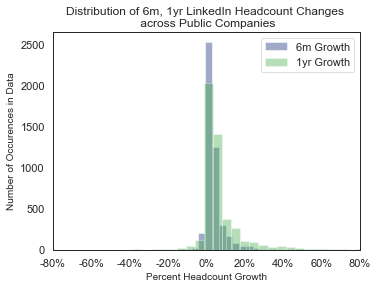

In [8]:
#Setting style and title
plt.figure(figsize = (5.5,4))
sns.set(font_scale=1.25, style = 'white', context = 'paper')
plt.title('Distribution of 6m, 1yr LinkedIn Headcount Changes \n across Public Companies')

#Building graph
ax = sns.distplot(df_main['6m Growth']
             ,kde = False, bins = 50, label = "6m Growth", color = '#6e7ca9', 
                 hist_kws = {'alpha':0.65})

ax = sns.distplot(df_main['1y Growth']
             ,kde = False, bins = 90, label = "1yr Growth", color = '#4aad52')
plt.xlim(-.8,.8)
plt.xlabel('Percent Headcount Growth', fontdict={'fontsize':10})
plt.ylabel('Number of Occurences in Data', fontdict={'fontsize':10})

xticks = mtick.PercentFormatter(xmax = 1)
ax.xaxis.set_major_formatter(xticks)


plt.legend()
plt.show()

In [9]:
#Let's get combined summary stats here
df_6m_summary_stats = round(df_main['6m Growth'].describe(),2)
df_6m_summary_stats = df_6m_summary_stats.reset_index()
df_6m_summary_stats.rename(columns = {'6m Growth':'6m Growth Summary Stats'}, inplace = True)

df_1y_summary_stats = round(df_main['1y Growth'].describe(),2)
df_1y_summary_stats = df_1y_summary_stats.reset_index()
df_1y_summary_stats.rename(columns = {'1y Growth':'1y Growth Summary Stats'}, inplace = True)

merged_stats = pd.merge(df_6m_summary_stats,df_1y_summary_stats, on = 'index')
merged_stats.rename(columns = {'index':'Summary Stats'}, inplace=True)
display(merged_stats)

,Summary Stats,6m Growth Summary Stats,1y Growth Summary Stats
0,count,4723.00,4719.00
1,mean,0.04,0.08
2,std,0.08,0.18
3,min,-0.29,-0.39
4,25%,0.01,0.02
5,50%,0.02,0.04
6,75%,0.04,0.08
7,max,1.48,3.86


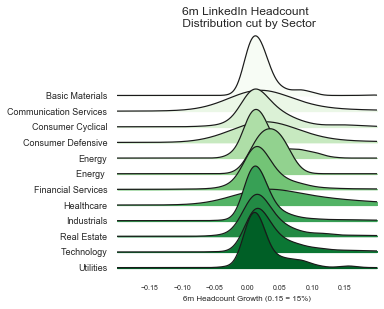

In [10]:
list_of_colors = ['black','green', 'orange', 'purple', 'yellow', 
                  'brown', 'teal', 'pink', 'purple', 'grey', 'black']
fig, axes = joypy.joyplot(df_main, by="sector", column="6m Growth",
                          colormap = cm.Greens, #cm.spring_r,
                          figsize=(5.5,4), xlabels = True, xlabelsize=7, ylabelsize=9,
                         x_range = (-.2,.2))
plt.title('6m LinkedIn Headcount \n Distribution cut by Sector', fontsize = 12)
plt.xlabel('6m Headcount Growth (0.15 = 15%)', fontdict={'fontsize':8})
plt.show()

<Figure size 720x936 with 0 Axes>

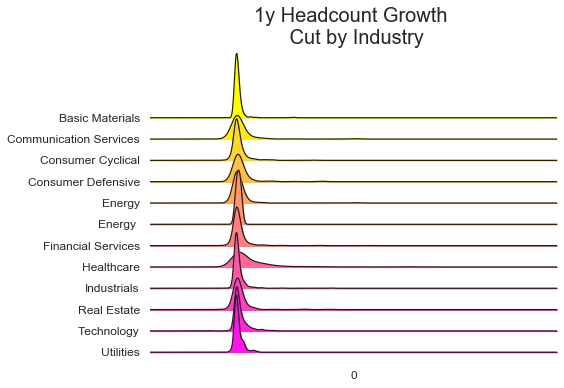

In [11]:
plt.figure(figsize = (10,13))
fig, axes = joypy.joyplot(df_main, by="sector", column="1y Growth", colormap = cm.spring_r,
                          figsize=(8,5))
plt.title('1y Headcount Growth \n Cut by Industry', fontsize = 20)
plt.xlim(-.35,.35)
plt.show()

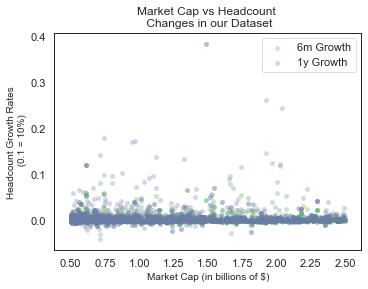

In [12]:
fig = plt.figure(figsize = (5.5,4))
sns.set(font_scale=1.25, style = 'white', context = 'paper')
df_main_mkt_cap_graph = df_main[df_main['marketCap'] <= 2500000000]

plt.title('Market Cap vs Headcount \n Changes in our Dataset')
plt.scatter(df_main_mkt_cap_graph['marketCap'] / 1000000000, df_main_mkt_cap_graph['6m Growth']/10, 
                    alpha=0.3, linewidths=0.05, 
                    color = '#4aad52', label = '6m Growth')
plt.scatter(df_main_mkt_cap_graph['marketCap'] / 1000000000, df_main_mkt_cap_graph['1y Growth']/10, 
                    alpha=0.3, linewidths=0.05, 
                    color = '#6e7ca9', label = '1y Growth')

plt.xlabel('Market Cap (in billions of $)', fontdict={'fontsize':10})
plt.ylabel('Headcount Growth Rates \n (0.1 = 10%)', fontdict={'fontsize':10})

# xticks = mtick.StrMethodFormatter("${:,.2f}")
# ax.xaxis.set_major_formatter(xticks)

plt.legend()
plt.show()

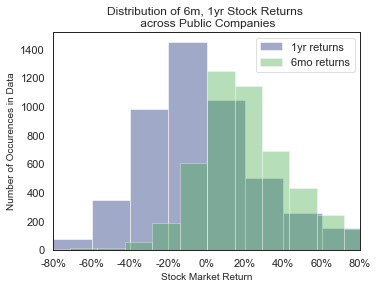

In [13]:
#Setting style and title
plt.figure(figsize = (5.5,4))
sns.set(font_scale=1.25, style = 'white', context = 'paper')
plt.title('Distribution of 6m, 1yr Stock Returns \n across Public Companies')

#Building graph
ax = sns.distplot(df_main['one_yr_roi']
             ,kde = False, bins = 1100, label = "1yr returns", color = '#6e7ca9', 
                 hist_kws = {'alpha':0.65})

ax = sns.distplot(df_main['six_month_roi']
             ,kde = False, bins = 200, label = "6mo returns", color = '#4aad52')
plt.xlim(-.8,.8)
plt.xlabel('Stock Market Return', fontdict={'fontsize':10})
plt.ylabel('Number of Occurences in Data', fontdict={'fontsize':10})

xticks = mtick.PercentFormatter(xmax = 1)
ax.xaxis.set_major_formatter(xticks)


plt.legend()
plt.show()

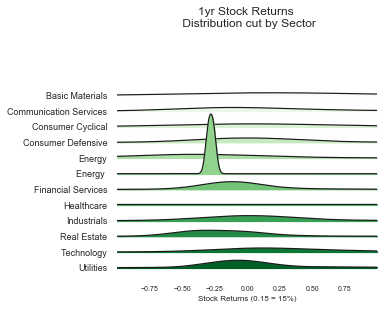

In [14]:
fig, axes = joypy.joyplot(df_main, by="sector", column="one_yr_roi",
                          colormap = cm.Greens, #cm.spring_r,
                          figsize=(5.5,4), xlabels = True, xlabelsize=7, ylabelsize=9,
                         x_range = (-1,1))
plt.title('1yr Stock Returns \n Distribution cut by Sector', fontsize = 12)
plt.xlabel('Stock Returns (0.15 = 15%)', fontdict={'fontsize':8})
plt.show()

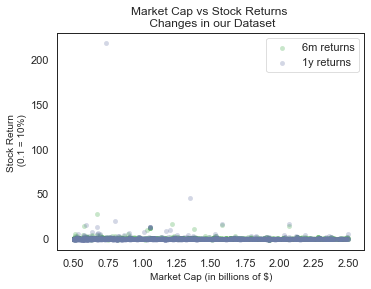

In [15]:
fig = plt.figure(figsize = (5.5,4))
sns.set(font_scale=1.25, style = 'white', context = 'paper')

plt.title('Market Cap vs Stock Returns \n Changes in our Dataset')
plt.scatter(df_main_mkt_cap_graph['marketCap'] / 1000000000, df_main_mkt_cap_graph['six_month_roi'], 
                    alpha=0.3, linewidths=0.05, 
                    color = '#4aad52', label = '6m returns')
plt.scatter(df_main_mkt_cap_graph['marketCap'] / 1000000000, df_main_mkt_cap_graph['one_yr_roi'], 
                    alpha=0.3, linewidths=0.05, 
                    color = '#6e7ca9', label = '1y returns')

plt.xlabel('Market Cap (in billions of $)', fontdict={'fontsize':10})
plt.ylabel('Stock Return \n (0.1 = 10%)', fontdict={'fontsize':10})

# xticks = mtick.StrMethodFormatter("${:,.2f}")
# ax.xaxis.set_major_formatter(xticks)

plt.legend()
plt.show()

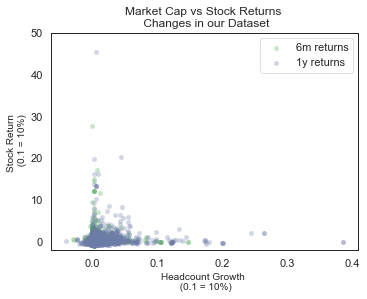

In [16]:
fig = plt.figure(figsize = (5.5,4))
sns.set(font_scale=1.25, style = 'white', context = 'paper')

plt.title('Market Cap vs Stock Returns \n Changes in our Dataset')
plt.scatter(df_main['6m Growth'] / 10 , df_main['six_month_roi'], 
                    alpha=0.3, linewidths=0.05, 
                    color = '#4aad52', label = '6m returns')
plt.scatter(df_main['1y Growth'] / 10, df_main['one_yr_roi'], 
                    alpha=0.3, linewidths=0.05, 
                    color = '#6e7ca9', label = '1y returns')

plt.xlabel('Headcount Growth \n (0.1 = 10%)', fontdict={'fontsize':10})
plt.ylabel('Stock Return \n (0.1 = 10%)', fontdict={'fontsize':10})

# xticks = mtick.StrMethodFormatter("${:,.2f}")
# ax.xaxis.set_major_formatter(xticks)

plt.ylim(-2,50)
plt.legend()
plt.show()

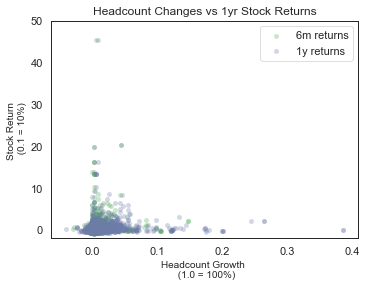

In [17]:
fig = plt.figure(figsize = (5.5,4))
sns.set(font_scale=1.25, style = 'white', context = 'paper')

plt.title('Headcount Changes vs 1yr Stock Returns')
plt.scatter(df_main['6m Growth'] / 10 , df_main['one_yr_roi'], 
                    alpha=0.3, linewidths=0.05, 
                    color = '#4aad52', label = '6m returns')
plt.scatter(df_main['1y Growth'] / 10, df_main['one_yr_roi'], 
                    alpha=0.3, linewidths=0.05, 
                    color = '#6e7ca9', label = '1y returns')

plt.xlabel('Headcount Growth \n (1.0 = 100%)', fontdict={'fontsize':10})
plt.ylabel('Stock Return \n (0.1 = 10%)', fontdict={'fontsize':10})

# xticks = mtick.StrMethodFormatter("${:,.2f}")
# ax.xaxis.set_major_formatter(xticks)

plt.ylim(-2,50)
plt.legend()
plt.show()

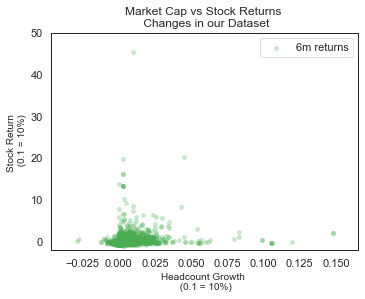

In [18]:
fig = plt.figure(figsize = (5.5,4))
sns.set(font_scale=1.25, style = 'white', context = 'paper')

plt.title('Market Cap vs Stock Returns \n Changes in our Dataset')
plt.scatter(df_main['6m Growth'] / 10 , df_main['one_yr_roi'], 
                    alpha=0.3, linewidths=0.05, 
                    color = '#4aad52', label = '6m returns')

plt.xlabel('Headcount Growth \n (0.1 = 10%)', fontdict={'fontsize':10})
plt.ylabel('Stock Return \n (0.1 = 10%)', fontdict={'fontsize':10})

# xticks = mtick.StrMethodFormatter("${:,.2f}")
# ax.xaxis.set_major_formatter(xticks)

plt.ylim(-2,50)
plt.legend()
plt.show()